In [2]:
import os

# --- ÔºÅÔºÅÔºÅÁΩëÁªú‰ª£ÁêÜËÆæÁΩÆÔºÅÔºÅÔºÅ ---
# Âú®ËøôÈáåËÆæÁΩÆÊÇ®ÁöÑHTTPÂíåHTTPS‰ª£ÁêÜ„ÄÇ
# Ëøô‰∏™ËÆæÁΩÆÂè™‰ºöÂΩ±ÂìçÂΩìÂâçËøô‰∏™PythonËÑöÊú¨ÁöÑËøêË°å„ÄÇ
# ËØ∑Â∞Ü '127.0.0.1:7890' ÊõøÊç¢‰∏∫ÊÇ®Ëá™Â∑±ÁöÑ‰ª£ÁêÜÂú∞ÂùÄÂíåÁ´ØÂè£„ÄÇ
proxy_url = 'http://127.0.0.1:7897' 
os.environ['http_proxy'] = proxy_url
os.environ['https_proxy'] = proxy_url

import ee
import geemap
# ‰∏çÂÜçÈúÄË¶Å import sys, import os (Èô§ÈùûÂÖ∂‰ªñÂú∞ÊñπÁî®Âà∞)
# ‰πü‰∏çÂÜçÈúÄË¶Å‰ªª‰Ωï sys.path.append(...)

# ÂàùÂßãÂåñGEE
ee.Initialize(project='geemap-441216') # ÊõøÊç¢‰∏∫ÊÇ®ÁöÑÈ°πÁõÆID

# Python‰ºöËá™Âä®Âú®ÂΩìÂâçÊñá‰ª∂Â§π‰∏ãÂØªÊâæÊ®°ÂùóÔºåÊâÄ‰ª•ÂèØ‰ª•Áõ¥Êé•ÂØºÂÖ•ÔºÅ
try:
    import z_flood_robust
    from z_flood_robust import zscore # ÁîöËá≥ÂèØ‰ª•ËøôÊ†∑ÂØºÂÖ•
    zscore.calc_basemad # Â∞ùËØïËÆøÈóÆ
    print("Êú¨Âú∞Ëá™ÂÆö‰πâÊ®°Âùó z_flood_robust Â∑≤ÊàêÂäüÂØºÂÖ•ÔºÅ")
except ImportError as e:
    print(f"ÂØºÂÖ•Ê®°ÂùóÂ§±Ë¥•: {e}")
    print("ËØ∑Á°Æ‰øù'z_flood_robust'Êñá‰ª∂Â§π‰∏éÊÇ®ÁöÑJupyterÁ¨îËÆ∞Êú¨Âú®Âêå‰∏Ä‰∏™ÁõÆÂΩï‰∏ã„ÄÇ")

Êú¨Âú∞Ëá™ÂÆö‰πâÊ®°Âùó z_flood_robust Â∑≤ÊàêÂäüÂØºÂÖ•ÔºÅ


# 1.ÂØºÂÖ•‰æùËµñ-Êï∞ÊçÆÁÆ°ÁêÜÊ®°Âùó

In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle #Áî®‰∫éÂú®ÂõæË°®‰∏≠Ê∑ªÂä†ÂΩ¢Áä∂(‰æãÂ¶ÇÁü©ÂΩ¢)
import re #Ê≠£ÂàôË°®ËææÂºèÊ®°Âùó
from z_flood_robust import calc_basemedian, calc_basemad, calc_median_anomaly, calc_robust_zscore, calc_basemean,calc_basestd,calc_zscore
from z_flood_robust import mapFloods,floodPalette

from ipywidgets import Label #Áî®‰∫éÂàõÂª∫‰∫§‰∫íÂºèÊéß‰ª∂



# 2.ÂÆö‰πâ‰∫§‰∫íÂºèÂú∞Âõæ‰ª•ÈÄâÊã©ÊÑüÂÖ¥Ë∂£Âå∫Âüü-ÁïåÈù¢‰∏é‰∫§‰∫íÊ®°Âùó

In [4]:
#Ëß£ÊûêÁî®Êà∑ÁÇπÂáªÂú∞ÂõæÊó∂ÁîüÊàêÁöÑÂùêÊ†áÂ≠óÁ¨¶‰∏≤ÔºåÊèêÂèñÁªèÁ∫¨Â∫¶Âπ∂ËøîÂõû
def parseClickedCoordinates(label):
  #Âà©Áî®Ê≠£ÂàôË°®ËææÂºèÔºå‰ªélabel.valueÊèêÂèñÂá∫ÂùêÊ†áÔºö‰∏Ä‰∏™ÂèØËÉΩÂ∏¶ÊúâË¥üÂè∑ÁöÑÊµÆÁÇπÊï∞ ËøôÈáå‰∏∫„ÄêÁªèÂ∫¶ÔºåÁ∫¨Â∫¶„Äë
  #Ê≠£ÂàôË°®ËææÂºèÔºö r'(?:-)?[0-9]+.[0-9]+'
  #r'Ë°®Á§∫ÂéüÂßãÂ≠óÁ¨¶Ôºå(?:-)ÊòØÈùûÊçïËé∑ÁªÑÔºå?:Ë°®Á§∫Ë¥üÂè∑ÊòØÂèØÈÄâÁöÑÔºå[0-9]+Ë°®Á§∫ÂåπÈÖç‰∏Ä‰∏™Êï∞Â≠óÔºå+Ë°®Á§∫ÂèØ‰ª•Âá∫Áé∞‰∏ÄÊ¨°ÊàñÂ§öÊ¨°Ôºå.ÂåπÈÖçÂ∞èÊï∞ÁÇπÔºåÊúÄÂêéÂÜçÊ¨°ÂåπÈÖç‰∏Ä‰∏™ÊàñÂ§ö‰∏™Êï∞Â≠ó
  coords = [float(c) for c in re.findall(r'(?:-)?[0-9]+.[0-9]+', label.value)]
  coords.reverse() #ÂèçËΩ¨‰∏∫„ÄêÁ∫¨Â∫¶ÔºåÁªèÂ∫¶„ÄëÔºåÁ¨¶ÂêàGEEÂùêÊ†áÊ†ºÂºè
  return coords

#ÂàõÂª∫‰∏Ä‰∏™LableÔºåÁî®‰∫éÊòæÁ§∫Áî®Êà∑ÁÇπÂáªÁöÑÁõÆÊ†á
l = Label()
display(1)
#Â§ÑÁêÜÁî®Êà∑‰∏éÂú∞ÂõæÁöÑ‰∫§‰∫í‰∫ã‰ª∂ÔºåÂΩìÁî®Êà∑ÁÇπÂáªÂú∞ÂõæÊó∂ÔºåÂ∞ÜÁÇπÂáªÁöÑÂùêÊ†áÂ≠òÂÇ®Âà∞LabelÊéß‰ª∂‰∏≠
def handle_interaction(**kwargs):
  #kwargsÂåÖÂê´‰∫§‰∫í‰∫ã‰ª∂ÁöÑÂèÇÊï∞ kwargs.get('type'):Ëé∑Âèñ‰∫ã‰ª∂Á±ªÂûã‰∏∫Èº†Ê†áÁÇπÂáª kwargs.get('coordinates')ÔºöËé∑ÂèñÁÇπÂáªÁöÑÂùêÊ†áÔºåËΩ¨Êç¢‰∏∫Â≠óÁ¨¶‰∏≤Âπ∂Â≠òÂÇ®Âà∞LabelÊéß‰ª∂‰∏≠
  if kwargs.get('type') == 'click':
    l.value = str(kwargs.get('coordinates'))

print('ËØ∑ÁÇπÂáªÂú∞Âõæ‰ª•ÈÄâÊã©‰Ω†Ë¶ÅÁõëÊµãÁöÑÂå∫Âüü')
#ÂàõÂª∫‰∫§‰∫íÂºèÂú∞Âõæ
Map = geemap.Map()
Map.on_interaction(handle_interaction)
Map

1

ËØ∑ÁÇπÂáªÂú∞Âõæ‰ª•ÈÄâÊã©‰Ω†Ë¶ÅÁõëÊµãÁöÑÂå∫Âüü


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', transp‚Ä¶

# 3.ÂÆö‰πâÂá†‰ΩïËåÉÂõ¥Âπ∂Â±ïÁ§∫-ÁïåÈù¢‰∏é‰∫§‰∫íÊ®°Âùó

## 1.Á°ÆÂÆöÁ†îÁ©∂Âå∫Âüü

In [5]:
lon,lat = parseClickedCoordinates(l)
w,h = 0.3,0.3 #Áü©ÂΩ¢ÂÆΩÂ∫¶‰∏éÈ´òÂ∫¶ÔºàÂçï‰ΩçÔºöÂ∫¶Ôºâ

geometry = ee.Geometry.Polygon(
    [[[lon-w,lat-h],
     [lon-w,lat+h],
     [lon+w,lat+h],
     [lon+w,lat-h]]]
)

#Â∞ÜÂá†‰ΩïËåÉÂõ¥Ê∑ªÂä†Âà∞Âú∞Âõæ
Map.addLayer(
    geometry,
    {'color':'red','fillColor':'00000000'},
    'AOI'
)
Map

Map(bottom=1596954.0, center=[39.42041423389117, -0.4089832305908203], controls=(WidgetControl(options=['posit‚Ä¶

In [36]:
#USE MAP RECTANGLE ÈÄâÊã©Âå∫Âüü
#Ëé∑ÂèñÊÑüÂÖ¥Ë∂£Âå∫ÂüüÔºàÁî®‰∫éËÆ∫ÊñáÁªòÂõæ)
roi_choose1 = Map.user_roi

if roi_choose1 is not None:
  #Ëé∑ÂèñROIÁ±ªÂûã
  roi_type = roi_choose1.type().getInfo()
  print(f"ROI Á±ªÂûãÔºö{roi_type}")

  #Â¶ÇÊûúÊòØPolygonÔºåËé∑ÂèñÂùêÊ†á
  if roi_type == 'Polygon':
    coords = roi_choose1.coordinates().getInfo()
    print(f"ROI ÂùêÊ†áÔºö{coords}")

ROI Á±ªÂûãÔºöPolygon
ROI ÂùêÊ†áÔºö[[[-0.4216, 39.341732], [-0.4216, 39.45051], [-0.333023, 39.45051], [-0.333023, 39.341732], [-0.4216, 39.341732]]]


# 4.ËøáÊª§Sentinel-Êï∞ÊçÆ

In [37]:
# 4.ËøáÊª§Sentinel-Êï∞ÊçÆ

# ÊâÄÈúÄÊó•Êúü
targdate = '2024-10-31'

# Â∞áÊó•ÊúüÈÅéÊøæÁØÑÂúçÁ∏ÆÂ∞èÂà∞ÁõÆÊ®ôÊó•ÊúüÁï∂Â§©
start_date = ee.Date(targdate)
end_date = start_date.advance(1, 'day')

filters = [
    ee.Filter.listContains("transmitterReceiverPolarisation","VV"),
    ee.Filter.equals("instrumentMode","IW"),
    ee.Filter.equals("orbitProperties_pass","ASCENDING"),
    ee.Filter.date(start_date, end_date)
]

# Âä†ËºâS1Êï∏Êìö
s1_collection = ee.ImageCollection("COPERNICUS/S1_GRD") \
    .filter(filters) \
    .filterBounds(roi_choose1)
    
# Ê™¢Êü•ÊòØÂê¶ÊúâÂΩ±ÂÉèÊªøË∂≥Ê¢ù‰ª∂
s1_size = s1_collection.size().getInfo()
print(f"Âú® {targdate} ÊâæÂà∞ÊªøË∂≥Ê¢ù‰ª∂ÁöÑ Sentinel-1 ÂΩ±ÂÉèÊï∏Èáè: {s1_size}")

flood_image = None # ÂÖàÂàùÂßãÂåñÁÇ∫ None

if s1_size == 0:
    print("Ë≠¶ÂëäÔºöÂú®ÁõÆÊ®ôÊó•ÊúüÊú™ÊâæÂà∞ÊªøË∂≥Ê¢ù‰ª∂ÁöÑÂΩ±ÂÉèÔºÅÂæåÁ∫åÊ≠•È©üÂ∞áÊúÉÂ§±Êïó„ÄÇ")
elif s1_size == 1:
    print("ÊâæÂà∞ 1 ÂºµÂΩ±ÂÉèÔºåÁõ¥Êé•‰ΩøÁî®„ÄÇ")
    # [Ê†∏ÂøÉ‰øÆÊ≠£] Áõ¥Êé•Áç≤ÂèñÈõÜÂêà‰∏≠ÁöÑÁ¨¨‰∏ÄÂºµÔºà‰πüÊòØÂîØ‰∏Ä‰∏ÄÂºµÔºâÂΩ±ÂÉè
    flood_image = ee.Image(s1_collection.first()).clip(roi_choose1)
else:
    print(f"Ë≠¶ÂëäÔºöÊâæÂà∞ {s1_size} ÂºµÂΩ±ÂÉèÔºåÂ∞áÂÆÉÂÄëÈë≤ÂµåÔºàmosaicÔºâÊàê‰∏ÄÂºµ„ÄÇ")
    # Âè™ÊúâÂú®Â§öÊñº‰∏ÄÂºµÂΩ±ÂÉèÊôÇÊâç‰ΩøÁî® mosaic
    flood_image = s1_collection.mosaic().clip(roi_choose1)

band = 'VV'
if flood_image is not None:
    flood_image = flood_image.select(band)
    Map.addLayer(flood_image, {'min':-25,'max':5}, 'Flood Image')
    print("Flood Image Â∑≤ÊàêÂäüÂä†Ëºâ„ÄÇ")
else:
    print("ÈåØË™§ÔºöÁÑ°Ê≥ïÁîüÊàê flood_imageÔºåË´ãÊ™¢Êü•Êó•ÊúüÂíåÁ†îÁ©∂ÂçÄÂüü„ÄÇ")




Âú® 2024-10-31 ÊâæÂà∞ÊªøË∂≥Ê¢ù‰ª∂ÁöÑ Sentinel-1 ÂΩ±ÂÉèÊï∏Èáè: 1
ÊâæÂà∞ 1 ÂºµÂΩ±ÂÉèÔºåÁõ¥Êé•‰ΩøÁî®„ÄÇ
Flood Image Â∑≤ÊàêÂäüÂä†Ëºâ„ÄÇ


## ÂØºÂá∫Á†îÁ©∂Âå∫ÂíåÂΩ±ÂÉèÂà∞Ë∞∑Ê≠å‰∫ëÁõò

In [ ]:
# 4.5 ‰ΩøÁî®Google Earth EngineÂéüÁîüÂØºÂá∫Ôºà‰øÆÂ§çÊñá‰ª∂Â§πÈóÆÈ¢òÔºâ
print("\n=== ‰ΩøÁî®GEEÂéüÁîüÂØºÂá∫Êï∞ÊçÆÂà∞Google Drive ===")

# Ê£ÄÊü•ÂøÖË¶ÅÁöÑÊï∞ÊçÆÊòØÂê¶Â≠òÂú®
export_ready = True
if roi_choose1 is None:
    print("‚ùå ÈîôËØØÔºöroi_choose1 Êú™ÂÆö‰πâ")
    export_ready = False
if flood_image is None:
    print("‚ùå ÈîôËØØÔºöflood_image Êú™ÂÆö‰πâ")
    export_ready = False

if export_ready:
    folder = 'SCI_Valencia'  # Google DriveÊñá‰ª∂Â§πÂêç
    
    # ÂàõÂª∫‰∏Ä‰∏™Áªü‰∏ÄÁöÑÂØºÂá∫‰ªªÂä°ÂàóË°®ÔºåÁ°Æ‰øù‰ΩøÁî®Áõ∏ÂêåÁöÑÊñá‰ª∂Â§π
    export_tasks = []
    
    # ‰ªªÂä°1ÔºöÂØºÂá∫ROIÁü¢ÈáèÔºà‰ª•ShapefileÊ†ºÂºèÔºâ
    print("\nÊ≠•È™§1: ÂØºÂá∫ROIÁü¢Èáè...")
    try:
        # Â∞ÜROIËΩ¨Êç¢‰∏∫FeatureCollectionÔºåÂπ∂Ê∑ªÂä†Â±ûÊÄß
        roi_feature = ee.Feature(roi_choose1, {'name': 'study_area', 'date': targdate})
        roi_fc = ee.FeatureCollection([roi_feature])
        
        # ‰ΩøÁî®ÂéüÁîüee.batch.ExportÂØºÂá∫Áü¢Èáè
        vector_task = ee.batch.Export.table.toDrive(
            collection=roi_fc,
            description=f'ROI_Vector_{targdate}',
            folder=folder,
            fileNamePrefix=f'ROI_Vector_{targdate}',
            fileFormat='SHP'
        )
        export_tasks.append(('ROI Vector', vector_task))
        print(f"  ‚úì ROIÁü¢ÈáèÂØºÂá∫‰ªªÂä°Â∑≤ÂáÜÂ§áÔºöROI_Vector_{targdate}.shp")
        
    except Exception as e:
        print(f"  ‚ùå ROIÁü¢ÈáèÂØºÂá∫ÂáÜÂ§áÂ§±Ë¥•Ôºö{str(e)}")
    
    # ‰ªªÂä°2ÔºöÂØºÂá∫Ë£ÅÂâ™ÂêéÁöÑSARÂΩ±ÂÉèÔºàÁ†îÁ©∂Âå∫ÂüüÔºâ
    print("\nÊ≠•È™§2: ÂØºÂá∫Ë£ÅÂâ™ÂêéÁöÑSARÂΩ±ÂÉè...")
    try:
        # Á°Æ‰øùÂΩ±ÂÉèÊòØÂçïÊ≥¢ÊÆµ‰∏îÂ∑≤Ë£ÅÂâ™
        clipped_image = flood_image.select('VV').clip(roi_choose1)
        
        # ‰ΩøÁî®ÂéüÁîüee.batch.ExportÂØºÂá∫ÂΩ±ÂÉè
        clipped_task = ee.batch.Export.image.toDrive(
            image=clipped_image,
            description=f'SAR_Clipped_{targdate}',
            folder=folder,
            fileNamePrefix=f'SAR_Clipped_{targdate}',
            scale=10,
            region=roi_choose1,
            crs='EPSG:4326',
            maxPixels=1e13
        )
        export_tasks.append(('SAR Clipped', clipped_task))
        print(f"  ‚úì Ë£ÅÂâ™SARÂΩ±ÂÉèÂØºÂá∫‰ªªÂä°Â∑≤ÂáÜÂ§áÔºöSAR_Clipped_{targdate}.tif")
        
    except Exception as e:
        print(f"  ‚ùå Ë£ÅÂâ™ÂΩ±ÂÉèÂØºÂá∫ÂáÜÂ§áÂ§±Ë¥•Ôºö{str(e)}")
    
    # ‰ªªÂä°3ÔºöÂØºÂá∫ÂÆåÊï¥ÊôØSARÂΩ±ÂÉè
    print("\nÊ≠•È™§3: ÂØºÂá∫ÂÆåÊï¥ÊôØSARÂΩ±ÂÉè...")
    try:
        # Ëé∑ÂèñÂÆåÊï¥ÁöÑÂéüÂßãÂΩ±ÂÉèÔºà‰∏çË£ÅÂâ™Ôºâ
        if s1_size == 1:
            full_scene_image = ee.Image(s1_collection.first()).select('VV')
        else:
            full_scene_image = s1_collection.mosaic().select('VV')
        
        # ‰ΩøÁî®ÂéüÁîüee.batch.ExportÂØºÂá∫ÂÆåÊï¥ÊôØÂΩ±ÂÉè
        fullscene_task = ee.batch.Export.image.toDrive(
            image=full_scene_image,
            description=f'SAR_FullScene_{targdate}',
            folder=folder,
            fileNamePrefix=f'SAR_FullScene_{targdate}',
            scale=10,
            region=full_scene_image.geometry(),
            crs='EPSG:4326',
            maxPixels=1e13
        )
        export_tasks.append(('SAR Full Scene', fullscene_task))
        print(f"  ‚úì ÂÆåÊï¥ÊôØSARÂΩ±ÂÉèÂØºÂá∫‰ªªÂä°Â∑≤ÂáÜÂ§áÔºöSAR_FullScene_{targdate}.tif")
        
    except Exception as e:
        print(f"  ‚ùå ÂÆåÊï¥ÊôØÂΩ±ÂÉèÂØºÂá∫ÂáÜÂ§áÂ§±Ë¥•Ôºö{str(e)}")
    
    # ÊâπÈáèÂêØÂä®ÊâÄÊúâÂØºÂá∫‰ªªÂä°ÔºàÁ°Æ‰øù‰ΩøÁî®Áõ∏ÂêåÊñá‰ª∂Â§πÔºâ
    print(f"\nüì§ ÊâπÈáèÂêØÂä®ÂØºÂá∫‰ªªÂä°...")
    print("-" * 60)
    
    successful_exports = 0
    for task_name, task in export_tasks:
        try:
            task.start()
            print(f"  ‚úì {task_name} ÂØºÂá∫‰ªªÂä°Â∑≤ÂêØÂä®")
            successful_exports += 1
        except Exception as e:
            print(f"  ‚ùå {task_name} ÂØºÂá∫‰ªªÂä°ÂêØÂä®Â§±Ë¥•Ôºö{str(e)}")
    
    # ÊòæÁ§∫ÂØºÂá∫Áä∂ÊÄÅ‰ø°ÊÅØ
    print(f"\nüìä ÂØºÂá∫‰ªªÂä°ÊÄªÁªì:")
    print(f"  ‚úì ÁõÆÊ†áÊó•Êúü: {targdate}")
    print(f"  ‚úì ÂØºÂá∫Êñá‰ª∂Â§π: {folder} (Google Drive)")
    print(f"  ‚úì ÂΩ±ÂÉèÂàÜËæ®Áéá: 10Á±≥")
    print(f"  ‚úì ÂùêÊ†áÁ≥ªÁªü: EPSG:4326")
    print(f"  ‚úì ÊàêÂäüÂêØÂä®‰ªªÂä°Êï∞: {successful_exports}/{len(export_tasks)}")
    
    print(f"\nüìã Êñá‰ª∂Ê∏ÖÂçï:")
    print(f"  1. ROI_Vector_{targdate}.shp - Á†îÁ©∂Âå∫ÂüüÁü¢ÈáèÔºàShapefileÊ†ºÂºèÔºâ")
    print(f"  2. SAR_Clipped_{targdate}.tif - Ë£ÅÂâ™ÂêéÁöÑSARÂΩ±ÂÉè")
    print(f"  3. SAR_FullScene_{targdate}.tif - ÂÆåÊï¥ÊôØSARÂΩ±ÂÉè")
    
    print(f"\n‚è≥ ‰ªªÂä°Áä∂ÊÄÅËØ¥Êòé:")
    print(f"  ‚Ä¢ ÊâÄÊúâÂØºÂá∫‰ªªÂä°Â∑≤Êèê‰∫§Âà∞Google Earth Engine")
    print(f"  ‚Ä¢ ÊâÄÊúâÊñá‰ª∂Â∞Ü‰øùÂ≠òÂà∞Âêå‰∏Ä‰∏™ '{folder}' Êñá‰ª∂Â§π‰∏≠")
    print(f"  ‚Ä¢ ËØ∑ËÆøÈóÆ https://code.earthengine.google.com Êü•ÁúãTasksÊ†áÁ≠æÈ°µ")
    print(f"  ‚Ä¢ ‰ªªÂä°ÂÆåÊàêÂêéÔºåÊñá‰ª∂Â∞ÜÂá∫Áé∞Âú®ÊÇ®ÁöÑGoogle Drive‰∏≠")
    print(f"  ‚Ä¢ Â§ßÊñá‰ª∂ÂèØËÉΩÈúÄË¶ÅÂá†ÂàÜÈíüÂà∞Âá†Â∞èÊó∂ÂÆåÊàê")
    
    # ‰øùÂ≠òÂØºÂá∫‰ªªÂä°‰ø°ÊÅØ‰æõÂêéÁª≠Êü•ËØ¢
    global export_task_info
    export_task_info = {
        'folder': folder,
        'target_date': targdate,
        'tasks': [(name, task.id if hasattr(task, 'id') else 'Unknown') for name, task in export_tasks],
        'export_time': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    }
    
    print(f"\nüí° ÊèêÁ§∫:")
    print(f"  ‚Ä¢ Â¶ÇÊûú‰ªçÁÑ∂Âá∫Áé∞Â§ö‰∏™ÂêåÂêçÊñá‰ª∂Â§πÔºåËøôÊòØGEEÁöÑÊ≠£Â∏∏Ë°å‰∏∫")
    print(f"  ‚Ä¢ ÊÇ®ÂèØ‰ª•Âú®Google Drive‰∏≠ÊâãÂä®ÂêàÂπ∂Êñá‰ª∂Âà∞‰∏Ä‰∏™Êñá‰ª∂Â§π")
    print(f"  ‚Ä¢ ÊàñËÄÖÁ≠âÂæÖÊâÄÊúâ‰ªªÂä°ÂÆåÊàêÂêéÔºåÊåâÊñá‰ª∂ÂêçÂâçÁºÄÊï¥ÁêÜÊñá‰ª∂")

else:
    print("‚ùå Áº∫Â∞ëÂøÖË¶ÅÊï∞ÊçÆÔºåÊó†Ê≥ïÊâßË°åÂØºÂá∫Êìç‰Ωú")
    print("   ËØ∑Á°Æ‰øùÂ∑≤ÊàêÂäüËøêË°åÂâçÈù¢ÁöÑ‰ª£Á†ÅÂπ∂ÂÆö‰πâ‰∫Üroi_choose1Âíåflood_image")

print("\n" + "="*60)
print("Á¨¨4Á´†Êï∞ÊçÆÂØºÂá∫Ê®°ÂùóÊâßË°åÂÆåÊØï")
print("="*60)


=== ‰ΩøÁî®geemapÂØºÂá∫Êï∞ÊçÆÂà∞Google Drive ===

Ê≠•È™§1: ÂØºÂá∫ROIÁü¢Èáè...
  ‚ùå ROIÁü¢ÈáèÂØºÂá∫Â§±Ë¥•Ôºöee_export_vector() got an unexpected keyword argument 'filetype'
  Ê≠£Âú®Â∞ùËØïÂ§áÁî®ÊñπÊ≥ï...
  ‚úì ROIÁü¢ÈáèÂØºÂá∫‰ªªÂä°Â∑≤ÂêØÂä®ÔºàÂ§áÁî®ÊñπÊ≥ïÔºâÔºöROI_Vector_2024-10-31.shp

Ê≠•È™§2: ÂØºÂá∫Ë£ÅÂâ™ÂêéÁöÑSARÂΩ±ÂÉè...
  ‚ùå Ë£ÅÂâ™ÂΩ±ÂÉèÂØºÂá∫Â§±Ë¥•Ôºöee_export_image() got an unexpected keyword argument 'folder'
  Ê≠£Âú®Â∞ùËØïÂ§áÁî®ÊñπÊ≥ï...
  ‚úì Ë£ÅÂâ™SARÂΩ±ÂÉèÂØºÂá∫‰ªªÂä°Â∑≤ÂêØÂä®ÔºàÂ§áÁî®ÊñπÊ≥ïÔºâÔºöSAR_Clipped_2024-10-31.tif

Ê≠•È™§3: ÂØºÂá∫ÂÆåÊï¥ÊôØSARÂΩ±ÂÉè...
  ‚ùå ÂÆåÊï¥ÊôØÂΩ±ÂÉèÂØºÂá∫Â§±Ë¥•Ôºöee_export_image() got an unexpected keyword argument 'folder'
  Ê≠£Âú®Â∞ùËØïÂ§áÁî®ÊñπÊ≥ï...
  ‚úì ÂÆåÊï¥ÊôØSARÂΩ±ÂÉèÂØºÂá∫‰ªªÂä°Â∑≤ÂêØÂä®ÔºàÂ§áÁî®ÊñπÊ≥ïÔºâÔºöSAR_FullScene_2024-10-31.tif

üì§ ÂØºÂá∫‰ªªÂä°ÊÄªÁªì:
  ‚úì ÁõÆÊ†áÊó•Êúü: 2024-10-31
  ‚úì ÂØºÂá∫Êñá‰ª∂Â§π: SCI_Valencia (Google Drive)
  ‚úì ÂΩ±ÂÉèÂàÜËæ®Áéá: 10Á±≥
  ‚úì ÂùêÊ†áÁ≥ªÁªü: EPSG:4326
  ‚úì ÂØºÂá∫‰ªªÂä°Êï∞: 3‰∏™



# 5.Ëá™Âä®ÈòàÂÄºÂàÜÂâ≤


In [19]:
#‰∫åÂÄºÂåñ+ÂºÄËøêÁÆó

globalThreshold = ee.Number(-13.5)
globalWater = flood_image.lt(globalThreshold)
corrosion_kernel = ee.Kernel.circle(radius = 5)
dilation_kernel = ee.Kernel.circle(radius = 3)
eroded_Dark_targets = globalWater.focal_min(kernel = corrosion_kernel, iterations = 1)
#.focal_max(kernel = dilation_kernel, iterations = 1)
Map.addLayer(eroded_Dark_targets.selfMask(), {'palette':['red']}, 'Eroded Water')
Map

Map(bottom=3193154.0, center=[39.43546380739537, -0.3720760345458985], controls=(WidgetControl(options=['posit‚Ä¶

# 6.ËæπÁºòÊ£ÄÊµã+ÁºìÂÜ≤Âå∫+Â§ñÂåÖÁü©ÂΩ¢

## 6.1 ËæπÁºòÊ£ÄÊµã+ÁºìÂÜ≤Âå∫

In [20]:
# ÂÆö‰πâÊñπÊ≥ïÈúÄË¶ÅÁöÑÂèÇÊï∞
connectedPixels = 100 # ÈïøÂ∫¶ËÆ°ÁÆóËøûÊé•ÂÉèÁ¥†Êï∞
edgeLength = 50 #Ê∞¥ËæπÁºòÁöÑÈïøÂ∫¶
edgeBuffer = 15 #ËæπÁºòÁöÑÁºìÂÜ≤Âå∫(Âçï‰Ωçm)
cannyThreshold = 1 #cannyËæπÁºòÊ£ÄÊµãÁöÑÈòàÂÄº
cannySigma = 1 #Canny ËæπÁºòÊ£ÄÊµã‰∏≠È´òÊñØÊª§Ê≥¢Âô®ÁöÑ Sigma ÂÄº
cannyLt = 0.05 #cannyËæπÁºòÊ£ÄÊµãÁöÑÊõ¥ÈôêÂà∂ÁöÑÈòàÂÄº

In [21]:
# CannyËæπÁºòÊ£ÄÊµã
canny = ee.Algorithms.CannyEdgeDetector(
    image=eroded_Dark_targets,
    threshold=cannyThreshold,
    sigma=cannySigma
)

#Ëé∑ÂèñËæπÁºòÔºàÊéíÈô§Âº∫ËæπÁºò Âè™Ë¶ÅÂº±ËæπÁºò Âõ†Âº∫ËæπÁºò‰ºöÊòØÂô™Â£∞ Âç≥ËæπÁºòÂº∫Â∫¶Â∞è‰∫éÈòàÂÄºÔºâ
#connectedPixelCount()ÂáΩÊï∞ËÆ°ÁÆóÊØè‰∏™ÂÉèÁ¥†ÁöÑÁõ∏ÈÇªÁõ∏ËøûÂÉèÁ¥†ÁöÑÊï∞ÈáèÔºåÂç≥ËæπÁºòÁöÑÈïøÂ∫¶
connected = canny.updateMask(canny).lt(cannyLt).connectedPixelCount(connectedPixels,True)

#Êñ∞ÁöÑÂÉèÁ¥†Êï∞ÈáèÂõæÂÉè‰∏≠ÔºåÊØè‰∏™ÂÉèÁ¥†ÂÄºË°®Á§∫ÂéüÂßãÂõæÂÉè‰∏≠Ôºå‰∏éÂÖ∂Áõ∏ËøûÁöÑ„ÄÅ‰∏îËæπÁºòÂº∫Â∫¶Â∞è‰∫écannyLtÁöÑÂÉèÁ¥†ÁöÑÊï∞Èáè
#ËÆ©Áü≠ËæπÁºòËßÜ‰∏∫Âô™Â£∞
edges = connected.gte(edgeLength)

#Âü∫‰∫éËæπÁºòÂàõÂª∫ÁºìÂÜ≤Âå∫ÔºåÂπ∂Â∞ÜÁºìÂÜ≤Âå∫ÂÜÖÁöÑÂÉèÁ¥†ËÆæ‰∏∫1
#fastDistanceTransform():Âø´ÈÄüË∑ùÁ¶ªÂèòÊç¢ÂáΩÊï∞ÔºöËÆ°ÁÆóÊØè‰∏™ÂÉèÁ¥†Âà∞ÊúÄËøëÁöÑÈùûÈõ∂ÂÉèÁ¥†ÔºàËæπÁºòÂÉèÁ¥†ÔºâÁöÑË∑ùÁ¶ª
bufferEdges = edges.fastDistanceTransform(edgeBuffer).lte(edgeBuffer)
#Â∞ÜÁºìÂÜ≤Âå∫Â§ñÈÉ®ÂàÜÊé©ËÜú
edgeImage = flood_image.select(band).updateMask(bufferEdges)

edgeVis = {'palette' : 'yellow' , 'opacity' : 0.5}



# 6.2 ËæπÁºòÁºìÂÜ≤Âå∫ÁîüÊàêÂ§ñÂåÖÁü©ÂΩ¢

In [23]:
print("Ê≠£Âú®Â∞ÜÊ†ÖÊ†ºÊñëÂùóËΩ¨‰∏∫Áü¢Èáè")
bufferVectors = bufferEdges.selfMask().reduceToVectors(
    geometry = roi_choose1,
    scale = 10,
    geometryType = 'polygon',
    eightConnected = True,
    labelProperty = 'labels',
    maxPixels = 1e10
)
bufferVectors = bufferVectors
#.filter(ee.Filter.gt('count',1000/(30*30)))

print('Ê≠£Âú®‰∏∫ÊØè‰∏™Áü¢ÈáèËÆ°ÁÆóÂ§ñÂåÖÁü©ÂΩ¢')
def getBoundingBox(feature):
   # feature.geometry() Ëé∑ÂèñÂΩìÂâçË¶ÅÁ¥†ÁöÑÂá†‰ΩïÂΩ¢Áä∂
  # .bounds() ËÆ°ÁÆóËØ•Âá†‰ΩïÂΩ¢Áä∂ÁöÑÊúÄÂ∞èÂ§ñÂåÖÁü©ÂΩ¢
  # ee.Feature() Áî®Êñ∞ÁöÑÁü©ÂΩ¢Âá†‰Ωï‰ΩìÂàõÂª∫‰∏Ä‰∏™Êñ∞ÁöÑË¶ÅÁ¥†ÔºåÂπ∂‰øùÁïôÂéüÂßãÂ±ûÊÄß
  return ee.Feature(feature.geometry().bounds()) # Removed feature.properties

#Â∞Ü‰∏äËø∞ÂáΩÊï∞Â∫îÁî®Âà∞ÈõÜÂêà‰∏≠ÁöÑÊØè‰∏Ä‰∏™Ë¶ÅÁ¥†
boundingBoxes = bufferVectors.map(getBoundingBox)

# ---
# Ê≠•È™§ 4: ÂèØËßÜÂåñÂ§ñÂåÖÁü©ÂΩ¢
# ---
# ‰∏∫‰∫ÜÂè™ÊòæÁ§∫ËæπÊ°ÜËÄå‰∏çÊòØÂÆûÂøÉÁü©ÂΩ¢ÔºåÊàë‰ª¨ÂàõÂª∫‰∏Ä‰∏™Á©∫ÁöÑÂõæÂÉèÔºåÁÑ∂ÂêéÂ∞ÜÁü©ÂΩ¢ÁöÑËæπÊ°Ü‚ÄúÁîª‚Äù‰∏äÂéª„ÄÇ
# ËøôÊØîÁõ¥Êé•Ê∑ªÂä† FeatureCollection Âπ∂ËÆæÁΩÆÊ†∑ÂºèÊõ¥Á®≥ÂÅ•„ÄÇ
empty = ee.Image().byte() # ÂàõÂª∫‰∏Ä‰∏™Á©∫ÁöÑ8‰ΩçÂõæÂÉè‰Ωú‰∏∫ÁîªÂ∏É

# ‰ΩøÁî® .paint() ÂáΩÊï∞ÁªòÂà∂ËæπÊ°Ü
outline = empty.paint(
    featureCollection=boundingBoxes, # Ë¶ÅÁªòÂà∂ÁöÑË¶ÅÁ¥†ÈõÜÂêà
    color=1, # ËæπÊ°ÜÁöÑÈ¢úËâ≤ÔºåËøôÈáåËÆæ‰∏∫1Ôºå‰ª•‰æø‰ΩøÁî®Áªü‰∏ÄÈ¢úËâ≤
    width=2  # ËæπÊ°ÜÁöÑÂÆΩÂ∫¶ÔºàÂÉèÁ¥†Ôºâ
)

# ÂÆö‰πâ‰∏Ä‰∏™È≤úËâ≥ÁöÑÈ¢úËâ≤ÊñπÊ°àÊù•ÊòæÁ§∫Â§ñÂåÖÁü©ÂΩ¢
bboxVis = {'palette': 'FF00FF'} # ‰ΩøÁî®‰∫ÆÁ¥´Ëâ≤ (Magenta)

print("Â∞ÜÂ§ñÂåÖÁü©ÂΩ¢Ê∑ªÂä†Âà∞Âú∞Âõæ...")
Map.addLayer(outline, bboxVis, 'Detected Bounding Boxes')

# Â∞ÜÂú∞Âõæ‰∏≠ÂøÉËÆæÁΩÆÂà∞ÊÇ®ÁöÑÁ†îÁ©∂Âå∫
Map.centerObject(roi_choose1, 11)
Map

Ê≠£Âú®Â∞ÜÊ†ÖÊ†ºÊñëÂùóËΩ¨‰∏∫Áü¢Èáè
Ê≠£Âú®‰∏∫ÊØè‰∏™Áü¢ÈáèËÆ°ÁÆóÂ§ñÂåÖÁü©ÂΩ¢
Â∞ÜÂ§ñÂåÖÁü©ÂΩ¢Ê∑ªÂä†Âà∞Âú∞Âõæ...


Map(bottom=199968.0, center=[39.39610966538589, -0.3773114999976618], controls=(WidgetControl(options=['positi‚Ä¶

# 7.Â§ñÂåÖÁü©ÂΩ¢Á≠õÈÄâÂèäÊèêÂèñ

## 7.1 Áü©ÂΩ¢Á≠õÈÄâ

In [25]:
import numpy as np

#Á≠õÈÄâÁ≠ñÁï•ÔºöÂü∫‰∫éÂâñÈù¢Á∫ø‚ÄúÁ¶ªÁæ§ÁÇπÁôæÂàÜÊØî‚ÄùÁöÑÁ≠õÈÄâÊ≥ï
def analyze_and_filter_bbox_by_outlier_percentage(feature):
    try:
        error_margin = ee.ErrorMargin(1) # ËÆæÁΩÆËØØÂ∑ÆËåÉÂõ¥‰∏∫1Á±≥
        bbox_geom = feature.geometry() # Ëé∑ÂèñÂ§ñÂåÖÁü©ÂΩ¢ÁöÑÂá†‰ΩïÂΩ¢Áä∂
        center = bbox_geom.centroid(error_margin) # ËÆ°ÁÆóÂ§ñÂåÖÁü©ÂΩ¢ÁöÑ‰∏≠ÂøÉÁÇπ
        coords = ee.List(bbox_geom.coordinates().get(0)) # Ëé∑ÂèñÂ§ñÂåÖÁü©ÂΩ¢ÁöÑÂùêÊ†áÂàóË°®
        
        #Ëé∑ÂèñÁü©ÂΩ¢ÁöÑ‰∏â‰∏™ËßíÁÇπ
        p1, p2, p3 = ee.List(coords.get(0)), ee.List(coords.get(1)), ee.List(coords.get(2))
        
        # ÂÆ¢Êà∑Á´ØÂá†‰ΩïËÆ°ÁÆó
        p1_coords, p2_coords, p3_coords = np.array(p1.getInfo()), np.array(p2.getInfo()), np.array(p3.getInfo())
        center_coords= np.array(center.coordinates().getInfo())
        vector_12, vector_23 = p2_coords - p1_coords, p3_coords - p2_coords  # ËÆ°ÁÆó‰∏§‰∏™ËæπÁöÑÂêëÈáè
        
        # ---Êñ∞Â¢û:ÈïøÂÆΩÊØîÁ≠õÈÄâ---
        side1_length = np.linalg.norm(vector_12)
        side2_length = np.linalg.norm(vector_23)
        if side1_length < side2_length:
            side1_length, side2_length = side2_length, side1_length # Á°Æ‰øù side1_length ÊòØËæÉÈïøÁöÑËæπ
        #ËÆ°ÁÆóÈïøÂÆΩÊØîÂπ∂Ê£ÄÊü•
        aspect_ratio = side1_length / side2_length if side2_length != 0 else float('inf')
        if aspect_ratio > MAX_ASPECT_RATIO:
            return feature.set({
                'is_valid':ee.Number(0),
                'outelier_percentage':-1,
                'reason':f'AspectRatioTooHigh ({aspect_ratio:.1f}:1)'
            })
        # --ÁªìÊùü--
        main_axis_vector = vector_12 if np.linalg.norm(vector_12) < np.linalg.norm(vector_23) else vector_23  # ÈÄâÊã©ËæÉÁü≠ÁöÑËæπ‰Ωú‰∏∫‰∏ªËΩ¥
        start_point = center_coords - main_axis_vector * 1.5
        end_point = center_coords + main_axis_vector * 1.5
        
        # Âú®GEE‰∏≠ÂàõÂª∫ÂâñÈù¢Á∫ø
        long_line = ee.Geometry.LineString([start_point.tolist(), end_point.tolist()])
        profile_line = long_line.intersection(bbox_geom, error_margin)
        
        # ‰ΩøÁî®reduceRegionËøõË°åÊ≤øÁ∫øÈááÊ†∑
        sampled_dict = flood_image.select('VV').reduceRegion(
            reducer=ee.Reducer.toList(),
            geometry=profile_line,
            scale=10,
            maxPixels=1e10
        )
        
        sar_values = sampled_dict.get('VV').getInfo()
        # Â¶ÇÊûúÈááÊ†∑ÁÇπÊï∞‰∏çË∂≥ÔºåÁõ¥Êé•ËøîÂõûÊó†Êïà
        if not sar_values or len(sar_values) < 3:
            return feature.set({
                'is_valid': ee.Number(0),
                'outlier_percentage': -1,
                'profile_line': profile_line,
                'reason': 'NotEnoughPoints'
            })

        # ÂÆ¢Êà∑Á´ØËÆ°ÁÆó
        sar_array = np.array(sar_values)
        outlier_count = np.sum(sar_array < OUTLIER_SAR_THRESHOLD)
        total_count = len(sar_array)
        outlier_percentage = outlier_count / total_count

        is_valid_python = outlier_percentage >= MIN_OUTLIER_PERCENTAGE and outlier_percentage <= MAX_OUTLIER_PERCENTAGE

        return feature.set({
            'is_valid': ee.Number(1) if is_valid_python else ee.Number(0), #‰∏çËÉΩÁõ¥Êé•ËÆæ‰∏∫True or FalseÂ∏ÉÂ∞îÂûãÔºåÂõ†‰∏∫‰∏égeeÊï∞ÊçÆÊ†ºÂºè‰∏çÂÖºÂÆπ
            'outlier_percentage': outlier_percentage,
            'profile_line': profile_line,
            'reason': 'Passed' if is_valid_python else 'LowPercentage'
        })

    except Exception as e:
        return feature.set({
            'is_valid': ee.Number(0),
            'outlier_percentage': -1,
            'reason': f'Error: {str(e)}'
        })

# ==============================================================================
# ÂèÇÊï∞ÂÆö‰πâ
# ==============================================================================
OUTLIER_SAR_THRESHOLD = -13.5
MIN_OUTLIER_PERCENTAGE = 0.1
MAX_OUTLIER_PERCENTAGE = 0.9
MAX_ASPECT_RATIO = 5.0
# ==============================================================================
# Ê†∏ÂøÉË∞ÉËØïÂæ™ÁéØ (ÊúÄÁªà‰øÆÂ§çÁâà)
# ==============================================================================
bboxes_list = boundingBoxes.toList(boundingBoxes.size())
processed_features_list = []
# [‰øÆÂ§ç] Êàë‰ª¨‰∏çÂÜçÈúÄË¶Å all_profile_lines ÂàóË°®ÔºåÁõ¥Êé•‰ªéÊúÄÁªàÈõÜÂêà‰∏≠ÊèêÂèñ

print("\n--- [ÊúÄÁªà‰øÆÂ§çÁâà v2] ÈÄê‰∏™Ê£ÄÊü•ÊØè‰∏™Áü©ÂΩ¢ÁöÑÂ§ÑÁêÜËøáÁ®ã ---")
print("="*80)
print(f"{'Rect ID':<10} | {'Outlier %':<15} | {'Status':<15} | {'Reason/Details'}")
print("-"*80)

for i in range(bboxes_list.size().getInfo()):
    server_feature = ee.Feature(bboxes_list.get(i))
    client_processed_feature = analyze_and_filter_bbox_by_outlier_percentage(server_feature)

    # [‰øùÊåÅ‰∏çÂèò] ÊâìÂç∞‰∏ª‰ø°ÊÅØ
    properties = client_processed_feature.getInfo()['properties']
    is_valid_flag = properties.get('is_valid', 0) == 1
    percentage = properties.get('outlier_percentage', -1)
    status = "PASSED" if is_valid_flag else "FAILED"
    print(f"{i:<10} | {f'{percentage:.2%}':<15} | {status:<15} | {properties.get('reason', 'N/A')}")

    # [‰øùÊåÅ‰∏çÂèò] ÊâìÂç∞Â§±Ë¥•ÁöÑËØ¶ÁªÜ‰ø°ÊÅØ
    if not is_valid_flag and percentage != -1:
        profile_line = client_processed_feature.get('profile_line')
        if profile_line is not None:
            profile_line_geom = ee.Geometry(profile_line)
            sampled_dict_debug = flood_image.select('VV').reduceRegion(
                reducer=ee.Reducer.toList(),
                geometry=profile_line_geom,
                scale=10
            )
            values_debug_list = ee.List(sampled_dict_debug.get('VV')).getInfo()
            values_str = [f"{v:.2f}" for v in values_debug_list] if values_debug_list else ["No values sampled"]
            print(f"{'':<10} | {'':<15} | {'':<15} | RZ Values: [{', '.join(values_str)}]")

    processed_features_list.append(client_processed_feature)
print("="*80)

# ==============================================================================
# ÂêéÁª≠Â§ÑÁêÜÂíåÂèØËßÜÂåñ (ÊúÄÁªà‰øÆÂ§çÁâà)
# ==============================================================================
analyzed_bboxes = ee.FeatureCollection(processed_features_list)
filtered_boundingBoxes = analyzed_bboxes.filter(ee.Filter.eq('is_valid', 1))

print(f"\nÊúÄÁªàÁªìÊûúÔºö")
print(f"Á≠õÈÄâÂâçÁü©ÂΩ¢ÊÄªÊï∞: {analyzed_bboxes.size().getInfo()}")
print(f"Á≠õÈÄâÂêéÔºàÁ¶ªÁæ§ÁÇπÁôæÂàÜÊØî >= {MIN_OUTLIER_PERCENTAGE:.0%}ÔºâÁöÑÁü©ÂΩ¢Êï∞Èáè: {filtered_boundingBoxes.size().getInfo()}")

# --- ÂèØËßÜÂåñ ---

# [Ê†∏ÂøÉ‰øÆÂ§ç] ÂÆö‰πâ‰∏Ä‰∏™ÂáΩÊï∞ÔºåÂ∞ÜFeatureÁöÑÂá†‰Ωï‰ΩìÊõøÊç¢‰∏∫ÂÖ∂'profile_line'Â±ûÊÄß
def extract_profile_as_feature(feature):
    # ‰ªéËæìÂÖ• feature ‰∏≠Ëé∑Âèñ profile_line Âá†‰Ωï‰Ωì
    profile_geom = ee.Geometry(feature.get('profile_line'))
    # ËøîÂõû‰∏Ä‰∏™Êñ∞ÁöÑ FeatureÔºåÂÆÉÁöÑÂá†‰Ωï‰ΩìÊòØ profile_lineÔºåÂπ∂‰∏î‰∏çÂåÖÂê´‰ªª‰ΩïÂ±ûÊÄß
    # ËøôÊ†∑ÂèØ‰ª•ÈÅøÂÖçÂ±ûÊÄßÁªßÊâøÂ∏¶Êù•ÁöÑÈóÆÈ¢ò
    return ee.Feature(profile_geom)

# -- ÂèØËßÜÂåñÊâÄÊúâÂâñÈù¢Á∫ø (Áî®‰∫éË∞ÉËØï) --
# ‰ΩøÁî® .map() Â∫îÁî®‰∏äÈù¢ÁöÑÂáΩÊï∞ÔºåÁ°Æ‰øùÊàë‰ª¨ÂæóÂà∞‰∏Ä‰∏™ FeatureCollection of LineStrings
all_profiles_fc = analyzed_bboxes.map(extract_profile_as_feature)
Map.addLayer(ee.Image().byte().paint(all_profiles_fc, 0, 1), {'palette': 'FF0000'}, 'All Profile Lines (DEBUG)') # Á∫¢Ëâ≤

# -- ÂèØËßÜÂåñÈÄöËøáÁ≠õÈÄâÁöÑÁü©ÂΩ¢ÂíåÂâñÈù¢Á∫ø --
if filtered_boundingBoxes.size().getInfo() > 0:
    # ÂèØËßÜÂåñÁü©ÂΩ¢ËæπÊ°Ü (ËøôÈÉ®ÂàÜÊ≤°ÈóÆÈ¢ò)
    filtered_outline = ee.Image().byte().paint(filtered_boundingBoxes, 0, 2)
    Map.addLayer(filtered_outline, {'palette': '00008B'}, 'Filtered BBoxes (PASSED)') # ÁªøËâ≤

    # [Ê†∏ÂøÉ‰øÆÂ§ç] ‰ΩøÁî®ÂêåÊ†∑ÁöÑÊñπÊ≥ïÊèêÂèñÈÄöËøáÁ≠õÈÄâÁöÑÂâñÈù¢Á∫ø
    valid_profile_lines_fc = filtered_boundingBoxes.map(extract_profile_as_feature)
    valid_profile_lines = ee.Image().byte().paint(valid_profile_lines_fc, 0, 2)
    Map.addLayer(valid_profile_lines, {'palette': '00FFFF'}, 'Valid Profile Lines (PASSED)') # ÈùíËâ≤
else:
    print("\nÊ≤°ÊúâÊâæÂà∞ÊúâÊïàÁöÑÁü©ÂΩ¢„ÄÇ")

Map.centerObject(roi_choose1, 11)
Map





--- [ÊúÄÁªà‰øÆÂ§çÁâà v2] ÈÄê‰∏™Ê£ÄÊü•ÊØè‰∏™Áü©ÂΩ¢ÁöÑÂ§ÑÁêÜËøáÁ®ã ---
Rect ID    | Outlier %       | Status          | Reason/Details
--------------------------------------------------------------------------------
0          | 94.74%          | FAILED          | LowPercentage
           |                 |                 | RZ Values: [-13.91, -12.83, -14.96, -18.40, -20.34, -19.62, -18.60, -20.08, -19.60, -19.47, -19.86, -19.58, -18.26, -17.63, -18.29, -19.15, -19.81, -18.63, -18.54]
1          | 86.87%          | PASSED          | Passed
2          | 100.00%         | FAILED          | LowPercentage
           |                 |                 | RZ Values: [-20.70, -21.82, -24.51, -22.30, -19.47, -18.39, -19.86, -22.55, -19.88, -19.21, -20.40, -22.97, -22.53, -21.16, -19.57, -19.10, -21.46, -23.11, -19.10, -16.69, -15.46]
3          | 92.00%          | FAILED          | LowPercentage
           |                 |                 | RZ Values: [-13.28, -12.54, -13.88, -18.00, -19.7

Map(bottom=798860.0, center=[39.39610966538589, -0.3773114999976618], controls=(WidgetControl(options=['positi‚Ä¶

## 7.2 ÂùáÂÄºÂâñÈù¢Á∫øÊèêÂèñ


In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import pandas as pd

def create_mean_profile_line(feature):
    """
    ÁÇ∫ÊØèÂÄãÈÄöÈÅéÁØ©ÈÅ∏ÁöÑÁü©ÂΩ¢ÂâµÂª∫ÂùáÂÄºÂâñÈù¢Á∑ö
    Args:
        feature: ee.FeatureÔºåÂåÖÂê´Â§ñÂåÖÁü©ÂΩ¢ÂíåÁõ∏ÈóúÂ±¨ÊÄß
    Returns:
        dict,‰∏Ä‰∏™Â≠óÂÖ∏ÔºåÂêÑ‰∏™ÂØπÂ∫îÁöÑÂ±ûÊÄßÂåÖÂê´ÂùáÂÄºÂâñÈù¢Á∑öÁöÑÂπæ‰ΩïÂΩ¢ÁãÄÂíåÁõ∏ÈóúÂ±¨ÊÄß
    """
    try:
        error_margin = ee.ErrorMargin(1)
        bbox_geom = feature.geometry()
        center = bbox_geom.centroid(error_margin)
        coords = ee.List(bbox_geom.coordinates().get(0))
        
        # Áç≤ÂèñÁü©ÂΩ¢ÁöÑ‰∏âÂÄãËßíÈªû
        p1, p2, p3 = ee.List(coords.get(0)), ee.List(coords.get(1)), ee.List(coords.get(2))
        
        # ÂÆ¢Êà∂Á´ØÂπæ‰ΩïË®àÁÆó
        p1_coords, p2_coords, p3_coords = np.array(p1.getInfo()), np.array(p2.getInfo()), np.array(p3.getInfo())
        center_coords = np.array(center.coordinates().getInfo())
        vector_12, vector_23 = p2_coords - p1_coords, p3_coords - p2_coords
        
        # ÈÅ∏ÊìáËºÉÁü≠ÁöÑÈÇä‰ΩúÁÇ∫‰∏ªËª∏ÔºàÊ≤øÁü≠ÈÇäÊñπÂêëÔºâ
        if np.linalg.norm(vector_12) < np.linalg.norm(vector_23):
            main_axis_vector = vector_12
            perpendicular_vector = vector_23
        else:
            main_axis_vector = vector_23
            perpendicular_vector = vector_12
            
        # --Ê≠£Á°ÆÁöÑË∑ùÁ¶ªËÆ°ÁÆó---
        # ËÆ°ÁÆóÁü©ÂΩ¢Âú®Âú∞Èù¢‰∏äÁöÑÂÆûÈôÖÂ∞∫ÂØ∏
        bbox_bounds = bbox_geom.bounds().getInfo()
        # [0][0]ÊòØÂ∑¶‰∏ãËßíÁÇπÔºå „Äê0][2]ÊòØÂè≥‰∏äËßíÁÇπ 
        west, south, east, north = bbox_bounds['coordinates'][0][0][0], bbox_bounds['coordinates'][0][0][1], \
                                   bbox_bounds['coordinates'][0][2][0], bbox_bounds['coordinates'][0][2][1]
        
        # ËøõË°åÁÆÄÂåñÁöÑÁªèÁ∫¨Â∫¶ËΩ¨Á±≥ËÆ°ÁÆó
        # Âú®‰∏≠Á∫¨Â∫¶Âú∞Âå∫Ôºå1¬∞ÁªèÂ∫¶=111320*cos(Á∫¨Â∫¶)Ôºå1¬∞Á∫¨Â∫¶=111320Á±≥
        lat_center = (south + north) / 2
        meters_per_degree_lon = 111320 * np.cos(np.radians(lat_center)) # ÁªèÂ∫¶ÊØèÂ∫¶ÂØπÂ∫îÁöÑÁ±≥Êï∞
        meters_per_degree_lat = 111320 # Á∫¨Â∫¶ÊØèÂ∫¶ÂØπÂ∫îÁöÑÁ±≥Êï∞
        
        #ËÆ°ÁÆóÁü©ÂΩ¢ÁöÑÂÆûÈôÖË∑ùÁ¶ªÔºàÁ±≥Ôºâ
        width_meters = abs(east-west) * meters_per_degree_lon
        height_meters = abs(north-south) * meters_per_degree_lat
        short_edge_length_meters = min(width_meters, height_meters)
        
        
        # Ë®àÁÆóL = l/4ÔºàlÁÇ∫Áü≠ÈÇäÈï∑Â∫¶Ôºâ
        L_meters = short_edge_length_meters / 8
        buffer_width_meters = 2 * L_meters  # Á∑©Ë°ùÂçÄÂØ¨Â∫¶ÁÇ∫2L
        
        # Â∞áÁ∑©Ë°ùÂçÄÂØ¨Â∫¶ËΩâÊèõÁÇ∫Â∫¶Êï∏ÂñÆ‰ΩçÔºàÁî®ÊñºGEEÊìç‰ΩúÔºâ
        if width_meters < height_meters:  # Áü≠ÈÇäÊòØÂØ¨Â∫¶ÊñπÂêë
            buffer_width_degrees = buffer_width_meters / meters_per_degree_lon
        else:  # Áü≠ÈÇäÊòØÈ´òÂ∫¶ÊñπÂêë
            buffer_width_degrees = buffer_width_meters / meters_per_degree_lat
        
        print(f"    Ë™øË©¶‰ø°ÊÅØ: Áü©ÂΩ¢Â∞∫ÂØ∏ {width_meters:.1f}m √ó {height_meters:.1f}m, L={L_meters:.1f}m, Á∑©Ë°ùÂçÄ={buffer_width_meters:.1f}m")
        # =======================================
        
        # ÂâµÂª∫ÂàùÂßãÂâñÈù¢Á∑öÔºàÊ≤øÁü≠ÈÇäÊñπÂêëÔºåÊ©´Ë∑®Áü©ÂΩ¢Ôºâ
        main_axis_unit = main_axis_vector / np.linalg.norm(main_axis_vector)
        start_point = center_coords - main_axis_unit * np.linalg.norm(main_axis_vector) / 2
        end_point = center_coords + main_axis_unit * np.linalg.norm(main_axis_vector) / 2
        
        # Âú®GEE‰∏≠ÂâµÂª∫ÂàùÂßãÂâñÈù¢Á∑ö
        initial_profile = ee.Geometry.LineString([start_point.tolist(), end_point.tolist()])
        
        # ÂâµÂª∫‰ΩøÁî®Â∫¶Êï∞Âçï‰ΩçÁöÑÁ∑©Ë°ùÂçÄÔºàÂØ¨Â∫¶ÁÇ∫2LÔºâ
        profile_buffer = initial_profile.buffer(buffer_width_degrees, error_margin)

        # Ê≤øÂàùÂßãÂâñÈù¢Á∑öÊé°Ê®£Èªû
        num_sample_points = 50  # Êé°Ê®£ÈªûÊï∏Èáè
        sample_points = []
        mean_values = []
        
        for i in range(num_sample_points):
            # Ê≤øÂâñÈù¢Á∑öÁöÑ‰ΩçÁΩÆÂèÉÊï∏Ôºà0Âà∞1Ôºâ
            t = i / (num_sample_points - 1)
            sample_point = start_point + t * (end_point - start_point)
            
            # ÂâµÂª∫ÂûÇÁ∑öÊñπÂêëÁöÑÊé°Ê®£Á∑ö
            perpendicular_unit = perpendicular_vector / np.linalg.norm(perpendicular_vector)
            perp_start = sample_point - perpendicular_unit * buffer_width_degrees / 2
            perp_end = sample_point + perpendicular_unit * buffer_width_degrees / 2
            
            # ÂâµÂª∫ÂûÇÁ∑ö
            perpendicular_line = ee.Geometry.LineString([perp_start.tolist(), perp_end.tolist()])
            
            # Ê≤øÂûÇÁ∑öÊé°Ê®£SARÂÄº
            perp_sampled = flood_image.select('VV').reduceRegion(
                reducer=ee.Reducer.toList(),
                geometry=perpendicular_line,
                scale=10,
                maxPixels=1e10
            )
            
            perp_values = perp_sampled.get('VV').getInfo()
            if perp_values and len(perp_values) > 0:
                # Ë®àÁÆóÂûÇÁ∑öÊñπÂêë‰∏äÊâÄÊúâÂÉèÁ¥†ÁöÑÂùáÂÄº
                mean_value = np.mean(perp_values)
                sample_points.append(sample_point.tolist())
                mean_values.append(mean_value)
        
        return {
            'feature': feature,
            'initial_profile': initial_profile,
            'buffer_geom': profile_buffer,
            'sample_points': sample_points,
            'mean_values': mean_values,
            'buffer_width_meters': buffer_width_meters,  # ‰øÆÂæ©ÔºöËøîÂõûÁ±≥ÂñÆ‰ΩçÁöÑÁ∑©Ë°ùÂçÄÂØ¨Â∫¶
            'buffer_width_degrees': buffer_width_degrees,  # Ë™øË©¶Áî®
            'short_edge_length_meters': short_edge_length_meters,  # ‰øÆÂæ©ÔºöËøîÂõûÁ±≥ÂñÆ‰ΩçÁöÑÁü≠ÈÇäÈï∑Â∫¶
            'width_meters': width_meters,
            'height_meters': height_meters
        }
        
    except Exception as e:
        print(f"ËôïÁêÜÁü©ÂΩ¢ÊôÇÂá∫ÈåØ: {str(e)}")
        return None

# ËôïÁêÜÊâÄÊúâÈÄöÈÅéÁØ©ÈÅ∏ÁöÑÁü©ÂΩ¢
print("\n--- ÈñãÂßãÂâµÂª∫ÂùáÂÄºÂâñÈù¢Á∑ö ---")
print("="*60)

filtered_list = filtered_boundingBoxes.toList(filtered_boundingBoxes.size())
mean_profile_results = [] #ËøôÊòØ‰∏Ä‰∏™Áî±Â≠óÂÖ∏ÁªÑÊàêÁöÑÂàóË°®ÔºåÊØè‰∏™Â≠óÂÖ∏ÂåÖÂê´‰∏Ä‰∏™ÂâñÈù¢Á∫øÁöÑÊâÄÊúâÁõ∏ÂÖ≥‰ø°ÊÅØ

for i in range(filtered_list.size().getInfo()):
    print(f"ËôïÁêÜÁü©ÂΩ¢ {i+1}...")
    server_feature = ee.Feature(filtered_list.get(i))
    result = create_mean_profile_line(server_feature)
    
    if result is not None:
        mean_profile_results.append(result)
        print(f"  ‚úì ÊàêÂäüÂâµÂª∫ÂùáÂÄºÂâñÈù¢Á∑öÔºåÊé°Ê®£ÈªûÊï∏: {len(result['mean_values'])}")
        print(f"  ‚úì Á∑©Ë°ùÂçÄÂØ¨Â∫¶: {result['buffer_width_meters']:.2f}m")
        print(f"  ‚úì SARÂÄºÁØÑÂúç: [{min(result['mean_values']):.2f}, {max(result['mean_values']):.2f}] dB")
    else:
        print(f"  ‚úó ËôïÁêÜÂ§±Êïó")

print(f"\nÊàêÂäüËôïÁêÜ {len(mean_profile_results)} ÂÄãÁü©ÂΩ¢ÁöÑÂùáÂÄºÂâñÈù¢Á∑ö")

# ÂèØË¶ñÂåñÂùáÂÄºÂâñÈù¢Á∑öÁ∑©Ë°ùÂçÄ
if mean_profile_results:
    # Â∞áÊâÄÊúâÁ∑©Ë°ùÂçÄÊ∑ªÂä†Âà∞Âú∞Âúñ
    buffer_collection = ee.FeatureCollection([
        ee.Feature(result['buffer_geom']) 
        for result in mean_profile_results
    ])
    
    buffer_outline = ee.Image().byte().paint(buffer_collection, 0, 1)
    Map.addLayer(buffer_outline, {'palette': 'FFFF00'}, 'Mean Profile Buffer Zones')
    
    # Ê∑ªÂä†ÂàùÂßãÂâñÈù¢Á∑ö
    profile_collection = ee.FeatureCollection([
        ee.Feature(result['initial_profile']) 
        for result in mean_profile_results
    ])
    
    profile_outline = ee.Image().byte().paint(profile_collection, 0, 2)
    Map.addLayer(profile_outline, {'palette': 'FF8C00'}, 'Initial Profile Lines')

Map.centerObject(roi_choose1, 11)
Map


--- ÈñãÂßãÂâµÂª∫ÂùáÂÄºÂâñÈù¢Á∑ö ---
ËôïÁêÜÁü©ÂΩ¢ 1...
    Ë™øË©¶‰ø°ÊÅØ: Áü©ÂΩ¢Â∞∫ÂØ∏ 6053.0m √ó 5801.5m, L=725.2m, Á∑©Ë°ùÂçÄ=1450.4m
  ‚úì ÊàêÂäüÂâµÂª∫ÂùáÂÄºÂâñÈù¢Á∑öÔºåÊé°Ê®£ÈªûÊï∏: 50
  ‚úì Á∑©Ë°ùÂçÄÂØ¨Â∫¶: 1450.39m
  ‚úì SARÂÄºÁØÑÂúç: [-21.84, -13.59] dB
ËôïÁêÜÁü©ÂΩ¢ 2...
    Ë™øË©¶‰ø°ÊÅØ: Áü©ÂΩ¢Â∞∫ÂØ∏ 408.0m √ó 251.5m, L=31.4m, Á∑©Ë°ùÂçÄ=62.9m
  ‚úì ÊàêÂäüÂâµÂª∫ÂùáÂÄºÂâñÈù¢Á∑öÔºåÊé°Ê®£ÈªûÊï∏: 50
  ‚úì Á∑©Ë°ùÂçÄÂØ¨Â∫¶: 62.87m
  ‚úì SARÂÄºÁØÑÂúç: [-22.88, -9.61] dB
ËôïÁêÜÁü©ÂΩ¢ 3...
    Ë™øË©¶‰ø°ÊÅØ: Áü©ÂΩ¢Â∞∫ÂØ∏ 170.8m √ó 92.2m, L=11.5m, Á∑©Ë°ùÂçÄ=23.1m
  ‚úì ÊàêÂäüÂâµÂª∫ÂùáÂÄºÂâñÈù¢Á∑öÔºåÊé°Ê®£ÈªûÊï∏: 49
  ‚úì Á∑©Ë°ùÂçÄÂØ¨Â∫¶: 23.05m
  ‚úì SARÂÄºÁØÑÂúç: [-19.38, -14.21] dB
ËôïÁêÜÁü©ÂΩ¢ 4...
    Ë™øË©¶‰ø°ÊÅØ: Áü©ÂΩ¢Â∞∫ÂØ∏ 648.7m √ó 221.2m, L=27.6m, Á∑©Ë°ùÂçÄ=55.3m
  ‚úì ÊàêÂäüÂâµÂª∫ÂùáÂÄºÂâñÈù¢Á∑öÔºåÊé°Ê®£ÈªûÊï∏: 50
  ‚úì Á∑©Ë°ùÂçÄÂØ¨Â∫¶: 55.30m
  ‚úì SARÂÄºÁØÑÂúç: [-19.75, -11.20] dB
ËôïÁêÜÁü©ÂΩ¢ 5...
    Ë™øË©¶‰ø°ÊÅØ: Áü©ÂΩ¢Â∞∫ÂØ∏ 519.0m √ó 223.6m, L=27.9m, Á∑©Ë°ùÂçÄ=55.9m
  ‚úì 

Map(bottom=199934.0, center=[39.39610966538589, -0.3773114999976618], controls=(WidgetControl(options=['positi‚Ä¶

## 7.3 ÂùáÂÄºÂâñÈù¢Á∫øÂÉèÁ¥†ÂÄºÂêÑÁßçÂõæË°®ÂèØËßÜÂåñ


=== Creating Mean Profile Line Visualization Charts ===
1. Creating spline smoothed profile plots...


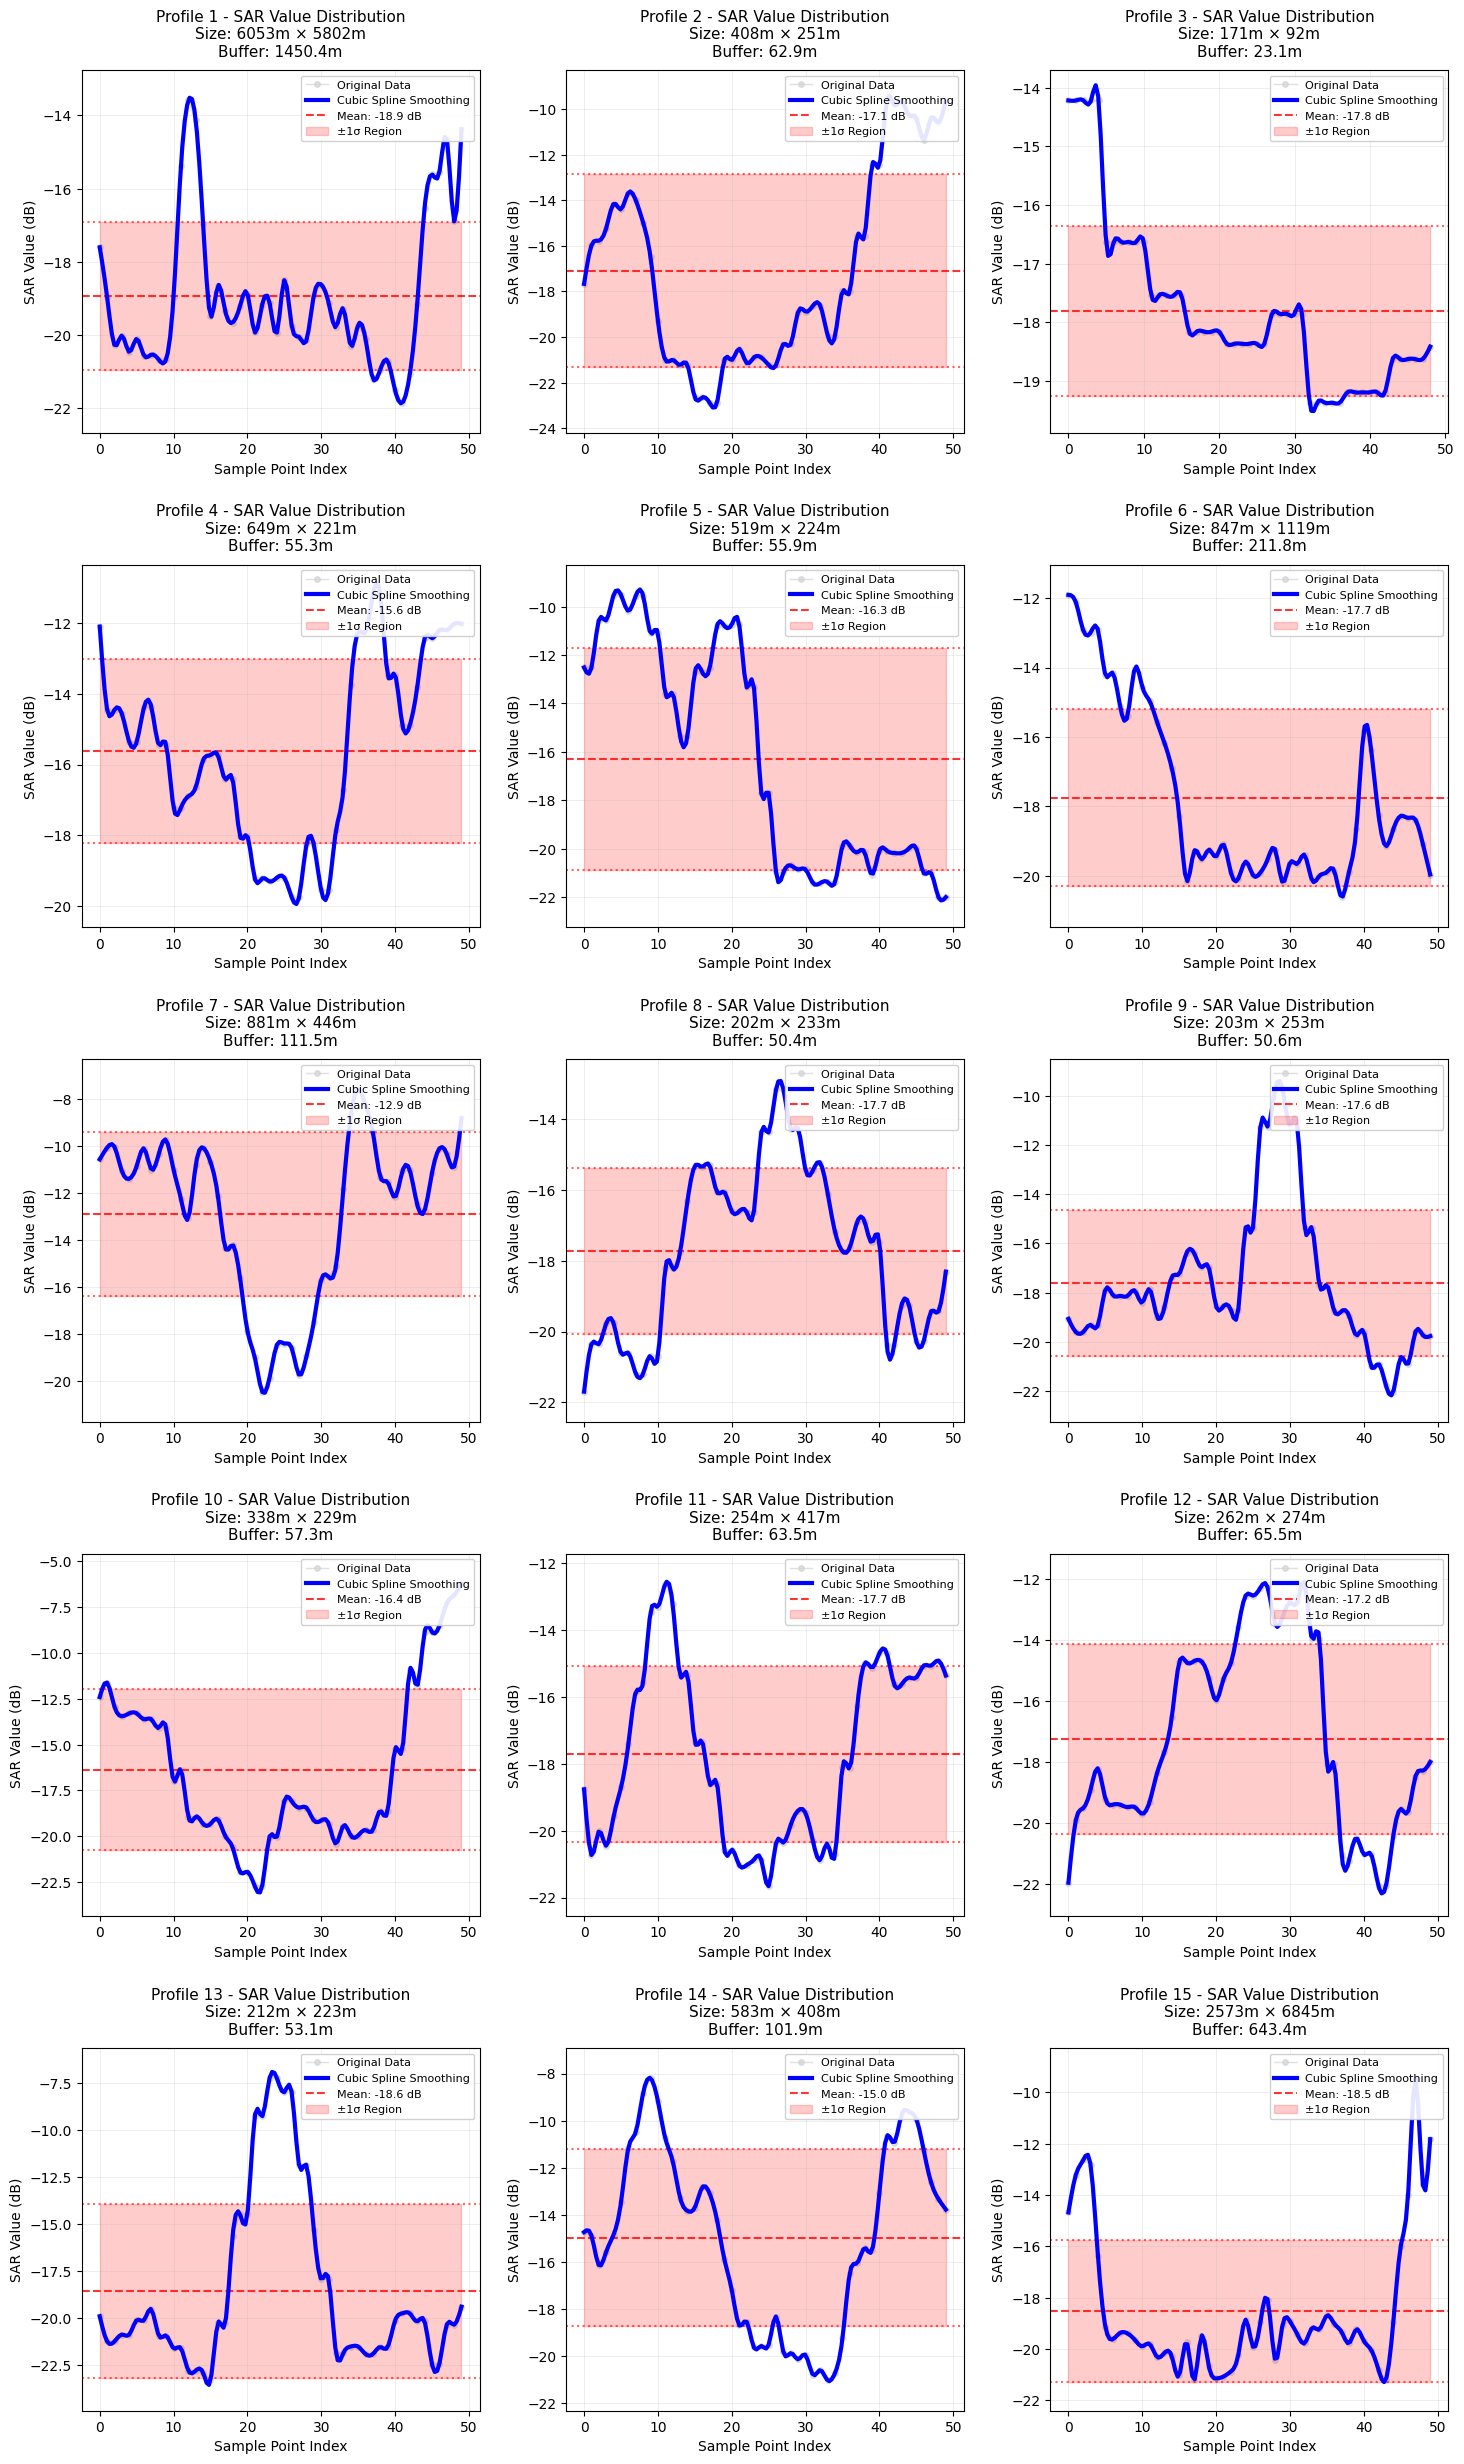

2. Creating combined comparison plot...


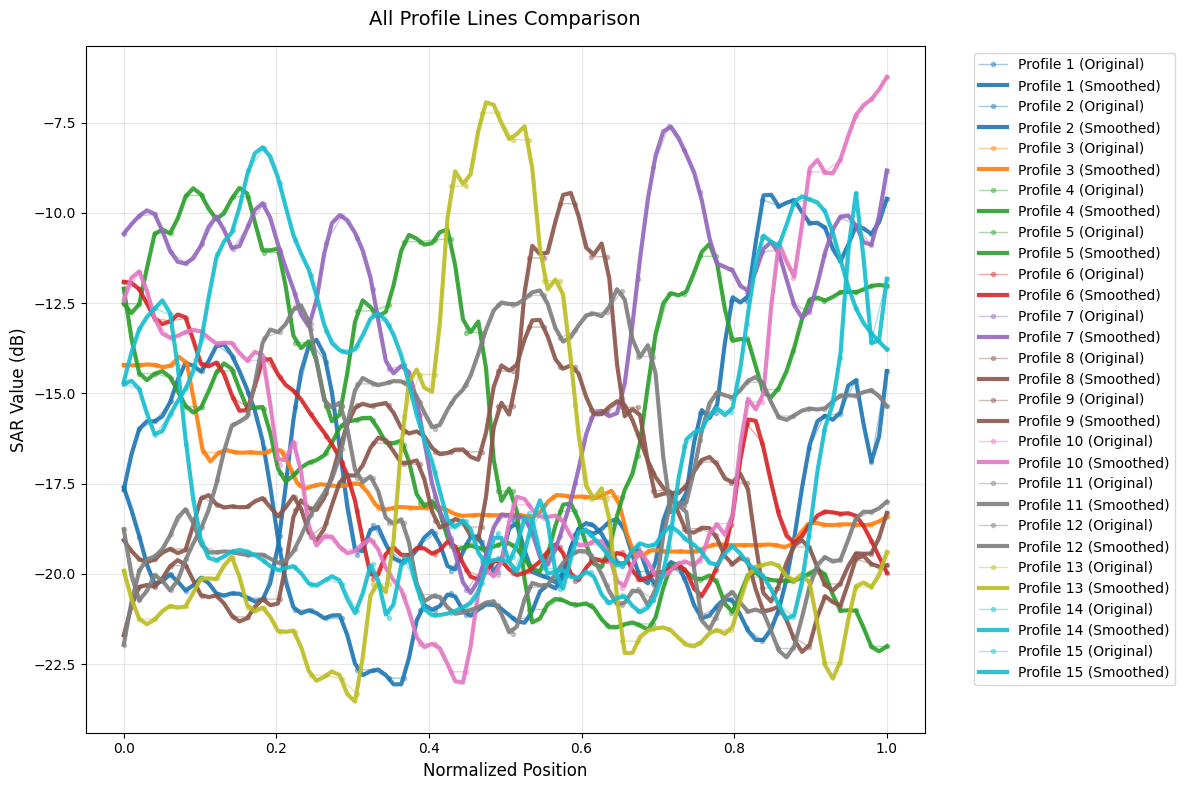

3. Creating advanced analysis plots...


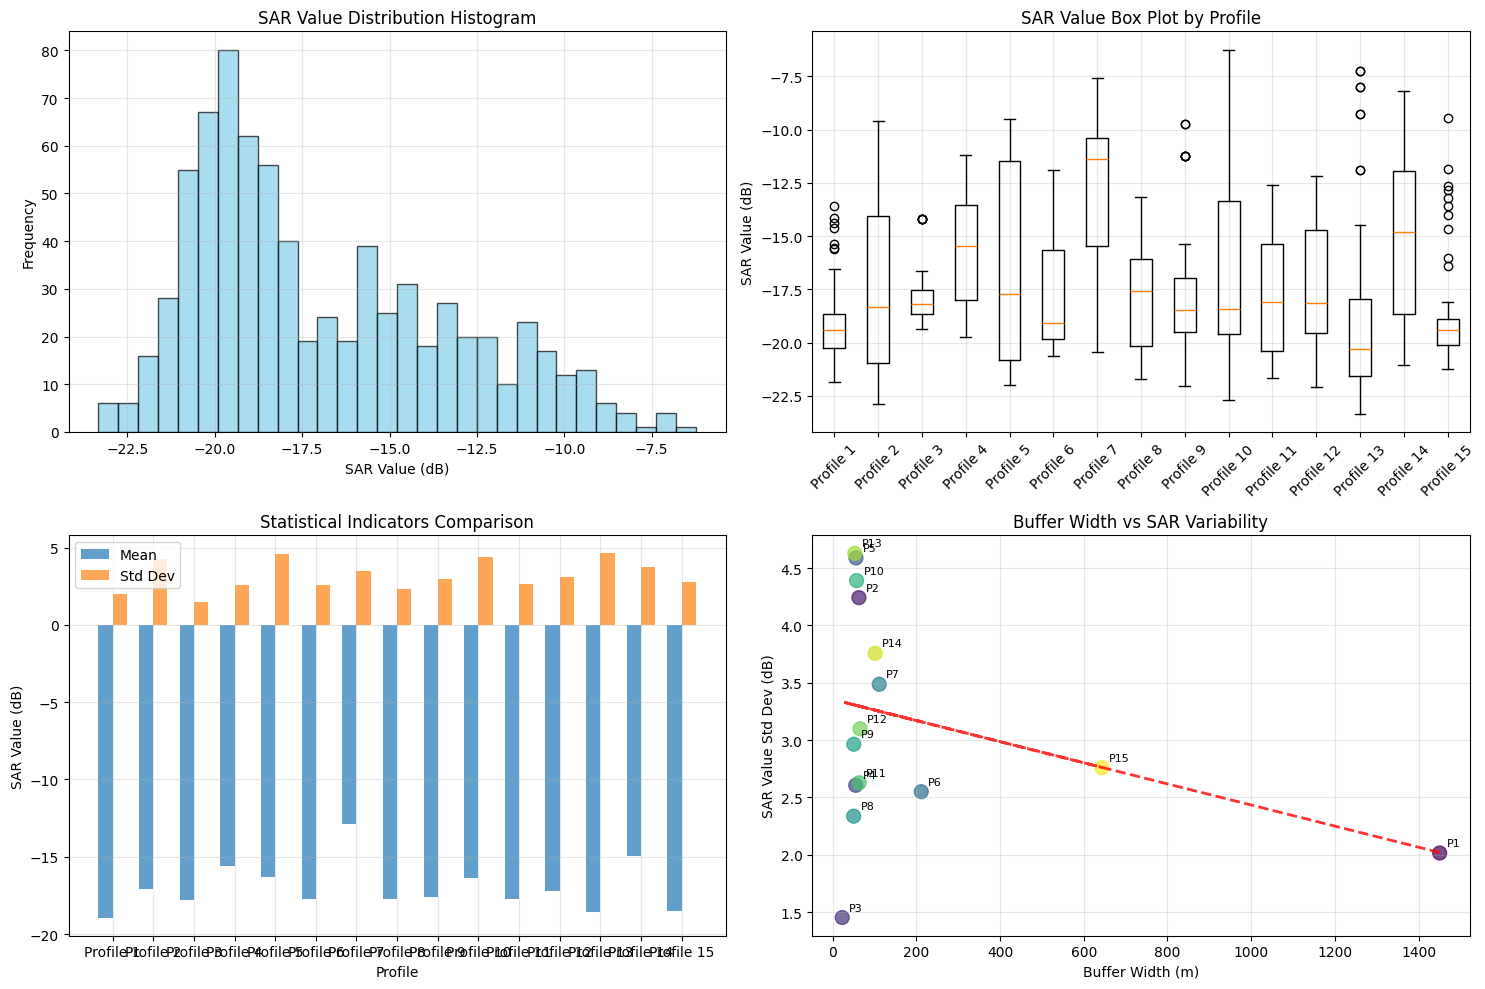


=== Profile Statistics Summary ===
   profile   mean  std    min    max  range  buffer_width
 Profile 1 -18.93 2.02 -21.84 -13.59   8.25       1450.39
 Profile 2 -17.08 4.24 -22.88  -9.61  13.27         62.87
 Profile 3 -17.81 1.45 -19.38 -14.21   5.16         23.05
 Profile 4 -15.61 2.61 -19.75 -11.20   8.55         55.30
 Profile 5 -16.31 4.59 -22.01  -9.52  12.49         55.89
 Profile 6 -17.75 2.55 -20.61 -11.91   8.70        211.80
 Profile 7 -12.89 3.49 -20.46  -7.60  12.86        111.46
 Profile 8 -17.72 2.34 -21.70 -13.16   8.53         50.41
 Profile 9 -17.60 2.96 -22.01  -9.74  12.27         50.63
Profile 10 -16.36 4.39 -22.71  -6.24  16.47         57.32
Profile 11 -17.70 2.63 -21.66 -12.61   9.04         63.55
Profile 12 -17.24 3.10 -22.06 -12.16   9.90         65.53
Profile 13 -18.57 4.63 -23.33  -7.23  16.10         53.06
Profile 14 -14.98 3.76 -21.04  -8.20  12.83        101.91
Profile 15 -18.52 2.76 -21.22  -9.45  11.77        643.36
All visualization charts completed!


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import pandas as pd

# Ëß£ÂÜ≥‰∏≠Êñá‰π±Á†ÅÈóÆÈ¢ò
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False  # Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò

def create_smooth_profile_plots(mean_profile_results):
    """‰∏∫ÊØè‰∏ÄÊù°ÂùáÂÄºÂâñÈù¢Á∫øÂàõÂª∫Âπ≥ÊªëÁöÑÂÉèÁ¥†ÊäòÁ∫øÂõæ

    Args:
        mean_profile_results (_type_): ÂùáÂÄºÂâñÈù¢Á∫øÁªìÊûúÂàóË°®
    Returns:
        ÊØè‰∏ÄÊù°ÂùáÂÄºÂâñÈù¢Á∫øÁöÑÂπ≥ÊªëÊäòÁ∫øÂõæÔºåÂåÖÊã¨ÂéüÂßãÊï∞ÊçÆÁÇπ„ÄÅÂπ≥ÊªëÊõ≤Á∫ø„ÄÅÂùáÂÄºÁ∫ø„ÄÅ¬±1Ê†áÂáÜÂ∑ÆÂå∫ÂüüÁ≠â
    """
    if not mean_profile_results:
        print("Ê≤°ÊúâÊèê‰æõÂùáÂÄºÂâñÈù¢Á∫øÁªìÊûú")
        return
    
    
    # ËÆ°ÁÆóÂ≠êÂõæÂ∏ÉÂ±Ä
    n_profiles = len(mean_profile_results)
    cols = min(3, n_profiles) # ÊúÄÂ§ö3Âàó
    rows = (n_profiles + cols - 1) // cols # ËÆ°ÁÆóË°åÊï∞
    
    # ÂàõÂª∫ÂõæÂΩ¢
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows)) # ÂàõÂª∫Â≠êÂõæÁΩëÊ†º
    
    # Â§ÑÁêÜaxesÔºàÂ≠êÂõæÁöÑÁ¥¢Âºï)‰∏∫‰∏ÄÁª¥Êï∞ÁªÑÔºåÊñπ‰æøËø≠‰ª£
    if n_profiles== 1:
        axes = [axes] # Âè™Êúâ‰∏Ä‰∏™Â≠êÂõæÊó∂ÔºåaxesÊòØÂçï‰∏™ÂØπË±°ÔºåËΩ¨‰∏∫ÂàóË°®
    elif rows == 1:
        axes = axes.flatten() # Âè™Êúâ‰∏ÄË°åÊó∂ÔºåaxesÊòØ‰∏ÄÁª¥Êï∞ÁªÑÔºåÁõ¥Êé•ÊâÅÂπ≥Âåñ
    else:
        axes = axes.flatten() # Â§öË°åÂ§öÂàóÊó∂ÔºåaxesÊòØ‰∫åÁª¥Êï∞ÁªÑÔºåÊâÅÂπ≥Âåñ‰∏∫‰∏ÄÁª¥Êï∞ÁªÑ
        
    # ËÆæÁΩÆmatplotlibÊ†∑Âºè
    plt.style.use('default') 
    
    # ÈÅçÂéÜÊØè‰∏™ÂâñÈù¢Á∫øÁªìÊûúÔºå‰∏∫ÊØè‰∏™ÂàõÂª∫‰∏Ä‰∏™Â≠êÂõæ
    for idx, result in enumerate(mean_profile_results):
        ax = axes[idx] # Ëé∑ÂèñÂΩìÂâçÂ≠êÂõæ
        
        #‰ªéÁªìÊûúÂ≠óÂÖ∏‰∏≠ÊèêÂèñSARÂÄºÊï∞ÊçÆ
        sar_values = np.array(result['mean_values']) #ËΩ¨Êç¢‰∏∫numpyÊï∞ÁªÑ‰æø‰∫éËÆ°ÁÆó
        sample_indices = np.arange(len(sar_values)) # ÂàõÂª∫ÈááÊ†∑ÁÇπÁ¥¢Âºï:0,1,2...,n-1
        
        # ÁªòÂà∂ÂéüÂßãÊï∞ÊçÆÁÇπÂíåËøûÁ∫ø
        ax.plot(sample_indices, sar_values, 'o-',  # 'o-'Ë°®Á§∫ÂúÜÁÇπ+ÂÆûÁ∫ø
                color='lightgray',  # ÊµÖÁÅ∞Ëâ≤
                alpha=0.7,  # ÈÄèÊòéÂ∫¶70%
                linewidth=1,  # Á∫øÂÆΩ1ÂÉèÁ¥†
                markersize=4,  # Ê†áËÆ∞ÁÇπÂ§ßÂ∞è4ÂÉèÁ¥†
                label='Original Data',  # Âõæ‰æãÊ†áÁ≠æ
                zorder=1)  # ÁªòÂà∂Â±ÇÊ¨°ÔºåÊï∞ÂÄºÂ∞èÁöÑÂú®‰∏ãÂ±Ç
        
        # ‰ΩøÁî®‰∏âÊ¨°Ê†∑Êù°ÊèíÂÄºËøõË°åÂπ≥Êªë
        if len(sar_values) > 3: #Ëá≥Â∞ëÈúÄË¶ÅÂõõ‰∏™ÁÇπ
            try:
                #ÂàõÂª∫Êõ¥ÂØÜÈõÜÁöÑÊèíÂÄºÁÇπ - ÂéüÊù•n‰∏™ÁÇπÊãìÂ±ïÂà∞3n‰∏™ÁÇπ
                x_new = np.linspace(0, len(sar_values)-1, num=len(sar_values)*3) #linspace()Âú®ÊåáÂÆöËåÉÂõ¥ÂÜÖÁîüÊàêÂùáÂåÄÈó¥ÈöîÁöÑÊï∞ÂÄº
                
                # Âü∫‰∫éÂéüÊù•ÁöÑÂÉèÁ¥†Á¥¢Âºï-sarÊï∞ÊçÆÔºå‰ΩøÁî®scipyÁöÑ‰∏âÊ¨°Ê†∑Êù°ÊèíÂÄº,ÁîüÊàê‰∏Ä‰∏™ÊèíÂÄºÂáΩÊï∞
                cs = interpolate.CubicSpline(sample_indices, # xÂùêÊ†áÔºàÈááÊ†∑ÁÇπÁ¥¢Âºï)
                                             sar_values, # yÂùêÊ†áÔºàSARÂÄº)
                                            bc_type='natural') # Ëá™ÁÑ∂ËæπÁïåÊù°‰ª∂
                sar_smooth = cs(x_new) # ËÆ°ÁÆóÊèíÂÄºÁÇπÁöÑSARÂÄº
                
                # ÁªòÂà∂Âπ≥ÊªëÊõ≤Á∫ø
                ax.plot(x_new, sar_smooth, '-', # '-'Ë°®Á§∫ÂÆûÁ∫ø
                        color = 'blue', # ËìùËâ≤
                        linewidth = 3,
                        label = 'Cubic Spline Smoothing',
                        zorder = 3) # ÁªòÂà∂Â±ÇÊ¨°ÔºåÊï∞ÂÄºÂ§ßÁöÑÂú®‰∏äÂ±Ç
                
            except Exception as e:
                # Â¶ÇÊûúÊèíÂÄºÂ§±Ë¥•ÔºåÊâìÂç∞ÈîôËØØ‰ø°ÊÅØ‰ΩÜ‰∏ç‰∏≠Êñ≠Á®ãÂ∫è
                print(f"Spline interpolation failed for profile {idx+1}: {e}")
                
        # ËÆ°ÁÆóÁªüËÆ°‰ø°ÊÅØ
        mean_val = np.mean(sar_values) # ËÆ°ÁÆóÂùáÂÄº
        std_val = np.std(sar_values) # ËÆ°ÁÆóÊ†áÂáÜÂ∑Æ
        min_val = np.min(sar_values) # ËÆ°ÁÆóÊúÄÂ∞èÂÄº
        max_val = np.max(sar_values) # ËÆ°ÁÆóÊúÄÂ§ßÂÄº
        
        # Ê∑ªÂä†Ê∞¥Âπ≥ÂèÇËÄÉÁ∫ø
        ax.axhline(y=mean_val,  # Âú®y=mean_val‰ΩçÁΩÆÁîªÊ∞¥Âπ≥Á∫ø
                   color='red',  # Á∫¢Ëâ≤
                   linestyle='--',  # ËôöÁ∫øÊ†∑Âºè
                   alpha=0.8,  # ÈÄèÊòéÂ∫¶80%
                   label=f'Mean: {mean_val:.1f} dB')  # Âõæ‰æãÊ†áÁ≠æÔºå‰øùÁïô1‰ΩçÂ∞èÊï∞
        
        # Ê∑ªÂä†¬±1Ê†áÂáÜÂ∑ÆÁöÑÂèÇËÄÉÁ∫øÔºà‰∏çÂä†Âõæ‰æãÔºåÈÅøÂÖçÂõæ‰æãËøáÂ§öÔºâ
        ax.axhline(y=mean_val + std_val, color='red', linestyle=':', alpha=0.6)  # ‰∏äÁïå
        ax.axhline(y=mean_val - std_val, color='red', linestyle=':', alpha=0.6)  # ‰∏ãÁïå
        
        # Â°´ÂÖÖ¬±1Ê†áÂáÜÂ∑ÆÂå∫Âüü
        ax.fill_between(sample_indices,  # xÂùêÊ†áËåÉÂõ¥
                        mean_val - std_val,  # ‰∏ãËæπÁïå
                        mean_val + std_val,  # ‰∏äËæπÁïå
                        alpha=0.2,  # ÈÄèÊòéÂ∫¶20%
                        color='red',  # Á∫¢Ëâ≤Â°´ÂÖÖ
                        label='¬±1œÉ Region')  # Âõæ‰æãÊ†áÁ≠æ
        
        # ËÆæÁΩÆÂ≠êÂõæÊ†áÈ¢ò - ÂåÖÂê´ÂâñÈù¢Á∫øÁºñÂè∑ÂíåÂÖ≥ÈîÆ‰ø°ÊÅØ
        ax.set_title(f'Profile {idx+1} - SAR Value Distribution\n'  # Á¨¨‰∏ÄË°åÔºöÊ†áÈ¢ò
                    f'Size: {result["width_meters"]:.0f}m √ó {result["height_meters"]:.0f}m\n'  # Á¨¨‰∫åË°åÔºöÁü©ÂΩ¢Â∞∫ÂØ∏
                    f'Buffer: {result["buffer_width_meters"]:.1f}m',  # Á¨¨‰∏âË°åÔºöÁºìÂÜ≤Âå∫ÂÆΩÂ∫¶
                    fontsize=11, pad=10)  # Â≠ó‰ΩìÂ§ßÂ∞è11ÔºåÊ†áÈ¢ò‰∏éÂõæÁöÑÈó¥Ë∑ù10
        
        # ËÆæÁΩÆÂùêÊ†áËΩ¥Ê†áÁ≠æ
        ax.set_xlabel('Sample Point Index', fontsize=10)  # xËΩ¥Ê†áÁ≠æ
        ax.set_ylabel('SAR Value (dB)', fontsize=10)  # yËΩ¥Ê†áÁ≠æ
        
        # Ê∑ªÂä†ÁΩëÊ†º
        ax.grid(True,  # ÂêØÁî®ÁΩëÊ†º
                alpha=0.3,  # ÈÄèÊòéÂ∫¶30%
                linestyle='-',  # ÂÆûÁ∫øÊ†∑Âºè
                linewidth=0.5)  # Á∫øÂÆΩ0.5ÂÉèÁ¥†
        
        # ËÆæÁΩÆÂõæ‰æã
        ax.legend(loc='upper right',  # ‰ΩçÁΩÆÔºöÂè≥‰∏äËßí
                  fontsize=8,  # Â≠ó‰ΩìÂ§ßÂ∞è8
                  framealpha=0.9)  # Âõæ‰æãÊ°ÜÈÄèÊòéÂ∫¶90%
        
        # Âä®ÊÄÅË∞ÉÊï¥YËΩ¥ÊòæÁ§∫ËåÉÂõ¥
        y_range = max_val - min_val 
        ax.set_ylim(min_val - y_range*0.1, max_val + y_range*0.1)  # ‰∏ãÈôê‰∏∫ÊúÄÂ∞èÂÄº-10%ËåÉÂõ¥Ôºå‰∏äÈôê‰∏∫ÊúÄÂ§ßÂÄº+10%ËåÉÂõ¥
        # ÈöêËóèÂ§ö‰ΩôÁöÑÂ≠êÂõæÔºàÂΩìÂâñÈù¢Á∫øÊï∞Èáè‰∏çËÉΩÂÆåÂÖ®Â°´Êª°ÁΩëÊ†ºÊó∂Ôºâ
    for idx in range(n_profiles, len(axes)):
        axes[idx].set_visible(False)  # ËÆæÁΩÆ‰∏∫‰∏çÂèØËßÅ
    
    # Ë∞ÉÊï¥Â≠êÂõæÂ∏ÉÂ±ÄÔºåÈÅøÂÖçÈáçÂè†
    plt.tight_layout(pad=2.0)  # pad=2.0ËÆæÁΩÆÂ≠êÂõæÈó¥ÁöÑÈó¥Ë∑ù
    
    # ÊòæÁ§∫ÂõæÂΩ¢
    plt.show()
    
def create_combined_profile_plot(mean_profile_results):
    """ÂàõÂª∫ÊâÄÊúâÂâñÈù¢Á∫øÁöÑÁªÑÂêàÂØπÊØîÂõæÔºåÂ∞ÜÊâÄÊúâÂâñÈù¢Á∫øÊòæÁ§∫Âú®Âêå‰∏ÄÂº†ÂõæËøõË°åÊØîËæÉ

    Args:
        mean_profile_results (_type_): _description_
    Returns:
        ‰∏ÄÂº†Â§ßÂõæÔºåÊâÄÊúâÂâñÈù¢Á∫øÁöÑÂπ≥ÊªëÊäòÁ∫øÂõæËøõË°åÂØπÊØî
    """
    if not mean_profile_results:
        print("Ê≤°ÊúâÊèê‰æõÂùáÂÄºÂâñÈù¢Á∫øÁªìÊûú")
        return
    
    # ÂàõÂª∫Âçï‰∏™Â§ßÂõæ
    plt.figure(figsize=(12,8))
    
    # ‰∏∫ÊØè‰∏™ÂâñÈù¢Á∫øÂàÜÈÖç‰∏çÂêåÈ¢úËâ≤
    # np.linspaceÁîüÊàê‰ªé0Âà∞1ÁöÑÂùáÂåÄÈó¥ÈöîÁöÑÊï∞ÂÄºÔºåÊï∞Èáè‰∏∫ÂâñÈù¢Á∫øÊï∞ÈáèÔºåtab10Â∞ÜËøô‰∫õÊï∞ÁªÑÊò†Â∞ÑÂà∞Ë∞ÉËâ≤Êùø‰∏≠ÔºåÁîüÊàêÈ¢úËâ≤Êï∞ÁªÑ
    colors = plt.cm.tab10(np.linspace(0, 1, len(mean_profile_results)))
    
    # ÈÅçÂéÜÊØè‰∏™ÂâñÈù¢Á∫øÂèäÂØπÂ∫îÈ¢úËâ≤
    for idx, (result, color) in enumerate(zip(mean_profile_results, colors)):
        sar_values = np.array(result['mean_values'])
        sampled_indices = np.arange(len(sar_values))
        
        # Â∞ÜÁ¥¢ÂºïÊ≠£ËßÑÂåñÂà∞0-1ËåÉÂõ¥Ôºå‰æø‰∫é‰∏çÂêåÈïøÂ∫¶ÂâñÈù¢Á∫øËøõË°åÊØîËæÉ
        normalized_indices =  sampled_indices / (len(sar_values) - 1) # Á¥¢Âºï‰ªé0ÂºÄÂßãÔºåÊúÄÂ§ßÂÄº‰∏∫len-1
        
        # ÁªòÂà∂ÂéüÂßãÊäòÁ∫øÊï∞ÊçÆ
        # ÁªòÂà∂ÂéüÂßãÊï∞ÊçÆÔºàÊ∑°Ëâ≤ÔºåÁî®‰∫éÂØπÊØîÔºâ
        plt.plot(normalized_indices, sar_values, 'o-',
                color=color, alpha=0.4,  # ÈÄèÊòéÂ∫¶40%ÔºåÊØîËæÉÊ∑°
                linewidth=1, markersize=3,
                label=f'Profile {idx+1} (Original)')
        
        # Ê†∑Êù°Âπ≥ÊªëÂ§ÑÁêÜ
        if len(sar_values) > 3:
            try:
                # ÂàõÂª∫Ê≠£ËßÑÂåñÁöÑÊèíÂÄºÁÇπ
                x_new = np.linspace(0, 1, len(sar_values)*2)
                cs = interpolate.CubicSpline(normalized_indices, sar_values, bc_type='natural')
                sar_smooth = cs(x_new)
                
                # ÁªòÂà∂Âπ≥ÊªëÊõ≤Á∫øÔºà‰∏çÈÄèÊòéÔºåÁ™ÅÂá∫ÊòæÁ§∫Ôºâ
                plt.plot(x_new, sar_smooth, '-',
                        color=color, linewidth=3, alpha=0.9,
                        label=f'Profile {idx+1} (Smoothed)')
            except:
                pass  # ÂøΩÁï•ÊèíÂÄºÂ§±Ë¥•ÁöÑÊÉÖÂÜµ
    
    # ËÆæÁΩÆÂõæË°®Ê†áÈ¢òÂíåÊ†áÁ≠æ
    plt.xlabel('Normalized Position', fontsize=12)  # xËΩ¥ÔºöÊ≠£ËßÑÂåñ‰ΩçÁΩÆ
    plt.ylabel('SAR Value (dB)', fontsize=12)  # yËΩ¥ÔºöSARÂÄº
    plt.title('All Profile Lines Comparison', fontsize=14, pad=15)  # Ê†áÈ¢ò
    plt.grid(True, alpha=0.3)  # Ê∑ªÂä†ÁΩëÊ†º
    
    # ËÆæÁΩÆÂõæ‰æãÔºàÊîæÂú®ÂõæÂ§ñÂè≥‰æßÔºâ
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()  # Ëá™Âä®Ë∞ÉÊï¥Â∏ÉÂ±Ä
    plt.show()

        
def create_advanced_analysis_plots(mean_profile_results):
    """
    ÂàõÂª∫ËøõÈò∂ÂàÜÊûêÂõæË°® - Êèê‰æõÊõ¥Ê∑±ÂÖ•ÁöÑÁªüËÆ°ÂàÜÊûêËßÜÂõæ
    """
    if not mean_profile_results:
        return
    
    # ÂàõÂª∫2x2ÁöÑÂ≠êÂõæÁΩëÊ†º
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Êî∂ÈõÜÊâÄÊúâÊï∞ÊçÆÁî®‰∫éÂàÜÊûê
    all_values = []  # Â≠òÂÇ®ÊâÄÊúâÂâñÈù¢Á∫øÁöÑÊâÄÊúâSARÂÄº
    profile_stats = []  # Â≠òÂÇ®ÊØè‰∏™ÂâñÈù¢Á∫øÁöÑÁªüËÆ°‰ø°ÊÅØ
    
    # ËÆ°ÁÆóÊØè‰∏™ÂâñÈù¢Á∫øÁöÑÁªüËÆ°ÊåáÊ†á
    for idx, result in enumerate(mean_profile_results):
        values = np.array(result['mean_values'])
        all_values.extend(values)  # Â∞ÜÂΩìÂâçÂâñÈù¢Á∫øÁöÑÂÄºÊ∑ªÂä†Âà∞ÊÄªÂàóË°®
        
        # ÂàõÂª∫ÁªüËÆ°‰ø°ÊÅØÂ≠óÂÖ∏
        profile_stats.append({
            'profile': f'Profile {idx+1}',
            'mean': np.mean(values),  # ÂùáÂÄº
            'std': np.std(values),  # Ê†áÂáÜÂ∑Æ
            'min': np.min(values),  # ÊúÄÂ∞èÂÄº
            'max': np.max(values),  # ÊúÄÂ§ßÂÄº
            'range': np.max(values) - np.min(values),  # ÂÄºÂüü
            'buffer_width': result['buffer_width_meters']  # ÁºìÂÜ≤Âå∫ÂÆΩÂ∫¶
        })
    
    # ËΩ¨Êç¢‰∏∫pandas DataFrame‰æø‰∫éÊìç‰Ωú
    df_stats = pd.DataFrame(profile_stats)
    
    # Â≠êÂõæ1ÔºöÊï¥‰ΩìSARÂÄºÂàÜÂ∏ÉÁõ¥ÊñπÂõæ
    ax1.hist(all_values,  # ÊâÄÊúâSARÂÄº
             bins=30,  # ÂàÜ‰∏∫30‰∏™Âå∫Èó¥
             alpha=0.7,  # ÈÄèÊòéÂ∫¶70%
             color='skyblue',  # Â§©ËìùËâ≤
             edgecolor='black')  # ÈªëËâ≤ËæπÊ°Ü
    ax1.set_xlabel('SAR Value (dB)')
    ax1.set_ylabel('Frequency')
    ax1.set_title('SAR Value Distribution Histogram')
    ax1.grid(True, alpha=0.3)
    
    # Â≠êÂõæ2ÔºöÂêÑÂâñÈù¢Á∫øÁöÑÁÆ±ÂΩ¢ÂõæÂØπÊØî
    box_data = [result['mean_values'] for result in mean_profile_results]  # ÊØè‰∏™ÂâñÈù¢Á∫øÁöÑÊï∞ÊçÆ
    box_labels = [f'Profile {i+1}' for i in range(len(mean_profile_results))]  # Ê†áÁ≠æ
    ax2.boxplot(box_data, labels=box_labels)
    ax2.set_ylabel('SAR Value (dB)')
    ax2.set_title('SAR Value Box Plot by Profile')
    ax2.tick_params(axis='x', rotation=45)  # xËΩ¥Ê†áÁ≠æÊóãËΩ¨45Â∫¶
    ax2.grid(True, alpha=0.3)
    
    # Â≠êÂõæ3ÔºöÁªüËÆ°ÊåáÊ†áÊü±Áä∂ÂõæÂØπÊØî
    x_pos = np.arange(len(df_stats))  # xËΩ¥‰ΩçÁΩÆ
    width = 0.35  # Êü±Â≠êÂÆΩÂ∫¶
    # ÁªòÂà∂Âπ∂ÊéíÁöÑÊü±Áä∂Âõæ
    ax3.bar(x_pos - width/2, df_stats['mean'], width, label='Mean', alpha=0.7)  # ÂùáÂÄº
    ax3.bar(x_pos + width/2, df_stats['std'], width, label='Std Dev', alpha=0.7)  # Ê†áÂáÜÂ∑Æ
    ax3.set_xlabel('Profile')
    ax3.set_ylabel('SAR Value (dB)')
    ax3.set_title('Statistical Indicators Comparison')
    ax3.set_xticks(x_pos)  # ËÆæÁΩÆxËΩ¥ÂàªÂ∫¶‰ΩçÁΩÆ
    ax3.set_xticklabels(df_stats['profile'])  # ËÆæÁΩÆxËΩ¥ÂàªÂ∫¶Ê†áÁ≠æ
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Â≠êÂõæ4ÔºöÁºìÂÜ≤Âå∫ÂÆΩÂ∫¶vs SARÂèòÂºÇÊÄßÊï£ÁÇπÂõæ
    ax4.scatter(df_stats['buffer_width'],  # xÔºöÁºìÂÜ≤Âå∫ÂÆΩÂ∫¶
               df_stats['std'],  # yÔºöÊ†áÂáÜÂ∑ÆÔºàÂèòÂºÇÊÄßÊåáÊ†áÔºâ
               s=100,  # ÁÇπÁöÑÂ§ßÂ∞è
               alpha=0.7,  # ÈÄèÊòéÂ∫¶
               c=range(len(df_stats)),  # È¢úËâ≤Êò†Â∞ÑÂà∞Á¥¢Âºï
               cmap='viridis')  # ‰ΩøÁî®viridisËâ≤ÂΩ©Êò†Â∞Ñ
    ax4.set_xlabel('Buffer Width (m)')
    ax4.set_ylabel('SAR Value Std Dev (dB)')
    ax4.set_title('Buffer Width vs SAR Variability')
    
    # Ê∑ªÂä†Ë∂ãÂäøÁ∫øÔºàÂ¶ÇÊûúÊúâÂ§ö‰∫é1‰∏™ÁÇπÔºâ
    if len(df_stats) > 1:
        # ‰ΩøÁî®‰∏ÄÊ¨°Â§öÈ°πÂºèÔºàÁõ¥Á∫øÔºâÊãüÂêà
        z = np.polyfit(df_stats['buffer_width'], df_stats['std'], 1)
        p = np.poly1d(z)  # ÂàõÂª∫Â§öÈ°πÂºèÂáΩÊï∞
        ax4.plot(df_stats['buffer_width'], p(df_stats['buffer_width']),
                "r--", alpha=0.8, linewidth=2)  # Á∫¢Ëâ≤ËôöÁ∫ø
    
    # ‰∏∫ÊØè‰∏™Êï£ÁÇπÊ∑ªÂä†Ê†áÁ≠æ
    for i, row in df_stats.iterrows():
        ax4.annotate(f'P{i+1}',  # Ê†áÁ≠æÊñáÊú¨
                    (row['buffer_width'], row['std']),  # Ê†áÁ≠æ‰ΩçÁΩÆ
                    xytext=(5, 5),  # ÊñáÊú¨ÂÅèÁßª
                    textcoords='offset points',  # ÂÅèÁßªÂçï‰Ωç
                    fontsize=8)
    
    ax4.grid(True, alpha=0.3)
    
    # Ë∞ÉÊï¥Êï¥‰ΩìÂ∏ÉÂ±Ä
    plt.tight_layout()
    plt.show()
    
    # ÊâìÂç∞ÁªüËÆ°Ë°®Ê†ºÂà∞ÊéßÂà∂Âè∞
    print("\n=== Profile Statistics Summary ===")
    print(df_stats.round(2).to_string(index=False))  # ‰øùÁïô2‰ΩçÂ∞èÊï∞Ôºå‰∏çÊòæÁ§∫Ë°åÁ¥¢Âºï

# ÊâßË°åÂèØËßÜÂåñÁöÑ‰∏ªÁ®ãÂ∫è
print("\n=== Creating Mean Profile Line Visualization Charts ===")

# 1. ÂàõÂª∫‰∏™Âà´ÂâñÈù¢Á∫øÁöÑÂπ≥ÊªëÂõæ
print("1. Creating spline smoothed profile plots...")
create_smooth_profile_plots(mean_profile_results)

# 2. ÂàõÂª∫ÁªÑÂêàÂØπÊØîÂõæ
print("2. Creating combined comparison plot...")
create_combined_profile_plot(mean_profile_results)

# 3. ÂàõÂª∫ËøõÈò∂ÂàÜÊûêÂõæ
print("3. Creating advanced analysis plots...")
create_advanced_analysis_plots(mean_profile_results)

print("All visualization charts completed!")

## 7.4 ÂùáÂÄºÂâñÈù¢Á∫øÊ¢ØÂ∫¶ËÆ°ÁÆóÂèäÊ¢ØÂ∫¶ÁÇπÂèØËßÜÂåñ

### ÂáΩÊï∞1:‰ªéÂùáÂÄºÂâñÈù¢Á∫øÁªìÊûú‰∏≠ËÆ°ÁÆóÊØè‰∏™Áü©ÂΩ¢Â±ÄÈÉ®ÈòàÂÄº
### ÂáΩÊï∞2ÔºöÊèêÂèñËÆ°ÁÆóÊàêÂäüÁöÑÁªìÊûú‰∏éÈòàÂÄºÁªüËÆ°‰ø°ÊÅØ
### ÂáΩÊï∞3ÔºöÂú®Âú∞Âõæ‰∏äÂèØËßÜÂåñÊ¢ØÂ∫¶ÊûÅÂÄºÁÇπÂíåÈòàÂÄºËÆ°ÁÆóÁªìÊûú

In [28]:
import numpy as np

def calculate_local_threshold_from_mean_profile(mean_profile_result):
    """
    ‰ªéÂùáÂÄºÂâñÈù¢Á∫øÁªìÊûú‰∏≠ËÆ°ÁÆóÊØè‰∏™Áü©ÂΩ¢ÁöÑÂ±ÄÈÉ®ÈòàÂÄº
    ÂéüÁêÜ:
    1. ‰ªéÂùáÂÄºÂâñÈù¢Á∫ø‰∏≠ÊèêÂèñSARÂ∫èÂàó
    2. ËÆ°ÁÆó‰∏ÄÈò∂Ê¢ØÂ∫¶ÔºåÊâæÂà∞ÊúÄÂ§ßÊ≠£Ê¢ØÂ∫¶ÂíåÊúÄÂ§ßË¥üÊ¢ØÂ∫¶
    3. ÈÄöËøáÊ¢ØÂ∫¶ÊûÅÂÄºÁÇπ‰∏§‰æßÂÉèÁ¥†ÂÄºÁöÑÂùáÂÄºÊù•Á°ÆÂÆöÈòàÂÄº
    4. ÊúÄÁªàÈòàÂÄº‰∏∫Ê≠£Ë¥üÊ¢ØÂ∫¶ÈòàÂÄºÁöÑÂπ≥ÂùáÂÄº
    Args:
        mean_profile_results: ÂåÖÂê´ÂùáÂÄºÂâñÈù¢Á∫ø‰ø°ÊÅØÁöÑÂ≠óÂÖ∏
         -'mean_values': SARÂÄºÂàóË°®
         -'feature': ÂéüÂßãÁü©ÂΩ¢Feature
         -'neg/pos+grad_point_coords': ÊúÄÊ≠£/ÊúÄË¥üÂÖ≥ÈîÆÁÇπÂùêÊ†á
         -'local_threshold': Â±ÄÈÉ®ÈòàÂÄº
         -ÂÖ∂‰ªñÁõ∏ÂÖ≥Â±ûÊÄß..
         
    Returns:
        ‰∏Ä‰∏™ÂåÖÂê´Â±ÄÈÉ®ÈòàÂÄºÂíåÁõ∏ÂÖ≥‰ø°ÊÅØÁöÑÂ≠óÂÖ∏
    """
    try:
        # --- 1.Êï∞ÊçÆÂáÜÂ§á‰∏éÈ™åËØÅ ---
        sar_values = mean_profile_result.get('mean_values', []) # Ëé∑ÂèñSARÂÄºÂàóË°®
        sample_points = mean_profile_result.get('sample_points', []) # Ëé∑ÂèñÈááÊ†∑ÁÇπÂùêÊ†áÂàóË°®
        
        # Ê£ÄÊü•Êï∞ÊçÆÊúâÊïàÊÄß
        if not sar_values or len(sar_values) < 3:
            return {
                'success': False,
                'local_threshold':-999,
                'reason':'NotEnoughPoints',
                'error_msg':f'Least need 3 points, actually got {len(sar_values)}'
            }
        
        # --- 2.Ê¢ØÂ∫¶ËÆ°ÁÆó‰∏éÂàÜÊûê ---
        #‰∏≠ÂøÉÂ∑ÆÂàÜÁöÑ‰∏ÄÈò∂Ê¢ØÂ∫¶ËÆ°ÁÆó
        sar_array = np.array(sar_values) 
        gradients = np.gradient(sar_array)
        
        print(f" SARÂÄºËåÉÂõ¥:[{sar_array.min():.2f}, {sar_array.max():.2f}] dB")
        print(f" Ê¢ØÂ∫¶ËåÉÂõ¥: [{gradients.min():.3f}, {gradients.max():.3f}] dB/pixel")
        
        # --- 3.ÂØªÊâæÊûÅÂÄºÊ¢ØÂ∫¶‰ΩçÁΩÆ ---
        # ‰∏∫ÈÅøÂÖçËæπÁïåÊïàÂ∫îÔºåÂú®Èô§ÂéªÈ¶ñÂ∞æÁöÑÊ¢ØÂ∫¶‰∏≠ÂØªÊâæÊûÅÂÄº
        inner_gradients = gradients[1:-1]
        
        # ÂØªÊâæÊúÄÂ§ßÊ≠£/Ë¥üÊ¢ØÂ∫¶ÂèäÂÖ∂Á¥¢Âºï
        idx_max_neg_grad = np.argmin(inner_gradients) + 1 #Âõ†‰∏∫ËøõË°å‰∫ÜËæπÁïåÔºàÂºÄÂ§¥‰∏Ä‰∏™ÂÉèÁ¥†ÔºâÂâîÈô§ÔºåÊâÄ‰ª•Á¥¢ÂºïÈúÄË¶Å+1
        idx_max_pos_grad = np.argmax(inner_gradients) + 1
        
        print(f"    ÊúÄÂ§ßË¥üÊ¢ØÂ∫¶: ‰ΩçÁΩÆ{idx_max_neg_grad}, ÂÄº={gradients[idx_max_neg_grad]:.3f}")
        print(f"    ÊúÄÂ§ßÊ≠£Ê¢ØÂ∫¶: ‰ΩçÁΩÆ{idx_max_pos_grad}, ÂÄº={gradients[idx_max_pos_grad]:.3f}")
        
        # --- 4.ËÆ°ÁÆóÂ±ÄÈÉ®ÈòàÂÄº ---
        # ‰ΩøÁî®‰∏§‰∏™Ê¢ØÂ∫¶ÊûÅÂÄºÁÇπ‰∏éÂÖ∂ÈÇªËøëÁÇπÁöÑÂùáÂÄº‰Ωú‰∏∫ÈòàÂÄºÔºå‰∏§‰∏™ÂùáÂÄºÁöÑÂÜçÂùáÂÄº‰∏∫ÊúÄÁªàÈòàÂÄº
        if idx_max_neg_grad > 0:
            thresh_neg = (sar_array[idx_max_neg_grad] + sar_array[idx_max_neg_grad -1]) / 2.0
        else:
            thresh_neg = sar_array[idx_max_neg_grad]    #ËæπÁïåÁÇπÔºåÊó†Ê≥ïÂèñÂâç‰∏Ä‰∏™ÁÇπ
        
        if idx_max_pos_grad > 0:
            thresh_pos = (sar_array[idx_max_pos_grad] + sar_array[idx_max_pos_grad - 1]) / 2.0
        else:
            thresh_pos = sar_array[idx_max_pos_grad]
            
        # ÊúÄÁªàÈòàÂÄºÔºö‰∏§‰∏™ÂÄôÈÄâÈòàÂÄºÁöÑÂπ≥Âùá
        local_threshold = (thresh_neg + thresh_pos) / 2.0
        
        print(f"    Ë¥üÊ¢ØÂ∫¶ÈòàÂÄº: {thresh_neg:.2f} dB")
        print(f"    Ê≠£Ê¢ØÂ∫¶ÈòàÂÄº: {thresh_pos:.2f} dB")
        print(f"    ÊúÄÁªàÂ±ÄÈÉ®ÈòàÂÄº: {local_threshold:.2f} dB")
        
        # ---5.Ê†πÊçÆ‰πãÂâçÁöÑÂÖ≥ÈîÆÈááÊ†∑ÁÇπÊèêÂèñÂÖ≥ÈîÆÁÇπÂùêÊ†á ---
        neg_grad_coords = sample_points[idx_max_neg_grad] if idx_max_neg_grad < len(sample_points) else None
        pos_grad_coords = sample_points[idx_max_pos_grad] if idx_max_pos_grad < len(sample_points) else None
        
        return {
            'success': True,
            'local_threshold': local_threshold,
            'thresh_neg': thresh_neg,
            'thresh_pos': thresh_pos,
            'max_neg_gradient': gradients[idx_max_neg_grad],
            'max_pos_gradient': gradients[idx_max_pos_grad],
            'neg_grad_point_coords': neg_grad_coords,
            'pos_grad_point_coords': pos_grad_coords,
            'neg_grad_index': idx_max_neg_grad,
            'pos_grad_index': idx_max_pos_grad,
            'all_gradients': gradients.tolist(),
            'reason': f"ÊàêÂäüËÆ°ÁÆó„ÄÇË¥üÊ¢ØÂ∫¶ÈòàÂÄº={thresh_neg:.2f}, Ê≠£Ê¢ØÂ∫¶ÈòàÂÄº={thresh_pos:.2f}"
        }
        
    except Exception as e:
        return {
            'success': False,
            'local_threshold': -999,
            'reason': 'CalculationError',
            'error_msg': str(e)
        }
        
def process_all_profile_thresholds(mean_profile_results):
    """
    Â§ÑÁêÜÊâÄÊúâÂùáÂÄºÂâñÈù¢Á∫øÔºåËÆ°ÁÆóÊØè‰∏™Áü©ÂΩ¢ÁöÑÂ±ÄÈÉ®ÈòàÂÄº,Âπ∂ÊâìÂç∞Âá∫ÂÖ∑‰Ωì‰ø°ÊÅØÔºåËøô‰∏™ÂáΩÊï∞Ë¶ÅÂú®‰∏ä‰∏™ÂáΩÊï∞ÁöÑÂü∫Á°Ä‰∏äËøêË°å
    Args:
        mean_profile_results: ÂåÖÂê´ÊâÄÊúâÂùáÂÄºÂâñÈù¢Á∫øÁªìÊûúÁöÑÂàóË°®
    Returns:
        tuple:ÊàêÂäüÁöÑÈòàÂÄºÁªìÊûúÂàóË°®ÔºåÊâÄÊúâÁªìÊûúÁöÑÁªüËÆ°‰ø°ÊÅØ
    """
    print("\n" + "="*80)
    print("ÂºÄÂßãÊâπÈáèËÆ°ÁÆóÂùáÂÄºÂâñÈù¢Á∫øÁöÑÂ±ÄÈÉ®ÈòàÂÄº")
    print("="*80)
    print(f"{'Profile ID':<12} | {'Local Threshold':<16} | {'Status':<10} | {'Details'}")
    print("-"*80)
    
    successful_results = []
    failed_results = []
    all_thresholds = []
    
    for idx, profile_result in enumerate(mean_profile_results):
        print(f"\nÂ§ÑÁêÜÂâñÈù¢Á∫ø{idx+1}...")
        
        # Ë∞ÉÁî®ÈòàÂÄºËÆ°ÁÆóÂáΩÊï∞
        threshold_result = calculate_local_threshold_from_mean_profile(profile_result)
        
        # ÂêàÂπ∂ÂéüÂßãÂâñÈù¢Á∫øÊï∞ÊçÆÂíåÈòàÂÄºËÆ°ÁÆóÁªìÊûú
        # ËøôÊòØ‰∏™Â§ßÂ≠óÂÖ∏ÔºåÂÖ∂‰∏≠Â±ûÊÄßÂµåÂ•óÂ∞èÂ≠óÂÖ∏
        combined_result = {
            'profile_id' : idx + 1,  # ÂâñÈù¢Á∫øIDÔºåint
            'original_profile_data' : profile_result, #ÂéüÂßãÂâñÈù¢Á∫øÊï∞ÊçÆÔºåÂ≠óÂÖ∏
            'threshold_calculation' : threshold_result #ÈòàÂÄºËÆ°ÁÆóÁªìÊûúÔºåÂ≠óÂÖ∏
        }
        
        # Ê†πÊçÆËÆ°ÁÆóÁªìÊûúÂàÜÁ±ª
        if threshold_result['success']:
            threshold_value = threshold_result['local_threshold'] #ÊèêÂèñËØ•Áü©ÂΩ¢ÁöÑÂ±ÄÈÉ®ÈòàÂÄº
            status = 'SUCCESS'
            details = f"threshold={threshold_value:.2f} dB"
            successful_results.append(combined_result) # Ê∑ªÂä†Âà∞ÊàêÂäüÂàóË°®
            all_thresholds.append(threshold_value) # ‰ªÖ‰øùÂ≠òÈòàÂÄºÁî®‰∫éÁªüËÆ°
        else:
            threshold_value = "N/A" # Â§±Ë¥•Êó∂Êó†ÈòàÂÄº
            status = 'FAILED'
            details = f"Reason: {threshold_result.get('reason','Unknown error')}"
            failed_results.append(combined_result) # Ê∑ªÂä†Âà∞Â§±Ë¥•ÂàóË°®
            
        # ÊâìÂç∞Â§ÑÁêÜÁªìÊûú
        print(f"Profile{idx+1:<5}|{str(threshold_value):<16}|{status:<10}{details}") # ÂàÜÂà´ÊâìÂç∞ID„ÄÅÈòàÂÄº„ÄÅÁä∂ÊÄÅ„ÄÅËØ¶ÊÉÖ‰ø°ÊÅØ
        
        # Â¶ÇÊûúÊàêÂäüÔºåÊâìÂç∞ËØ¶ÁªÜ‰ø°ÊÅØ
        if threshold_result['success']:
            print(f"    ‚úì Ë¥üÊ¢ØÂ∫¶: {threshold_result['max_neg_gradient']:.3f} ‚Üí ÈòàÂÄº {threshold_result['thresh_neg']:.2f}")
            print(f"    ‚úì Ê≠£Ê¢ØÂ∫¶: {threshold_result['max_pos_gradient']:.3f} ‚Üí ÈòàÂÄº {threshold_result['thresh_pos']:.2f}")
            

    print("-" * 80)
    
    # ---ÁªüËÆ°‰ø°ÊÅØÊ±áÊÄª---
    total_profiles = len(mean_profile_results) # ÂâñÈù¢Á∫øÊï∞Èáè
    success_count = len(successful_results) # ÊàêÂäüÊï∞Èáè
    failure_count = len(failed_results) # Â§±Ë¥•Êï∞Èáè
    
    #ÁªßÁª≠ÂàõÂª∫‰∏Ä‰∏™Â≠óÂÖ∏ÔºåÂ≠òÂÇ®ÂêÑ‰∏™ÁªüËÆ°ÂÄº
    statistics = {
        'total_profiles':total_profiles,
        'success_count':success_count,
        'failure_count':failure_count,
        'success_rate': (success_count / total_profiles * 100) if total_profiles > 0 else 0,
        'all_thresholds': all_thresholds
    }
    
    # Â¶ÇÊûúÊúâÊàêÂäüÁöÑÈòàÂÄºÔºåËÆ°ÁÆóÁªüËÆ°ÊåáÊ†á
    if all_thresholds:
        statistics.update({
            'mean_threshold':np.mean(all_thresholds),
            'std_threshold':np.std(all_thresholds),
            'min_threshold':np.min(all_thresholds),
            'max_threshold':np.max(all_thresholds),
            'threshold_range':np.max(all_thresholds) - np.min(all_thresholds)
        })
        print(f"\nÈòàÂÄºÁªüËÆ°ÊëòË¶Å:")
        print(f"  ÊàêÂäüÁéá: {statistics['success_rate']:.1f}% ({success_count}/{total_profiles})")
        print(f"  ÈòàÂÄºËåÉÂõ¥: [{statistics['min_threshold']:.2f}, {statistics['max_threshold']:.2f}] dB")
        print(f"  Âπ≥ÂùáÈòàÂÄº: {statistics['mean_threshold']:.2f} ¬± {statistics['std_threshold']:.2f} dB")
    else:
        print(f"\nÂ§ÑÁêÜÁªìÊûú: Â§±Ë¥•Áéá100% (0/{total_profiles})")
    
    print("="*80)
    
    return successful_results, statistics # ËøîÂõûÊàêÂäüÁöÑÁªìÊûúÂíåÁªüËÆ°‰ø°ÊÅØ
   

def visualize_threshold_points_on_map(successful_results, Map):
    """
    Âú®Âú∞Âõæ‰∏äÂèØËßÜÂåñÊ¢ØÂ∫¶ÊûÅÂÄºÁÇπÂíåÈòàÂÄºËÆ°ÁÆóÁªìÊûú
    
    Args:
        successful_results(list):ÊàêÂäüËÆ°ÁÆóÈòàÂÄºÁöÑÁªìÊûúÂàóË°®
        Map(geemap.Map): geemapÂú∞ÂõæÂØπË±°
    """
    if not successful_results:
        print("Ê≤°ÊúâÊàêÂäüÁöÑÈòàÂÄºËÆ°ÁÆóÁªìÊûú‰æõÂèØËßÜÂåñ")
        return
    
    print(f"\nÂú®Âú∞Âõæ‰∏äÂèØËßÜÂåñ{len(successful_results)}‰∏™ÂâñÈù¢Á∫øÁöÑÊ¢ØÂ∫¶ÊûÅÂÄºÁÇπ...")
    
    # Êî∂ÈõÜÊâÄÊúâÊ¢ØÂ∫¶ÊûÅÂÄºÁÇπÁöÑÂùêÊ†áÔºåÂàõÂª∫‰∏§‰∏™list
    neg_grad_points = [] #ÊúÄÂ§ßË¥üÊ¢ØÂ∫¶ÁÇπ
    pos_grad_points = [] #ÊúÄÂ§ßÊ≠£Ê¢ØÂ∫¶ÁÇπ
    
    for result in successful_results: # ÈÅçÂéÜÊØè‰∏™ÊàêÂäüÁªìÊûú(‰∏∫combined_resultsÁöÑÂµåÂ•óÂ≠óÂÖ∏)
        threshold_calc = result['threshold_calculation'] # ÊèêÂèñÂµåÂ•óÂ≠óÂÖ∏‰∏≠ÁöÑÈòàÂÄºËÆ°ÁÆóÁªìÊûúÂ≠óÂÖ∏
        
        # ÊèêÂèñÊ≠£ÔºåË¥üÊ¢ØÂ∫¶ÊûÅÂÄºÁÇπÂùêÊ†áÂà∞ÂàóË°®‰∏≠
        neg_coords = threshold_calc.get('neg_grad_point_coords')
        if neg_coords:
            neg_grad_points.append(ee.Feature(ee.Geometry.Point(neg_coords))) # ÂàõÂª∫geeÁü¢ÈáèÁ±ªÂûãÁöÑÁÇπFeatureÂπ∂Ê∑ªÂä†Âà∞ÂàóË°®
        pos_coords = threshold_calc.get('pos_grad_point_coords')
        if pos_coords:
            pos_grad_points.append(ee.Feature(ee.Geometry.Point(pos_coords)))
            
    # ÂàõÂª∫FeatureCollectionÂπ∂Ê∑ªÂä†Âà∞Âú∞Âõæ
    if neg_grad_points:
        neg_points_fc = ee.FeatureCollection(neg_grad_points)
        Map.addLayer(neg_points_fc,{
            'color':'FF0000',
            'pointSize':8,
            'pointShape':'circle'
        }, 'Max Negative Gradient Points')
        print(f"  ‚úì Ê∑ªÂä† {len(neg_grad_points)} ‰∏™ÊúÄÂ§ßË¥üÊ¢ØÂ∫¶ÁÇπ-red")
        
    if pos_grad_points:
        pos_points_fc = ee.FeatureCollection(pos_grad_points)
        Map.addLayer(pos_points_fc,{
            'color':'0000FF',
            'pointSize':8,
            'pointShape':'circle'
        }, 'Max Positive Gradient Points')
        print(f"  ‚úì Ê∑ªÂä† {len(pos_grad_points)} ‰∏™ÊúÄÂ§ßÊ≠£Ê¢ØÂ∫¶ÁÇπ-blue")
    
    
    
    
    

        
        
        
        
            
        
   

### ‰∏ªÊâßË°åÊµÅÁ®ã

In [29]:
# Ê£ÄÊü•ÂâçÊèêÊù°‰ª∂
if 'mean_profile_results' not in globals() or not mean_profile_results:
    print("‚ùå ÈîôËØØÔºöÊú™ÊâæÂà∞ 'mean_profile_results' Êï∞ÊçÆ")
    print("   ËØ∑Á°Æ‰øùÊÇ®Â∑≤ÊàêÂäüËøêË°å‰∫ÜÁ¨¨7.2ËäÇÁöÑÂùáÂÄºÂâñÈù¢Á∫øÊèêÂèñ‰ª£Á†Å")
else:
    print(f"‚úì ÊâæÂà∞ {len(mean_profile_results)} Êù°ÂùáÂÄºÂâñÈù¢Á∫øÔºåÂºÄÂßãËÆ°ÁÆóÂ±ÄÈÉ®ÈòàÂÄº...")
    
    # ÊâßË°åÊâπÈáèÈòàÂÄºËÆ°ÁÆó
    successful_threshold_results, threshold_statistics = process_all_profile_thresholds(mean_profile_results)
    
    # Âú®Âú∞Âõæ‰∏äÂèØËßÜÂåñÁªìÊûú
    Map_gradient = geemap.Map()
    Map_gradient.centerObject(roi_choose1, 11)
    
    if successful_threshold_results:
        visualize_threshold_points_on_map(successful_threshold_results, Map ) # Êñ∞Âú∞ÂõæÂ∞±Áî®‰∏äÈù¢ÁöÑMap_gradient
        
        # Â∞ÜÁªìÊûú‰øùÂ≠ò‰∏∫ÂÖ®Â±ÄÂèòÈáèÔºå‰æõÂêéÁª≠‰ΩøÁî®
        global local_threshold_results
        local_threshold_results = successful_threshold_results
        
        print(f"\nüéâ Â±ÄÈÉ®ÈòàÂÄºËÆ°ÁÆóÂÆåÊàêÔºÅ")
        print(f"   ‚úì ÊàêÂäüËÆ°ÁÆó {len(successful_threshold_results)} ‰∏™Â±ÄÈÉ®ÈòàÂÄº")
        print(f"   ‚úì ÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ÂÖ®Â±ÄÂèòÈáè 'local_threshold_results'")
        print(f"   ‚úì Ê¢ØÂ∫¶ÊûÅÂÄºÁÇπÂ∑≤Âú®Âú∞Âõæ‰∏äÂèØËßÜÂåñ")
        
        # Â±Ö‰∏≠ÊòæÁ§∫Âà∞Á†îÁ©∂Âå∫Âüü
        if 'roi_choose1' in globals():
            Map.centerObject(roi_choose1, 12)
    else:
        print("‚ùå Ê≤°ÊúâÊàêÂäüËÆ°ÁÆóÂá∫‰ªª‰ΩïÂ±ÄÈÉ®ÈòàÂÄº")

print("\n" + "#"*80)
print("# Â±ÄÈÉ®ÈòàÂÄºËÆ°ÁÆóÊ®°ÂùóÊâßË°åÂÆåÊØï")  
print("#"*80)

# ÊòæÁ§∫Êõ¥Êñ∞ÂêéÁöÑÂú∞Âõæ
Map
        
    

‚úì ÊâæÂà∞ 15 Êù°ÂùáÂÄºÂâñÈù¢Á∫øÔºåÂºÄÂßãËÆ°ÁÆóÂ±ÄÈÉ®ÈòàÂÄº...

ÂºÄÂßãÊâπÈáèËÆ°ÁÆóÂùáÂÄºÂâñÈù¢Á∫øÁöÑÂ±ÄÈÉ®ÈòàÂÄº
Profile ID   | Local Threshold  | Status     | Details
--------------------------------------------------------------------------------

Â§ÑÁêÜÂâñÈù¢Á∫ø1...
 SARÂÄºËåÉÂõ¥:[-21.84, -13.59] dB
 Ê¢ØÂ∫¶ËåÉÂõ¥: [-2.672, 2.680] dB/pixel
    ÊúÄÂ§ßË¥üÊ¢ØÂ∫¶: ‰ΩçÁΩÆ14, ÂÄº=-2.672
    ÊúÄÂ§ßÊ≠£Ê¢ØÂ∫¶: ‰ΩçÁΩÆ11, ÂÄº=2.680
    Ë¥üÊ¢ØÂ∫¶ÈòàÂÄº: -15.54 dB
    Ê≠£Ê¢ØÂ∫¶ÈòàÂÄº: -17.17 dB
    ÊúÄÁªàÂ±ÄÈÉ®ÈòàÂÄº: -16.35 dB
Profile1    |-16.354667863894065|SUCCESS   threshold=-16.35 dB
    ‚úì Ë¥üÊ¢ØÂ∫¶: -2.672 ‚Üí ÈòàÂÄº -15.54
    ‚úì Ê≠£Ê¢ØÂ∫¶: 2.680 ‚Üí ÈòàÂÄº -17.17

Â§ÑÁêÜÂâñÈù¢Á∫ø2...
 SARÂÄºËåÉÂõ¥:[-22.88, -9.61] dB
 Ê¢ØÂ∫¶ËåÉÂõ¥: [-2.252, 1.690] dB/pixel
    ÊúÄÂ§ßË¥üÊ¢ØÂ∫¶: ‰ΩçÁΩÆ10, ÂÄº=-2.252
    ÊúÄÂ§ßÊ≠£Ê¢ØÂ∫¶: ‰ΩçÁΩÆ38, ÂÄº=1.544
    Ë¥üÊ¢ØÂ∫¶ÈòàÂÄº: -17.90 dB
    Ê≠£Ê¢ØÂ∫¶ÈòàÂÄº: -15.54 dB
    ÊúÄÁªàÂ±ÄÈÉ®ÈòàÂÄº: -16.72 dB
Profile2    |-16.71896421024969|SUCCESS   threshold=-1

Map(bottom=199979.0, center=[39.39610966538589, -0.3773114999976618], controls=(WidgetControl(options=['positi‚Ä¶

# 8.ÁªìÂêàÂ±ÄÈÉ®ÊúÄ‰ºòÂíåÂÖ®Â±ÄÊúÄ‰ºòÁöÑÊ¥™Ê∞¥ÊèêÂèñ

## 8.1 ËøáÊª§ÈòàÂÄºËÆ°ÁÆóÁªìÊûúÂ§™Â§ßÁöÑÁü©ÂΩ¢

In [30]:
def filter_threshold_results(successful_threshold_results, threshold_limit):
    """
    ËøáÊª§Â±ÄÈÉ®ÈòàÂÄºÁªìÊûúÔºåÁßªÈô§ÈòàÂÄºÂ§ß‰∫éÊåáÂÆöÈôêÂà∂ÁöÑÁü©ÂΩ¢
    
    Args:
        successful_threshold_results (dict): ÊàêÂäüËÆ°ÁÆóÈòàÂÄºÁöÑÁªìÊûúÂµåÂ•óÂ≠óÂÖ∏
        threshold_limit (float): ÈòàÂÄº‰∏äÈôêÔºåÂçï‰ΩçdB
    Returns:
        filtered_results(dict): ËøáÊª§ÂêéÁöÑÁªìÊûúÂµåÂ•óÂ≠óÂÖ∏
        statistics(dict): ËøáÊª§ÂêéÁöÑÁªìÊûúÂàóË°®ÔºåÁªüËÆ°‰ø°ÊÅØÂ≠óÂÖ∏
    """
    print(f"\n--- start filtering local threshold(remove threshold > {threshold_limit}db)")
    print("="*80)
    print(f"{'Profile ID':<12} | {'Local Threshold':<16} | {'Status':<10} | {'Action'}")
    print("-"*80)
    
    filtered_results = [] # Â≠òÂÇ®ÈÄöËøáËøáÊª§ÁöÑÁªìÊûú
    removed_results = [] # Â≠òÂÇ®Ë¢´ÁßªÈô§ÁöÑÁªìÊûú
    valid_thresholds = [] # Â≠òÂÇ®ÈÄöËøáËøáÊª§ÁöÑÈòàÂÄºÔºåÁî®‰∫éÁªüËÆ°
    
    for result in successful_threshold_results: # ÈÅçÂéÜÊØè‰∏™ÊàêÂäüÁªìÊûúÈáåÈù¢ÁöÑÂµåÂ•óÂ≠óÂÖ∏
        profile_id = result['profile_id'] # ÊèêÂèñÂâñÈù¢Á∫øID,int
        threshold_calc = result['threshold_calculation'] # ÊèêÂèñÈòàÂÄºËÆ°ÁÆóÁªìÊûúÂ≠óÂÖ∏,dict
        local_threshold = threshold_calc['local_threshold'] # ÊèêÂèñÂ±ÄÈÉ®ÈòàÂÄº,float
        
        if local_threshold <= threshold_limit:
            # ‰øùÁïôÂΩìÂâçÁü©ÂΩ¢
            filtered_results.append(result)
            valid_thresholds.append(local_threshold) # Ê∑ªÂä†Âà∞ÊúâÊïàÈòàÂÄºÂàóË°®
            status = "KEPT"
            action = f"Valic threshold: {local_threshold:.2f} "
        else:
            # ÁßªÈô§Áü©ÂΩ¢
            removed_results.append(result)
            status = "REMOVED"
            action = f"Threshold {local_threshold:.2f} > {threshold_limit}"
        print(f"Profile{profile_id:<7} | {local_threshold:<16.2f} | {status:<10} | {action}")
    
    print("-"*80)
    print(f"ËøáÊª§ÁªìÊûú:")
    print(f"  ‚úì ‰øùÁïôÁü©ÂΩ¢: {len(filtered_results)} ‰∏™")
    print(f"  ‚úó ÁßªÈô§Áü©ÂΩ¢: {len(removed_results)} ‰∏™")
    
    if valid_thresholds:
        statistics = {
            'total_kept': len(filtered_results),
            'total_removed': len(removed_results),
            'valid_thresholds': valid_thresholds,
            'mean_threshold': np.mean(valid_thresholds),
            'std_threshold': np.std(valid_thresholds),
            'min_threshold': np.min(valid_thresholds),
            'max_threshold': np.max(valid_thresholds)
        }
        print(f"  ÈòàÂÄºÁªüËÆ°: ÂùáÂÄº={statistics['mean_threshold']:.2f}, "
              f"ËåÉÂõ¥=[{statistics['min_threshold']:.2f}, {statistics['max_threshold']:.2f}] dB")
    else:
        statistics = {
            'total_kept': 0,
            'total_removed': len(removed_results),
            'valid_thresholds': [],
            'mean_threshold': None
        }
        print("  ‚ö†Ô∏è  Ë≠¶ÂëäÔºöÊ≤°Êúâ‰ªª‰ΩïÁü©ÂΩ¢ÈÄöËøáÈòàÂÄºËøáÊª§")
    
    print("="*80)
    return filtered_results, statistics
        

## 8.2 Ëá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñ

In [31]:
def create_adaptive_flood_extraction(filtered_threshold_results, flood_image, roi_choose1):
    """
    ÂàõÂª∫Ëá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñ:Áü©ÂΩ¢ÂÜÖÈÉ®‰ΩøÁî®ÈòàÂÄºÔºåÂ§ñÈÉ®‰ΩøÁî®ÂÖ®Â±ÄÂπ≥ÂùáÈòàÂÄº
    Args:
        filtered_threshold_results (dict): ËøáÊª§ÈòàÂÄºÂêéÁöÑÂµåÂ•óÂ≠óÂÖ∏
        flood_image (ee.Image): Áî®‰∫éÊ¥™Ê∞¥ÊèêÂèñÁöÑSARÂΩ±ÂÉè
        roi_choose1 (ee.Geometry): Á†îÁ©∂Âå∫Âüü
    """
    print(f"\n--- ÂºÄÂßãËá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñ ---")
    print("="*60)
    
    if not filtered_threshold_results:
        print("‚ùå ÈîôËØØÔºöÊ≤°ÊúâÊúâÊïàÁöÑÂ±ÄÈÉ®ÈòàÂÄºÁªìÊûúËøõË°åÊ¥™Ê∞¥ÊèêÂèñ")
        return None, None
    
    # --- 1.ËÆ°ÁÆóÂÖ®Â±ÄÂπ≥ÂùáÈòàÂÄº ---
    local_thresholds = [
        result['threshold_calculation']['local_threshold'] 
        for result in filtered_threshold_results # ÊèêÂèñÊâÄÊúâÂ±ÄÈÉ®ÈòàÂÄºÂà∞ÂàóË°®‰∏≠
    ]
    
    # ËÆ°ÁÆóÂÖ®Â±ÄÂπ≥ÂùáÈòàÂÄº
    global_average_threshold = np.mean(local_thresholds)
    
    print(f"Ê≠•È™§1: ËÆ°ÁÆóÂÖ®Â±ÄÂπ≥ÂùáÈòàÂÄº")
    print(f"  ‚úì ‰ΩøÁî® {len(local_thresholds)} ‰∏™ÊúâÊïàÂ±ÄÈÉ®ÈòàÂÄº")
    print(f"  ‚úì ÂÖ®Â±ÄÂπ≥ÂùáÈòàÂÄº: {global_average_threshold:.2f} dB")
    print(f"  ‚úì Â±ÄÈÉ®ÈòàÂÄºËåÉÂõ¥: [{min(local_thresholds):.2f}, {max(local_thresholds):.2f}] dB")
    
    # --- 2.‰∏∫ÊØè‰∏™Áü©ÂΩ¢ÂàõÂª∫Â±ÄÈÉ®Ê¥™Ê∞¥Ê∑πÊ≤°Êé©Ê®° ---
    print(f"\nÊ≠•È™§2: ‰∏∫ÊØè‰∏™Áü©ÂΩ¢Â∫îÁî®Â±ÄÈÉ®ÈòàÂÄº")
    
    local_flood_images = []
    rectangle_geometries = []
    
    for i,result in enumerate(filtered_threshold_results): # ÈÅçÂéÜÊØè‰∏™ÊàêÂäüÁªìÊûúÈáåÈù¢ÁöÑÂµåÂ•óÂ≠óÂÖ∏
        profile_id = result['profile_id'] # ÊèêÂèñÂâñÈù¢Á∫øID,int
        threshold_calc = result['threshold_calculation'] # ÊèêÂèñÈòàÂÄºËÆ°ÁÆóÁªìÊûúÂ≠óÂÖ∏,dict
        local_threshold = threshold_calc['local_threshold'] # ÊèêÂèñÂ±ÄÈÉ®ÈòàÂÄº,float
        rectangle_feature = result['original_profile_data']['feature'] # ÊèêÂèñÂéüÂßãÁü©ÂΩ¢Feature,ee.Feature
        
        # Ëé∑ÂèñÁü©ÂΩ¢ÁöÑÂá†‰ΩïÂΩ¢Áä∂
        rectangle_geom = rectangle_feature.geometry()
        rectangle_geometries.append(rectangle_geom) # ‰øùÂ≠òÁü©ÂΩ¢Âá†‰ΩïÁî®‰∫éÂêéÁª≠ÂèØËßÜÂåñ
        
        # Âú®ËØ•Áü©ÂΩ¢ÂÜÖÂ∫îÁî®Â±ÄÈÉ®ÈòàÂÄº
        # ÂàõÂª∫Áü©ÂΩ¢ÂÜÖÁöÑÊ¥™Ê∞¥Êé©Ê®°
        local_flood_mask = flood_image.lt(local_threshold) # SARÂÄº‰Ωé‰∫éÂ±ÄÈÉ®
        
        # Â∞ÜÊ¥™Ê∞¥Êé©Ê®°Ë£ÅÂâ™Âà∞ÂΩìÂâçÁü©ÂΩ¢ËåÉÂõ¥
        local_flood_clipped = local_flood_mask.clip(rectangle_geom).selfMask() # selfMask()Â∞ÜÈùûÊ¥™Ê∞¥Âå∫ÂüüËÆæ‰∏∫ÈÄèÊòé
        local_flood_images.append(local_flood_clipped) # Ëøô‰∏™ÂàóË°®ÂåÖÂê´‰∫ÜÊâÄÊúâÁöÑÂ±ÄÈÉ®ÂΩ±ÂÉè-Âç≥Âè™ÊúâÁü©ÂΩ¢ÂÜÖÁöÑÊ¥™Ê∞¥‰∏∫1,ÂÖ∂‰ªñÂå∫Âüü‰∏∫0ÊàñÊó†ÂÄº
        
        print(f"  Profile {profile_id}: Â±ÄÈÉ®ÈòàÂÄº {local_threshold:.2f} dB ‚Üí Áü©ÂΩ¢ÂÜÖÊ¥™Ê∞¥ÊèêÂèñ")
    
    # --- 3.ÂêàÂπ∂ÊâÄÊúâÂ±ÄÈÉ®Ê¥™Ê∞¥Âõæ ---
    print(f"\nÊ≠•È™§3ÔºöÂêàÂπ∂ÊâÄÊúâÁü©ÂΩ¢ÂÜÖÁöÑÂ±ÄÈÉ®Ê¥™Ê∞¥Âõæ")
    
    # Â∞ÜÊâÄÊúâÂ±ÄÈÉ®Ê¥™Ê∞¥ÂõæÂÉèÂêàÂπ∂
    if len(local_flood_images) == 1:
        all_local_floods = local_flood_images[0]
    else:
        local_floods_collection = ee.ImageCollection(local_flood_images) # Êää‰πãÂâçÁöÑÂ±ÄÈÉ®ÂΩ±ÂÉèËÅöÂêà‰∏∫‰∏Ä‰∏™ÂΩ±ÂÉèÈõÜÂêà
        all_local_floods = local_floods_collection.mosaic() # ‰ΩøÁî®mosaicÊñπÊ≥ïÂêàÂπ∂ÂΩ±ÂÉèÈõÜÂêà,Âç≥Âú®ÊØè‰∏™ÂÉèÁ¥†ÂèñÊúÄÂ§ßÂÄº
    
    print(f"  ‚úì ÂêàÂπ∂‰∫Ü {len(local_flood_images)} ‰∏™Â±ÄÈÉ®Ê¥™Ê∞¥ÂõæÂÉè")
    
    # --- 4.ÂàõÂª∫ÂÖ®Â±ÄÁü©ÂΩ¢Âå∫ÂüüÊ∑πÊ≤° ---
    print(f"\nÊ≠•È™§4ÔºöÂàõÂª∫ÂÖ®Â±ÄÁü©ÂΩ¢Âå∫ÂüüÁöÑÊ¥™Ê∞¥Ê∑πÊ≤°")
    
    # Â∞ÜÊâÄÊúâÁü©ÂΩ¢Âá†‰Ωï‰ΩìÂêàÂπ∂‰∏∫‰∏Ä‰∏™FeatureCollection
    
    rectangles_fc = ee.FeatureCollection([
        ee.Feature(geom) for geom in rectangle_geometries
    ])
    
    # ÂàõÂª∫‰∏Ä‰∏™Ë°®Á§∫ÊâÄÊúâÁü©ÂΩ¢Âå∫ÂüüÁöÑÊé©ËÜú
    # Âú®Áü©ÂΩ¢ÂÜÖÈÉ®ÂÄº‰∏∫1ÔºåÂ§ñÈÉ®ÂÄº‰∏∫0
    rectangles_mask = ee.Image().byte().paint(rectangles_fc, 1).clip(roi_choose1)
    
    print(f"  ‚úì ÂàõÂª∫ {len(rectangle_geometries)} ‰∏™Áü©ÂΩ¢ÁöÑÂêàÂπ∂Êé©ËÜú")
    
    # --- 5. ÂØπÁü©ÂΩ¢Â§ñÈÉ®Âå∫ÂüüÂ∫îÁî®ÂÖ®Â±ÄÂπ≥ÂùáÈòàÂÄº ---
    print(f"\nÊ≠•È™§5: ÂØπÁü©ÂΩ¢Â§ñÈÉ®Âå∫ÂüüÂ∫îÁî®ÂÖ®Â±ÄÂπ≥ÂùáÈòàÂÄº")
    
    # Âú®Êï¥‰∏™Á†îÁ©∂Âå∫ÂüüÂ∫îÁî®ÂÖ®Â±ÄÈòàÂÄº
    global_flood_mask = flood_image.lt(global_average_threshold)
    
    # Âè™‰øùÁïôÁü©ÂΩ¢Â§ñÈÉ®ÁöÑÂÖ®Â±ÄÊ¥™Ê∞¥ÔºàÁü©ÂΩ¢ÂÜÖÈÉ®ËÆæ‰∏∫0Ôºâ
    # Áü©ÂΩ¢Â§ñÈÉ®Ôºörectangles_mask = 0ÔºåÁü©ÂΩ¢ÂÜÖÈÉ®Ôºörectangles_mask = 1
    global_flood_outside = global_flood_mask.where(rectangles_mask.eq(1), 0)
    
    print(f"  ‚úì ÂÖ®Â±ÄÈòàÂÄº {global_average_threshold:.2f} dB Â∫îÁî®‰∫éÁü©ÂΩ¢Â§ñÈÉ®Âå∫Âüü")
    
    # --- 6. ÂêàÂπ∂Â±ÄÈÉ®ÂíåÂÖ®Â±ÄÊ¥™Ê∞¥Âõæ ---
    print(f"\nÊ≠•È™§6: ÂêàÂπ∂Â±ÄÈÉ®ÂíåÂÖ®Â±ÄÊ¥™Ê∞¥Âõæ")
    
    # Â∞ÜÂ±ÄÈÉ®Ê¥™Ê∞¥ÂõæÁöÑÊé©ËÜúÁßªÈô§ÔºåÁî®0Â°´ÂÖÖÊú™Êé©ËÜúÂå∫Âüü
    all_local_floods_unmasked = all_local_floods.unmask(0)
    
    # Â∞ÜÂ±ÄÈÉ®Ê¥™Ê∞¥ÔºàÁü©ÂΩ¢ÂÜÖÔºâÂíåÂÖ®Â±ÄÊ¥™Ê∞¥ÔºàÁü©ÂΩ¢Â§ñÔºâÁõ∏Âä†
    global_flood_outside_unmasked = global_flood_outside.unmask(0) # ÂêåÊ†∑Áî®0Â°´ÂÖÖÊú™Êé©ËÜúÂå∫Âüü
    final_flood_map = all_local_floods_unmasked.add(global_flood_outside_unmasked)
    
    # Â∞ÜÁªìÊûúÈôêÂà∂Âú®Á†îÁ©∂Âå∫ÂüüÂÜÖ
    final_flood_map = final_flood_map.clip(roi_choose1).selfMask() # selfMaskÔºàÔºâÂ∞ÜÂÉèÁ¥†ÂÄº‰∏∫0ÁöÑÂå∫ÂüüËÆæ‰∏∫ÈÄèÊòé
    
    print(f"  ‚úì ÊàêÂäüÂêàÂπ∂Â±ÄÈÉ®Ê¥™Ê∞¥ÂõæÂíåÂÖ®Â±ÄÊ¥™Ê∞¥Âõæ")
    
    # --- 7. ÂàõÂª∫ÊèêÂèñ‰ø°ÊÅØ ‰πüÊòØ‰∏Ä‰∏™Â≠óÂÖ∏Á±ªÂûã ---
    extraction_info = {
        'num_rectangles': len(filtered_threshold_results), # int
        'local_thresholds': local_thresholds, # list of float
        'global_average_threshold': global_average_threshold, # float
        'threshold_range': [min(local_thresholds), max(local_thresholds)], # list of float
        'extraction_strategy': 'Adaptive: Local thresholds inside rectangles, Global average outside' # str
    }
    
    print(f"\n‚úÖ Ëá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñÂÆåÊàêÔºÅ")
    print(f"  Á≠ñÁï•: Áü©ÂΩ¢ÂÜÖÈÉ®‰ΩøÁî®Â±ÄÈÉ®ÈòàÂÄºÔºåÂ§ñÈÉ®‰ΩøÁî®ÂÖ®Â±ÄÂπ≥ÂùáÈòàÂÄº")
    print(f"  Áü©ÂΩ¢Êï∞Èáè: {extraction_info['num_rectangles']}")
    print(f"  ÂÖ®Â±ÄÈòàÂÄº: {extraction_info['global_average_threshold']:.2f} dB")
    print("="*60)
    
    return final_flood_map, extraction_info
        
    
    
    

In [32]:
# ÂèØËßÜÂåñÊúÄÁªàÁöÑÊ¥™Ê∞¥ÊèêÂèñÁªìÊûúÂáΩÊï∞
def visualize_final_flood_results(final_flood_map, extraction_info, filtered_threshold_results, roi_choose1):
    """
    ÂèØËßÜÂåñÊúÄÁªàÁöÑÊ¥™Ê∞¥ÊèêÂèñÁªìÊûú
    Args:
        final_flood_map:ÊúÄÁªàÊ¥™Ê∞¥Âõæ(ee.Image)
        extraction_info:ÊèêÂèñ‰ø°ÊÅØ(dict)
        filtered_threshold_results(dict):ËøáÊª§ÂêéÁöÑÈòàÂÄºÁªìÊûúÂµåÂ•óÂ≠óÂÖ∏
        roi_choose1:Á†îÁ©∂Âå∫Âüü(ee.Geometry)
    """
    print(f"\n--- ÂèØËßÜÂåñÊúÄÁªàÊ¥™Ê∞¥ÊèêÂèñÁªìÊûú")
    Map_final = geemap.Map()
    Map_final.centerObject(roi_choose1, 11)
    
    # Ê∑ªÂä†ÂéüÂßãSARÂΩ±ÂÉè‰Ωú‰∏∫Â∫ïÂõæ
    Map_final.addLayer(flood_image,{'min':-25,'max':5},'SAR Image(VV)',False)
    flood_vis = {
        'palette':['#0066CC'], # Ê∑±ËìùËâ≤,ÈúÄË¶Å‰ΩøÁî®ÂàóË°®ËÄå‰∏çÊòØÈõÜÂêà
        'opacity':0.8
    }
    
    # Ê∑ªÂä†Ê¥™Ê∞¥ÁªìÊûúÂΩ±ÂÉè
    Map_final.addLayer(final_flood_map, flood_vis, 'Final Flood Map', True)
    
    # Ê∑ªÂä†Áü©ÂΩ¢ËæπÁïå‰ª•ÊòæÁ§∫Â±ÄÈÉ®ÈòàÂÄºÂ∫îÁî®Âå∫Âüü
    #  È¶ñÂÖàÊî∂ÈõÜÁü©ÂΩ¢
    rectangle_features = []
    for result in filtered_threshold_results:
        original_data = result['original_profile_data']
        rectangle_feature = original_data['feature']
        rectangle_features.append(rectangle_feature)
    
    # ÁÑ∂ÂêéËΩ¨‰∏∫FeatureCollectionÔºåÂπ∂ÈÄöËøápaintÊñπÊ≥ïÁªòÂà∂ËæπÁïå
    if rectangle_features:
        rectangles_fc = ee.FeatureCollection(rectangle_features)
        rectangle_outline = ee.Image().byte().paint(rectangles_fc,0,2)
        Map_final.addLayer(rectangle_outline,{
            'palette':'FFFF00' # ÈªÑËâ≤
        }, 'Rectangles Outlines', True)
        print(f"  ‚úì ÊòæÁ§∫ {len(rectangle_features)} ‰∏™Â±ÄÈÉ®ÈòàÂÄºÂ∫îÁî®Âå∫ÂüüÔºàÈªÑËâ≤ËæπÊ°ÜÔºâ")
    
    # Ê∑ªÂä†Ê¢ØÂ∫¶ÊûÅÂÄºÁÇπ
    neg_grad_points = []
    pos_grad_points = []
    
    for result in filtered_threshold_results:
        threshold_calc = result['threshold_calculation']
        
        neg_coords = threshold_calc.get('neg_grad_point_coords')
        if neg_coords:
            neg_grad_points.append(ee.Feature(ee.Geometry.Point(neg_coords)))
            
        pos_coords = threshold_calc.get('pos_grad_point_coords')
        if pos_coords:
            pos_grad_points.append(ee.Feature(ee.Geometry.Point(pos_coords)))
    
    if neg_grad_points:
        neg_points_fc = ee.FeatureCollection(neg_grad_points)
        Map_final.addLayer(neg_points_fc, {
            'color': 'FF0000',
            'pointSize': 6,
            'pointShape': 'circle'
        }, 'Negative Gradient Points')
        print(f"  ‚úì ÊòæÁ§∫ {len(neg_grad_points)} ‰∏™Ë¥üÊ¢ØÂ∫¶ÊûÅÂÄºÁÇπÔºàÁ∫¢Ëâ≤Ôºâ")
    
    if pos_grad_points:
        pos_points_fc = ee.FeatureCollection(pos_grad_points)
        Map_final.addLayer(pos_points_fc, {
            'color': '0000FF',
            'pointSize': 6,
            'pointShape': 'circle'
        }, 'Positive Gradient Points')
        print(f"  ‚úì ÊòæÁ§∫ {len(pos_grad_points)} ‰∏™Ê≠£Ê¢ØÂ∫¶ÊûÅÂÄºÁÇπÔºàËìùËâ≤Ôºâ")
    
    # ÊâìÂç∞ÊèêÂèñÁªüËÆ°‰ø°ÊÅØ
    print(f"\nüìä ÊúÄÁªàÊ¥™Ê∞¥ÊèêÂèñÁªüËÆ°‰ø°ÊÅØ:")
    print(f"  ÊèêÂèñÁ≠ñÁï•: {extraction_info['extraction_strategy']}")
    print(f"  Â±ÄÈÉ®ÈòàÂÄºÁü©ÂΩ¢Êï∞Èáè: {extraction_info['num_rectangles']}")
    print(f"  ÂÖ®Â±ÄÂπ≥ÂùáÈòàÂÄº: {extraction_info['global_average_threshold']:.2f} dB")
    print(f"  Â±ÄÈÉ®ÈòàÂÄºËåÉÂõ¥: [{extraction_info['threshold_range'][0]:.2f}, {extraction_info['threshold_range'][1]:.2f}] dB")
    
    # ÊòæÁ§∫Âõæ‰æãËØ¥Êòé
    print(f"\nüó∫Ô∏è Âú∞ÂõæÂõæÂ±ÇËØ¥Êòé:")
    print(f"  üîµ Ê∑±ËìùËâ≤Âå∫Âüü: ÊúÄÁªàÊ¥™Ê∞¥Ê∑πÊ≤°ËåÉÂõ¥")
    print(f"  üü® ÈªÑËâ≤ËæπÊ°Ü: Â∫îÁî®Â±ÄÈÉ®ÈòàÂÄºÁöÑÁü©ÂΩ¢Âå∫Âüü")
    print(f"  üî¥ Á∫¢Ëâ≤ÁÇπ: Ë¥üÊ¢ØÂ∫¶ÊûÅÂÄºÁÇπ")
    print(f"  üîµ ËìùËâ≤ÁÇπ: Ê≠£Ê¢ØÂ∫¶ÊûÅÂÄºÁÇπ")
    print(f"  üìç Áü©ÂΩ¢ÂÜÖ: ‰ΩøÁî®ÂêÑËá™ÁöÑÂ±ÄÈÉ®ÈòàÂÄº")
    print(f"  üìç Áü©ÂΩ¢Â§ñ: ‰ΩøÁî®ÂÖ®Â±ÄÂπ≥ÂùáÈòàÂÄº {extraction_info['global_average_threshold']:.2f} dB")
    
    return Map_final
        
        
        
    
    
    

In [ ]:
# 9.2 ‰øÆÊîπÁâàÂèØËßÜÂåñÁªìÊûúÂáΩÊï∞ - Ê∑ªÂä†Âà∞Áé∞ÊúâÂú∞Âõæ
def add_hybrid_grid_to_existing_map(final_segmentation_map, segmentation_info, filtered_threshold_results, existing_map):
    """
    Â∞ÜÊ∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤ÁªìÊûúÊ∑ªÂä†Âà∞Áé∞ÊúâÁöÑÂú∞Âõæ‰∏ä
    Args:
        final_segmentation_map: Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂâ≤ÁªìÊûúÂΩ±ÂÉè
        segmentation_info: ÂàÜÂâ≤‰ø°ÊÅØÂ≠óÂÖ∏
        filtered_threshold_results: ËøáÊª§ÂêéÁöÑÈòàÂÄºÁªìÊûú
        existing_map: Áé∞ÊúâÁöÑgeemapÂú∞ÂõæÂØπË±°ÔºàÁ¨¨ÂÖ´Á´†ÁöÑMap_final_floodÔºâ
    """
    print("\n--- Â∞ÜÊ∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤ÁªìÊûúÊ∑ªÂä†Âà∞Áé∞ÊúâÂú∞Âõæ ---")
    
    # Ê∑ªÂä†Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂâ≤ÁªìÊûúÔºà‰ΩøÁî®‰∏çÂêåÈ¢úËâ≤‰ª•Âå∫ÂàÜÁ¨¨ÂÖ´Á´†ÁªìÊûúÔºâ
    grid_segmentation_vis = {
        'palette': ['#FF6B6B'],  # Á∫¢Ëâ≤Á≥ª
        'opacity': 0.6
    }
    existing_map.addLayer(final_segmentation_map, grid_segmentation_vis, 'Method 2: Hybrid Grid Segmentation', True)
    
    # Ê∑ªÂä†Ê†ºÁΩëÂàÜÂùóÁöÑÂÄôÈÄâÁü©ÂΩ¢ËæπÁïåÔºà‰ΩøÁî®‰∏çÂêåÈ¢úËâ≤Ôºâ
    rectangle_features = []
    for result in filtered_threshold_results:
        rectangle_features.append(result['original_profile_data']['feature'])
    
    if rectangle_features:
        rectangles_fc = ee.FeatureCollection(rectangle_features)
        rectangle_outline = ee.Image().byte().paint(rectangles_fc, 0, 1)
        existing_map.addLayer(rectangle_outline, {'palette': '00FFFF'}, 'Grid Method Rectangles', False)  # ÈªòËÆ§ÂÖ≥Èó≠ÔºåÈÅøÂÖç‰∏éÁ¨¨ÂÖ´Á´†ÈáçÂè†
    
    # ÊâìÂç∞ÁªüËÆ°‰ø°ÊÅØ
    print(f"\nüìä Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤ÁªüËÆ°:")
    print(f"  ÂàÜÂâ≤ÊñπÊ≥ï: {segmentation_info['method']}")
    print(f"  ÂõæÂÉèÂ∞∫ÂØ∏: {segmentation_info['image_size'][0]} √ó {segmentation_info['image_size'][1]} ÂÉèÁ¥†")
    print(f"  Âü∫Êú¨ÂàÜÂùóÂ∞∫Â∫¶: {segmentation_info['block_scale_B']} ÂÉèÁ¥†")
    print(f"  ËßÑÂàôÊ†ºÁΩë: {segmentation_info['grid_size'][0]} √ó {segmentation_info['grid_size'][1]}")
    print(f"  ‰∏çËßÑÂàôÂàÜÂùóÊï∞: {segmentation_info['total_large_rectangles']}")
    print(f"  ËßÑÂàôÊ†ºÁΩëÊï∞: {segmentation_info['total_grid_cells']}")
    
    print(f"\nüó∫Ô∏è Êõ¥Êñ∞ÂêéÁöÑÂú∞ÂõæÂõæÂ±ÇËØ¥Êòé:")
    print(f"  üîµ Ê∑±ËìùËâ≤Âå∫Âüü: ÊñπÊ≥ï1-Ëá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñÁªìÊûú")
    print(f"  üî¥ Á∫¢Ëâ≤Âå∫Âüü: ÊñπÊ≥ï2-Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤ÁªìÊûú")
    print(f"  üü® ÈªÑËâ≤ËæπÊ°Ü: ÊñπÊ≥ï1‰ΩøÁî®ÁöÑÁü©ÂΩ¢Âå∫Âüü")
    print(f"  üîµ ÈùíËâ≤ËæπÊ°Ü: ÊñπÊ≥ï2‰ΩøÁî®ÁöÑÁü©ÂΩ¢Âå∫ÂüüÔºàÈªòËÆ§ÈöêËóèÔºâ")
    print(f"  üî¥ Á∫¢Ëâ≤ÁÇπ: Ë¥üÊ¢ØÂ∫¶ÊûÅÂÄºÁÇπ")
    print(f"  üîµ ËìùËâ≤ÁÇπ: Ê≠£Ê¢ØÂ∫¶ÊûÅÂÄºÁÇπ")
    print(f"  üìç ‰∏§ÁßçÊñπÊ≥ïÂú®Âêå‰∏ÄÂú∞Âõæ‰∏äËøõË°åÂØπÊØîÊòæÁ§∫")
    
    return existing_map

In [33]:
# ‰∏ªÊâßË°åÊµÅÁ®ãÔºöËá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñ
# ==============================================================================

print("\n" + "#"*80)
print("# Á¨¨8ËäÇÔºöÁªìÂêàÂ±ÄÈÉ®ÊúÄ‰ºòÂíåÂÖ®Â±ÄÊúÄ‰ºòÁöÑÊ¥™Ê∞¥ÊèêÂèñ")
print("#"*80)

# Ê£ÄÊü•ÂâçÊèêÊù°‰ª∂
if 'local_threshold_results' not in globals() or not local_threshold_results:
    print("‚ùå ÈîôËØØÔºöÊú™ÊâæÂà∞ 'local_threshold_results' Êï∞ÊçÆ")
    print("   ËØ∑Á°Æ‰øùÊÇ®Â∑≤ÊàêÂäüËøêË°å‰∫ÜÁ¨¨7.4ËäÇÁöÑÂ±ÄÈÉ®ÈòàÂÄºËÆ°ÁÆó‰ª£Á†Å")
else:
    print(f"‚úì ÊâæÂà∞ {len(local_threshold_results)} ‰∏™Â±ÄÈÉ®ÈòàÂÄºÁªìÊûú")
    
    # Ê≠•È™§1: ËøáÊª§ÈòàÂÄºÂ§ß‰∫é-8ÁöÑÁü©ÂΩ¢
    filtered_results, filter_statistics = filter_threshold_results(
        local_threshold_results, 
        threshold_limit=-8
    )
    
    if not filtered_results:
        print("‚ùå ÊâÄÊúâÁü©ÂΩ¢ÈÉΩË¢´ËøáÊª§Êéâ‰∫ÜÔºåÊó†Ê≥ïËøõË°åÊ¥™Ê∞¥ÊèêÂèñ")
        print("   Âª∫ËÆÆÔºöË∞ÉÊï¥ÈòàÂÄºËøáÊª§Êù°‰ª∂ÊàñÊ£ÄÊü•Â±ÄÈÉ®ÈòàÂÄºËÆ°ÁÆóÁªìÊûú")
    else:
        # Ê≠•È™§2: ÊâßË°åËá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñ
        final_flood_map, extraction_info = create_adaptive_flood_extraction(
            filtered_results,
            flood_image,
            roi_choose1
        )
        
        if final_flood_map is not None:
            # Ê≠•È™§3: ÂèØËßÜÂåñÊúÄÁªàÁªìÊûú
            Map_final_flood = visualize_final_flood_results(
                final_flood_map,
                extraction_info,
                filtered_results,
                roi_choose1
            )
            
            # ‰øùÂ≠òÊúÄÁªàÁªìÊûú‰∏∫ÂÖ®Â±ÄÂèòÈáè
            global final_flood_extraction_results
            final_flood_extraction_results = {
                'flood_map': final_flood_map,
                'extraction_info': extraction_info,
                'filtered_results': filtered_results,
                'filter_statistics': filter_statistics
            }
            
            print(f"\nüéâ Ëá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñÊàêÂäüÂÆåÊàêÔºÅ")
            print(f"   ‚úì ÊúÄÁªàÊ¥™Ê∞¥ÂõæÂ∑≤ÁîüÊàê")
            print(f"   ‚úì ÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ÂÖ®Â±ÄÂèòÈáè 'final_flood_extraction_results'")
            print(f"   ‚úì Âú∞ÂõæÂ∑≤Êõ¥Êñ∞Âπ∂ÂèØËßÜÂåñ")
            
        else:
            print("‚ùå Ê¥™Ê∞¥ÊèêÂèñËøáÁ®ã‰∏≠Âá∫Áé∞ÈîôËØØ")

print("\n" + "#"*80)
print("# Ëá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñÊ®°ÂùóÊâßË°åÂÆåÊØï")
print("#"*80)

# ÊòæÁ§∫ÊúÄÁªàÁªìÊûúÂú∞Âõæ
Map_final_flood


################################################################################
# Á¨¨8ËäÇÔºöÁªìÂêàÂ±ÄÈÉ®ÊúÄ‰ºòÂíåÂÖ®Â±ÄÊúÄ‰ºòÁöÑÊ¥™Ê∞¥ÊèêÂèñ
################################################################################
‚úì ÊâæÂà∞ 15 ‰∏™Â±ÄÈÉ®ÈòàÂÄºÁªìÊûú

--- start filtering local threshold(remove threshold > -8db)
Profile ID   | Local Threshold  | Status     | Action
--------------------------------------------------------------------------------
Profile1       | -16.35           | KEPT       | Valic threshold: -16.35 
Profile2       | -16.72           | KEPT       | Valic threshold: -16.72 
Profile3       | -16.71           | KEPT       | Valic threshold: -16.71 
Profile4       | -14.25           | KEPT       | Valic threshold: -14.25 
Profile5       | -14.33           | KEPT       | Valic threshold: -14.33 
Profile6       | -18.42           | KEPT       | Valic threshold: -18.42 
Profile7       | -14.19           | KEPT       | Valic threshold: -14.19 
Profile8       | -19.09  

Map(center=[39.39610966538589, -0.3773114999976618], controls=(WidgetControl(options=['position', 'transparent‚Ä¶

# 9.ÁªìÂêàÂ±ÄÈÉ®ÂàÜÂùóÁöÑÊ¥™Ê∞¥ÊèêÂèñÁªìÊûú

## 9.1 Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÁ≠ñÁï•Ëá™ÈÄÇÂ∫îÂàÜÂâ≤ÂáΩÊï∞

In [40]:
import numpy as np
import math

def create_hybrid_grid_segmentation(filtered_threshold_results, flood_image, roi_choose1):
    """
    ÂÆûÁé∞Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÁ≠ñÁï•ÁöÑËá™ÈÄÇÂ∫îÂàÜÂâ≤
    
    Args:
        filtered_threshold_results: ËøáÊª§ÂêéÁöÑÂ±ÄÈÉ®ÈòàÂÄºÁªìÊûú
        flood_image: SARÂΩ±ÂÉè
        roi_choose1: Á†îÁ©∂Âå∫Âüü
    
    Returns:
        final_segmentation_map: ÊúÄÁªàÂàÜÂâ≤ÁªìÊûú
        segmentation_info: ÂàÜÂâ≤‰ø°ÊÅØ
    """
    
    print("\n=== Á¨¨9Á´†ÔºöÊ∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÁ≠ñÁï•ÂÆûÁé∞ ===")
    
    # Ê£ÄÊü•ÂâçÊèêÊù°‰ª∂
    if not filtered_threshold_results:
        print("‚ùå ÈîôËØØÔºöÊ≤°ÊúâÊúâÊïàÁöÑÂ±ÄÈÉ®ÈòàÂÄºÁªìÊûú")
        return None, None
    
    # === Ê≠•È™§1: Ëé∑ÂèñÂõæÂÉèÂ∞∫ÂØ∏Âπ∂ËÆ°ÁÆóÂü∫Êú¨ÂàÜÂùóÂ∞∫Â∫¶B ===
    print("\nÊ≠•È™§1: ËÆ°ÁÆóÂü∫Êú¨ÂàÜÂùóÂ∞∫Â∫¶B")
    
    # Ëé∑ÂèñÁ†îÁ©∂Âå∫ÂüüÁöÑËæπÁïå‰ø°ÊÅØ
    roi_bounds = roi_choose1.bounds().getInfo()
    west = roi_bounds['coordinates'][0][0][0]
    south = roi_bounds['coordinates'][0][0][1] 
    east = roi_bounds['coordinates'][0][2][0]
    north = roi_bounds['coordinates'][0][2][1]
    
    # ËÆ°ÁÆóÂõæÂÉèÁöÑÂÉèÁ¥†Â∞∫ÂØ∏ÔºàÂÅáËÆæ10Á±≥ÂàÜËæ®ÁéáÔºâ
    pixel_size = 10  # Á±≥/ÂÉèÁ¥†
    W = int((east - west) * 111320 * math.cos(math.radians((north + south) / 2)) / pixel_size)  # ÂàóÊï∞
    H = int((north - south) * 111320 / pixel_size)  # Ë°åÊï∞
    
    # ËÆ°ÁÆóÂü∫Êú¨ÂàÜÂùóÂ∞∫Â∫¶B = min(H,W)/4
    B = min(H, W) // 4
    
    print(f"  ‚úì ÂõæÂÉèÂ∞∫ÂØ∏: {H} Ë°å √ó {W} Âàó")
    print(f"  ‚úì Âü∫Êú¨ÂàÜÂùóÂ∞∫Â∫¶ B = min({H}, {W})/4 = {B} ÂÉèÁ¥†")
    print(f"  ‚úì ÂØπÂ∫îÂÆûÈôÖÂ∞∫ÂØ∏: {B * pixel_size} Á±≥")
    
    # === Ê≠•È™§2: ‰∏çËßÑÂàôÂÖ≥ÈîÆÂå∫ÂüüÊèêÂèñ ===
    print("\nÊ≠•È™§2: ÊèêÂèñ‰∏çËßÑÂàôÂÖ≥ÈîÆÂå∫ÂüüÔºàÂ§ßÂ∞∫ÂØ∏ÂÄôÈÄâÁü©ÂΩ¢Ôºâ")
    
    large_rectangles = []  # Â≠òÂÇ®Â§ßÂ∞∫ÂØ∏Áü©ÂΩ¢
    large_rectangle_thresholds = {}  # Â≠òÂÇ®Â§ßÁü©ÂΩ¢ÂØπÂ∫îÁöÑÈòàÂÄº
    
    for result in filtered_threshold_results:
        # Ëé∑ÂèñÁü©ÂΩ¢ÁöÑÂÆûÈôÖÂ∞∫ÂØ∏ÔºàÁ±≥Ôºâ
        original_data = result['original_profile_data']
        width_meters = original_data['width_meters']
        height_meters = original_data['height_meters']
        
        # ËΩ¨Êç¢‰∏∫ÂÉèÁ¥†Â∞∫ÂØ∏
        width_pixels = width_meters / pixel_size
        height_pixels = height_meters / pixel_size
        
        # Âà§Êñ≠ÊòØÂê¶‰∏∫Â§ßÂ∞∫ÂØ∏Áü©ÂΩ¢Ôºà‰ªªÊÑèËæπÈïø > BÔºâ
        if max(width_pixels, height_pixels) > B:
            rectangle_feature = original_data['feature']
            local_threshold = result['threshold_calculation']['local_threshold']
            
            large_rectangles.append(rectangle_feature)
            large_rectangle_thresholds[str(rectangle_feature.geometry().getInfo())] = local_threshold
            
            print(f"  ‚úì ÂèëÁé∞Â§ßÁü©ÂΩ¢: {width_pixels:.1f}√ó{height_pixels:.1f} ÂÉèÁ¥†, ÈòàÂÄº: {local_threshold:.2f} dB")
    
    print(f"  ÊÄªËÆ°ÂèëÁé∞ {len(large_rectangles)} ‰∏™Â§ßÂ∞∫ÂØ∏Áü©ÂΩ¢‰Ωú‰∏∫‰∏çËßÑÂàôÂàÜÂùó")
    
    # === Ê≠•È™§3: ËßÑÂàôÊ†ºÁΩëÂàíÂàÜ ===
    print("\nÊ≠•È™§3: ÂØπÂâ©‰ΩôÂå∫ÂüüËøõË°åËßÑÂàôÊ†ºÁΩëÂàíÂàÜ")
    
    # ËÆ°ÁÆóÁêÜËÆ∫ÂàÜÂùóÊï∞
    r = round(W / B)  # ÂàóÊñπÂêëÂàÜÂùóÊï∞
    l = round(H / B)  # Ë°åÊñπÂêëÂàÜÂùóÊï∞
    
    # ËÆ°ÁÆóÊØè‰∏™Ê†áÂáÜÊ†ºÁΩëÁöÑÂ∞∫ÂØ∏
    w = round(W / r)  # Ê†áÂáÜÊ†ºÁΩëÂÆΩÂ∫¶
    h = round(H / l)  # Ê†áÂáÜÊ†ºÁΩëÈ´òÂ∫¶
    
    print(f"  ‚úì ÁêÜËÆ∫ÂàÜÂùóÊï∞: Ë°åÊñπÂêë{l}Âùó, ÂàóÊñπÂêë{r}Âùó")
    print(f"  ‚úì Ê†áÂáÜÊ†ºÁΩëÂ∞∫ÂØ∏: {h}Ë°å √ó {w}Âàó ({h*pixel_size}m √ó {w*pixel_size}m)")
    
    # ÂàõÂª∫ËßÑÂàôÊ†ºÁΩë
    grid_cells = []
    for i in range(l):
        for j in range(r):
            # ËÆ°ÁÆóÂΩìÂâçÊ†ºÁΩëÁöÑÂÉèÁ¥†ÂùêÊ†áËåÉÂõ¥
            start_row = i * h
            end_row = (i + 1) * h if i < l - 1 else H  # ÊúÄÂêé‰∏ÄË°åÁâπÊÆäÂ§ÑÁêÜ
            start_col = j * w  
            end_col = (j + 1) * w if j < r - 1 else W  # ÊúÄÂêé‰∏ÄÂàóÁâπÊÆäÂ§ÑÁêÜ
            
            # ËΩ¨Êç¢‰∏∫Âú∞ÁêÜÂùêÊ†á
            cell_west = west + (start_col * pixel_size) / (111320 * math.cos(math.radians((north + south) / 2)))
            cell_east = west + (end_col * pixel_size) / (111320 * math.cos(math.radians((north + south) / 2)))
            cell_south = south + (start_row * pixel_size) / 111320
            cell_north = south + (end_row * pixel_size) / 111320
            
            # ÂàõÂª∫Ê†ºÁΩëÂá†‰Ωï‰Ωì
            cell_geometry = ee.Geometry.Rectangle([cell_west, cell_south, cell_east, cell_north])
            
            grid_cells.append({
                'geometry': cell_geometry,
                'id': f'grid_{i}_{j}',
                'center_lat': (cell_north + cell_south) / 2,
                'center_lon': (cell_east + cell_west) / 2,
                'pixel_size': (end_row - start_row, end_col - start_col)
            })
    
    print(f"  ‚úì ÂàõÂª∫‰∫Ü {len(grid_cells)} ‰∏™ËßÑÂàôÊ†ºÁΩëÂçïÂÖÉ")
    
    # === Ê≠•È™§4: ÂàÜÂùóÈòàÂÄºÂàÜÈÖç ===
    print("\nÊ≠•È™§4: ‰∏∫ÊØè‰∏™ÂàÜÂùóÂàÜÈÖçÊúÄ‰ºòÈòàÂÄº")
    
    # ÂáÜÂ§áÂÄôÈÄâÁü©ÂΩ¢ÁöÑ‰∏≠ÂøÉÁÇπÂíåÈòàÂÄº‰ø°ÊÅØ
    rectangle_centers = []
    rectangle_thresholds = []
    rectangle_areas = []
    
    for result in filtered_threshold_results:
        original_data = result['original_profile_data']
        feature = original_data['feature']
        threshold = result['threshold_calculation']['local_threshold']
        
        # ËÆ°ÁÆóÁü©ÂΩ¢‰∏≠ÂøÉÁÇπ
        center = feature.geometry().centroid(ee.ErrorMargin(1)).coordinates().getInfo()
        center_lon, center_lat = center[0], center[1]
        
        # ËÆ°ÁÆóÁü©ÂΩ¢Èù¢ÁßØ
        area = original_data['width_meters'] * original_data['height_meters']
        
        rectangle_centers.append((center_lon, center_lat))
        rectangle_thresholds.append(threshold)
        rectangle_areas.append(area)
    
    # ‰∏∫ÊØè‰∏™Ê†ºÁΩëÂàÜÈÖçÈòàÂÄº
    grid_thresholds = {}
    assignment_stats = {'inside': 0, 'nearest': 0}
    
    for cell in grid_cells:
        cell_center_lon = cell['center_lon']
        cell_center_lat = cell['center_lat']
        cell_geom = cell['geometry']
        
        # ÊñπÊ≥ï1: Ê£ÄÊü•Ê†ºÁΩëÂÜÖÊòØÂê¶ÂåÖÂê´ÂÄôÈÄâÁü©ÂΩ¢‰∏≠ÂøÉÁÇπ
        contained_rectangles = []
        for idx, (rect_lon, rect_lat) in enumerate(rectangle_centers):
            rect_point = ee.Geometry.Point([rect_lon, rect_lat])
            if cell_geom.contains(rect_point).getInfo():
                contained_rectangles.append({
                    'index': idx,
                    'area': rectangle_areas[idx],
                    'threshold': rectangle_thresholds[idx]
                })
        
        if contained_rectangles:
            # ÈÄâÊã©Èù¢ÁßØÊúÄÂ§ßÁöÑÁü©ÂΩ¢ÁöÑÈòàÂÄº
            largest_rect = max(contained_rectangles, key=lambda x: x['area'])
            assigned_threshold = largest_rect['threshold']
            assignment_stats['inside'] += 1
            assignment_method = 'inside'
        else:
            # ÊñπÊ≥ï2: ‰ΩøÁî®ÊúÄËøëÈÇªÂéüÂàô
            min_distance = float('inf')
            nearest_threshold = None
            
            for idx, (rect_lon, rect_lat) in enumerate(rectangle_centers):
                # ËÆ°ÁÆóÊ¨ßÊ∞èË∑ùÁ¶ª
                distance = math.sqrt((cell_center_lon - rect_lon)**2 + (cell_center_lat - rect_lat)**2)
                if distance < min_distance:
                    min_distance = distance
                    nearest_threshold = rectangle_thresholds[idx]
            
            assigned_threshold = nearest_threshold
            assignment_stats['nearest'] += 1
            assignment_method = 'nearest'
        
        grid_thresholds[cell['id']] = {
            'threshold': assigned_threshold,
            'method': assignment_method,
            'geometry': cell_geom
        }
    
    print(f"  ‚úì ÈòàÂÄºÂàÜÈÖçÂÆåÊàê:")
    print(f"    - {assignment_stats['inside']} ‰∏™Ê†ºÁΩë‰ΩøÁî®ÂÜÖÈÉ®Áü©ÂΩ¢ÈòàÂÄº")
    print(f"    - {assignment_stats['nearest']} ‰∏™Ê†ºÁΩë‰ΩøÁî®ÊúÄËøëÈÇªÈòàÂÄº")
    
    # === Ê≠•È™§5: ÊâßË°åÂàÜÂùóÂàÜÂâ≤ ===
    print("\nÊ≠•È™§5: ÊâßË°åÂàÜÂùóÂàÜÂâ≤Âπ∂Èï∂ÂµåÁªìÊûú")
    
    segmented_blocks = []
    
    # Â§ÑÁêÜÂ§ßÂ∞∫ÂØ∏Áü©ÂΩ¢Ôºà‰∏çËßÑÂàôÂàÜÂùóÔºâ
    for rect_feature in large_rectangles:
        rect_geom_str = str(rect_feature.geometry().getInfo())
        threshold = large_rectangle_thresholds[rect_geom_str]
        
        # Âú®ËØ•Áü©ÂΩ¢Âå∫ÂüüÂ∫îÁî®Â±ÄÈÉ®ÈòàÂÄº
        local_mask = flood_image.lt(threshold)
        clipped_result = local_mask.clip(rect_feature.geometry()).selfMask()
        segmented_blocks.append(clipped_result)
    
    # Â§ÑÁêÜËßÑÂàôÊ†ºÁΩë
    for cell_id, threshold_info in grid_thresholds.items():
        threshold = threshold_info['threshold']
        cell_geom = threshold_info['geometry']
        
        # Âú®ËØ•Ê†ºÁΩëÂå∫ÂüüÂ∫îÁî®ÂàÜÈÖçÁöÑÈòàÂÄº
        local_mask = flood_image.lt(threshold)
        clipped_result = local_mask.clip(cell_geom).selfMask()
        segmented_blocks.append(clipped_result)
    
    # Èï∂ÂµåÊâÄÊúâÂàÜÂâ≤ÁªìÊûú
    if len(segmented_blocks) == 1:
        final_segmentation_map = segmented_blocks[0]
    else:
        segmentation_collection = ee.ImageCollection(segmented_blocks)
        final_segmentation_map = segmentation_collection.mosaic().clip(roi_choose1)
    
    print(f"  ‚úì Â∑≤Èï∂Âµå {len(segmented_blocks)} ‰∏™ÂàÜÂùóÁöÑÂàÜÂâ≤ÁªìÊûú")
    
    # === ÂàõÂª∫ÂàÜÂâ≤‰ø°ÊÅØ ===
    segmentation_info = {
        'method': 'Hybrid Grid Block Segmentation',
        'image_size': (H, W),
        'block_scale_B': B,
        'grid_size': (l, r),
        'standard_cell_size': (h, w),
        'total_large_rectangles': len(large_rectangles),
        'total_grid_cells': len(grid_cells),
        'threshold_assignment': assignment_stats,
        'pixel_size_meters': pixel_size
    }
    
    print(f"\n‚úÖ Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤ÂÆåÊàêÔºÅ")
    print(f"  ÊÄªÂàÜÂùóÊï∞: {len(large_rectangles) + len(grid_cells)}")
    print(f"  - ‰∏çËßÑÂàôÂàÜÂùó: {len(large_rectangles)} ‰∏™")
    print(f"  - ËßÑÂàôÊ†ºÁΩë: {len(grid_cells)} ‰∏™")
    
    return final_segmentation_map, segmentation_info

## 9.2 ÂèØËßÜÂåñÁªìÊûúÂáΩÊï∞

In [44]:
# 9.2 ‰øÆÊîπÁâàÂèØËßÜÂåñÁªìÊûúÂáΩÊï∞ - Ê∑ªÂä†Âà∞Áé∞ÊúâÂú∞Âõæ
def add_hybrid_grid_to_existing_map(final_segmentation_map, segmentation_info, filtered_threshold_results, existing_map):
    """
    Â∞ÜÊ∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤ÁªìÊûúÊ∑ªÂä†Âà∞Áé∞ÊúâÁöÑÂú∞Âõæ‰∏ä
    Args:
        final_segmentation_map: Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂâ≤ÁªìÊûúÂΩ±ÂÉè
        segmentation_info: ÂàÜÂâ≤‰ø°ÊÅØÂ≠óÂÖ∏
        filtered_threshold_results: ËøáÊª§ÂêéÁöÑÈòàÂÄºÁªìÊûú
        existing_map: Áé∞ÊúâÁöÑgeemapÂú∞ÂõæÂØπË±°ÔºàÁ¨¨ÂÖ´Á´†ÁöÑMap_final_floodÔºâ
    """
    print("\n--- Â∞ÜÊ∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤ÁªìÊûúÊ∑ªÂä†Âà∞Áé∞ÊúâÂú∞Âõæ ---")
    
    # Ê∑ªÂä†Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂâ≤ÁªìÊûúÔºà‰ΩøÁî®‰∏çÂêåÈ¢úËâ≤‰ª•Âå∫ÂàÜÁ¨¨ÂÖ´Á´†ÁªìÊûúÔºâ
    grid_segmentation_vis = {
        'palette': ['#FF6B6B'],  # Á∫¢Ëâ≤Á≥ª
        'opacity': 0.6
    }
    existing_map.addLayer(final_segmentation_map, grid_segmentation_vis, 'Method 2: Hybrid Grid Segmentation', True)
    
    # Ê∑ªÂä†Ê†ºÁΩëÂàÜÂùóÁöÑÂÄôÈÄâÁü©ÂΩ¢ËæπÁïåÔºà‰ΩøÁî®‰∏çÂêåÈ¢úËâ≤Ôºâ
    rectangle_features = []
    for result in filtered_threshold_results:
        rectangle_features.append(result['original_profile_data']['feature'])
    
    if rectangle_features:
        rectangles_fc = ee.FeatureCollection(rectangle_features)
        rectangle_outline = ee.Image().byte().paint(rectangles_fc, 0, 1)
        existing_map.addLayer(rectangle_outline, {'palette': '00FFFF'}, 'Grid Method Rectangles', False)  # ÈªòËÆ§ÂÖ≥Èó≠ÔºåÈÅøÂÖç‰∏éÁ¨¨ÂÖ´Á´†ÈáçÂè†
    
    # ÊâìÂç∞ÁªüËÆ°‰ø°ÊÅØ
    print(f"\nüìä Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤ÁªüËÆ°:")
    print(f"  ÂàÜÂâ≤ÊñπÊ≥ï: {segmentation_info['method']}")
    print(f"  ÂõæÂÉèÂ∞∫ÂØ∏: {segmentation_info['image_size'][0]} √ó {segmentation_info['image_size'][1]} ÂÉèÁ¥†")
    print(f"  Âü∫Êú¨ÂàÜÂùóÂ∞∫Â∫¶: {segmentation_info['block_scale_B']} ÂÉèÁ¥†")
    print(f"  ËßÑÂàôÊ†ºÁΩë: {segmentation_info['grid_size'][0]} √ó {segmentation_info['grid_size'][1]}")
    print(f"  ‰∏çËßÑÂàôÂàÜÂùóÊï∞: {segmentation_info['total_large_rectangles']}")
    print(f"  ËßÑÂàôÊ†ºÁΩëÊï∞: {segmentation_info['total_grid_cells']}")
    
    print(f"\nüó∫Ô∏è Êõ¥Êñ∞ÂêéÁöÑÂú∞ÂõæÂõæÂ±ÇËØ¥Êòé:")
    print(f"  üîµ Ê∑±ËìùËâ≤Âå∫Âüü: ÊñπÊ≥ï1-Ëá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñÁªìÊûú")
    print(f"  üî¥ Á∫¢Ëâ≤Âå∫Âüü: ÊñπÊ≥ï2-Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤ÁªìÊûú")
    print(f"  üü® ÈªÑËâ≤ËæπÊ°Ü: ÊñπÊ≥ï1‰ΩøÁî®ÁöÑÁü©ÂΩ¢Âå∫Âüü")
    print(f"  üîµ ÈùíËâ≤ËæπÊ°Ü: ÊñπÊ≥ï2‰ΩøÁî®ÁöÑÁü©ÂΩ¢Âå∫ÂüüÔºàÈªòËÆ§ÈöêËóèÔºâ")
    print(f"  üî¥ Á∫¢Ëâ≤ÁÇπ: Ë¥üÊ¢ØÂ∫¶ÊûÅÂÄºÁÇπ")
    print(f"  üîµ ËìùËâ≤ÁÇπ: Ê≠£Ê¢ØÂ∫¶ÊûÅÂÄºÁÇπ")
    print(f"  üìç ‰∏§ÁßçÊñπÊ≥ïÂú®Âêå‰∏ÄÂú∞Âõæ‰∏äËøõË°åÂØπÊØîÊòæÁ§∫")
    
    return existing_map

In [45]:
# ‰∏ªÊâßË°åÊµÅÁ®ãÔºöÊ∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÁ≠ñÁï•Ôºà‰øÆÊîπÁâà - ‰ΩøÁî®Áé∞ÊúâÂú∞ÂõæÔºâ
# ==============================================================================

print("\n" + "#"*80)
print("# Á¨¨9ËäÇÊâßË°åÔºöÊ∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÁ≠ñÁï•ÁöÑËá™ÈÄÇÂ∫îÂàÜÂâ≤Ôºà‰ΩøÁî®Á¨¨8Á´†Âú∞ÂõæÔºâ")
print("#"*80)

# Ê£ÄÊü•ÂâçÊèêÊù°‰ª∂
prerequisites_check = True

# Ê£ÄÊü•ÊòØÂê¶ÊúâÁ¨¨ÂÖ´Á´†ÁöÑÂú∞ÂõæÁªìÊûú
if 'Map_final_flood' not in globals():
    print("‚ùå ÈîôËØØÔºöÊú™ÊâæÂà∞Á¨¨ÂÖ´Á´†ÁöÑ 'Map_final_flood' Âú∞Âõæ")
    print("   ËØ∑Á°Æ‰øùÊÇ®Â∑≤ÊàêÂäüËøêË°å‰∫ÜÁ¨¨8ËäÇÁöÑËá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñ‰ª£Á†Å")
    prerequisites_check = False

# Ê£ÄÊü•ÊòØÂê¶ÊúâÂ±ÄÈÉ®ÈòàÂÄºÁªìÊûú
if 'local_threshold_results' not in globals() or not local_threshold_results:
    print("‚ùå ÈîôËØØÔºöÊú™ÊâæÂà∞ 'local_threshold_results' Êï∞ÊçÆ")
    print("   ËØ∑Á°Æ‰øùÊÇ®Â∑≤ÊàêÂäüËøêË°å‰∫ÜÁ¨¨7.4ËäÇÁöÑÂ±ÄÈÉ®ÈòàÂÄºËÆ°ÁÆó‰ª£Á†Å")
    prerequisites_check = False

# Ê£ÄÊü•ÊòØÂê¶ÊúâÊ¥™Ê∞¥ÂΩ±ÂÉè
if 'flood_image' not in globals() or flood_image is None:
    print("‚ùå ÈîôËØØÔºöÊú™ÊâæÂà∞ 'flood_image' Êï∞ÊçÆ")
    print("   ËØ∑Á°Æ‰øùÊÇ®Â∑≤ÊàêÂäüËøêË°å‰∫ÜÁ¨¨4ËäÇÁöÑÂΩ±ÂÉèÂä†ËΩΩ‰ª£Á†Å")
    prerequisites_check = False

# Ê£ÄÊü•ÊòØÂê¶ÊúâÁ†îÁ©∂Âå∫Âüü
if 'roi_choose1' not in globals() or roi_choose1 is None:
    print("‚ùå ÈîôËØØÔºöÊú™ÊâæÂà∞ 'roi_choose1' Êï∞ÊçÆ")
    print("   ËØ∑Á°Æ‰øùÊÇ®Â∑≤ÊàêÂäüÂÆö‰πâ‰∫ÜÁ†îÁ©∂Âå∫Âüü")
    prerequisites_check = False

if prerequisites_check:
    print(f"‚úì ÂâçÊèêÊù°‰ª∂Ê£ÄÊü•ÈÄöËøá")
    print(f"‚úì ÊâæÂà∞Á¨¨ÂÖ´Á´†Âú∞ÂõæÂíå {len(local_threshold_results)} ‰∏™Â±ÄÈÉ®ÈòàÂÄºÁªìÊûú")
    
    # === Ê≠•È™§0 - ÈòàÂÄºËøáÊª§ÔºàÈáçÁî®Á¨¨ÂÖ´Á´†ÁöÑËøáÊª§ÈÄªËæëÔºâ===
    print(f"\nÊ≠•È™§0: ËøáÊª§ÈòàÂÄºËøáÂ§ßÁöÑÁü©ÂΩ¢ÔºàÈáçÁî®8.1ÁöÑËøáÊª§ÈÄªËæëÔºâ")
    
    # Ë∞ÉÁî®8.1ÁöÑËøáÊª§ÂáΩÊï∞
    filtered_results_for_grid, filter_stats_for_grid = filter_threshold_results(
        local_threshold_results, 
        threshold_limit=-8
    )
    
    if not filtered_results_for_grid:
        print("‚ùå ÊâÄÊúâÁü©ÂΩ¢ÈÉΩË¢´ËøáÊª§Êéâ‰∫ÜÔºåÊó†Ê≥ïËøõË°åÊ∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤")
        print("   Âª∫ËÆÆÔºöË∞ÉÊï¥ÈòàÂÄºËøáÊª§Êù°‰ª∂ÊàñÊ£ÄÊü•Â±ÄÈÉ®ÈòàÂÄºËÆ°ÁÆóÁªìÊûú")
        prerequisites_check = False
    else:
        print(f"‚úì ËøáÊª§ÂêéÂâ©‰Ωô {len(filtered_results_for_grid)} ‰∏™ÊúâÊïàÁü©ÂΩ¢Áî®‰∫éÊ†ºÁΩëÂàÜÂùó")

if prerequisites_check:
    try:
        # ÊâßË°åÊ∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤
        hybrid_segmentation_map, hybrid_info = create_hybrid_grid_segmentation(
            filtered_results_for_grid,
            flood_image,
            roi_choose1
        )
        
        if hybrid_segmentation_map is not None:
            # Â∞ÜÁªìÊûúÊ∑ªÂä†Âà∞Á¨¨ÂÖ´Á´†ÁöÑÁé∞ÊúâÂú∞Âõæ‰∏ä
            Map_final_flood_updated = add_hybrid_grid_to_existing_map(
                hybrid_segmentation_map,
                hybrid_info,
                filtered_results_for_grid,
                Map_final_flood  # ‰ΩøÁî®Á¨¨ÂÖ´Á´†ÁöÑÂú∞Âõæ
            )
            
            # ‰øùÂ≠òÁªìÊûú‰∏∫ÂÖ®Â±ÄÂèòÈáè
            global hybrid_grid_results
            hybrid_grid_results = {
                'segmentation_map': hybrid_segmentation_map,
                'segmentation_info': hybrid_info,
                'filtered_results': filtered_results_for_grid,
                'filter_statistics': filter_stats_for_grid,
                'combined_map': Map_final_flood_updated  # ‰øùÂ≠òÊõ¥Êñ∞ÂêéÁöÑÁªÑÂêàÂú∞Âõæ
            }
            
            print(f"\nüéâ Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤ÊàêÂäüÂÆåÊàêÂπ∂Ê∑ªÂä†Âà∞Á¨¨ÂÖ´Á´†Âú∞ÂõæÔºÅ")
            print(f"   ‚úì ‰ΩøÁî®‰∫Ü {len(filtered_results_for_grid)} ‰∏™ËøáÊª§ÂêéÁöÑÊúâÊïàÁü©ÂΩ¢")
            print(f"   ‚úì ÂàÜÂâ≤ÁªìÊûúÂ∑≤ÁîüÊàêÂπ∂Ê∑ªÂä†Âà∞Áé∞ÊúâÂú∞Âõæ")
            print(f"   ‚úì ÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞ÂÖ®Â±ÄÂèòÈáè 'hybrid_grid_results'")
            print(f"   ‚úì ‰∏§ÁßçÊñπÊ≥ïÁé∞Âú®ÂèØ‰ª•Âú®Âêå‰∏ÄÂú∞Âõæ‰∏äÂØπÊØîÊü•Áúã")
            
            # ÊòæÁ§∫ËøáÊª§ÁªüËÆ°ÊëòË¶Å
            print(f"\nüìä ÈòàÂÄºËøáÊª§ÊëòË¶Å:")
            print(f"   ÂéüÂßãÁü©ÂΩ¢Êï∞Èáè: {len(local_threshold_results)}")
            print(f"   ËøáÊª§ÂêéÊï∞Èáè: {filter_stats_for_grid['total_kept']}")
            print(f"   ÁßªÈô§Êï∞Èáè: {filter_stats_for_grid['total_removed']}")
            if filter_stats_for_grid['valid_thresholds']:
                print(f"   ÊúâÊïàÈòàÂÄºËåÉÂõ¥: [{filter_stats_for_grid['min_threshold']:.2f}, {filter_stats_for_grid['max_threshold']:.2f}] dB")
            
            # ÊòæÁ§∫ÊñπÊ≥ïÂØπÊØîËØ¥Êòé
            print(f"\nüîÑ ÊñπÊ≥ïÂØπÊØîËØ¥Êòé:")
            print(f"   ÊñπÊ≥ï1ÔºàÊ∑±ËìùËâ≤Ôºâ: Ëá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñ - Áü©ÂΩ¢ÂÜÖÂ±ÄÈÉ®ÈòàÂÄº + Áü©ÂΩ¢Â§ñÂÖ®Â±ÄÈòàÂÄº")
            print(f"   ÊñπÊ≥ï2ÔºàÁ∫¢Ëâ≤Ôºâ: Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùó - Â§ßÁü©ÂΩ¢Áã¨Á´ãÂàÜÂùó + Â∞èÊ†ºÁΩëËßÑÂàôÂàíÂàÜ")
            print(f"   ÂèØÈÄöËøáÂõæÂ±ÇÊéßÂà∂Èù¢ÊùøÂàáÊç¢ÊòæÁ§∫/ÈöêËóè‰∏çÂêåÊñπÊ≥ïÁöÑÁªìÊûú")
            
        else:
            print("‚ùå Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤ËøáÁ®ã‰∏≠Âá∫Áé∞ÈîôËØØ")
            
    except Exception as e:
        print(f"‚ùå ÊâßË°åËøáÁ®ã‰∏≠Âá∫Áé∞ÂºÇÂ∏∏: {str(e)}")
        print("   ËØ∑Ê£ÄÊü•ËæìÂÖ•Êï∞ÊçÆÂíå‰ª£Á†ÅÈÄªËæë")
        import traceback
        traceback.print_exc()
        
else:
    print("‚ùå ÂâçÊèêÊù°‰ª∂‰∏çÊª°Ë∂≥ÔºåÊó†Ê≥ïÊâßË°åÊ∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤")
    print("   ËØ∑ÂÖàËøêË°åÂâçÈù¢Á´†ËäÇÁöÑ‰ª£Á†ÅÔºåÁ°Æ‰øùÊâÄÊúâÂøÖË¶ÅÁöÑÊï∞ÊçÆÈÉΩÂ∑≤ÂáÜÂ§áÂ∞±Áª™")

print("\n" + "#"*80)
print("# Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤Ê®°ÂùóÊâßË°åÂÆåÊØïÔºàÂ∑≤Êï¥ÂêàÂà∞Á¨¨ÂÖ´Á´†Âú∞ÂõæÔºâ")
print("#"*80)

# ÊòæÁ§∫Êõ¥Êñ∞ÂêéÁöÑÁªÑÂêàÂú∞Âõæ
Map_final_flood


################################################################################
# Á¨¨9ËäÇÊâßË°åÔºöÊ∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÁ≠ñÁï•ÁöÑËá™ÈÄÇÂ∫îÂàÜÂâ≤Ôºà‰ΩøÁî®Á¨¨8Á´†Âú∞ÂõæÔºâ
################################################################################
‚úì ÂâçÊèêÊù°‰ª∂Ê£ÄÊü•ÈÄöËøá
‚úì ÊâæÂà∞Á¨¨ÂÖ´Á´†Âú∞ÂõæÂíå 15 ‰∏™Â±ÄÈÉ®ÈòàÂÄºÁªìÊûú

Ê≠•È™§0: ËøáÊª§ÈòàÂÄºËøáÂ§ßÁöÑÁü©ÂΩ¢ÔºàÈáçÁî®8.1ÁöÑËøáÊª§ÈÄªËæëÔºâ

--- start filtering local threshold(remove threshold > -8db)
Profile ID   | Local Threshold  | Status     | Action
--------------------------------------------------------------------------------
Profile1       | -16.35           | KEPT       | Valic threshold: -16.35 
Profile2       | -16.72           | KEPT       | Valic threshold: -16.72 
Profile3       | -16.71           | KEPT       | Valic threshold: -16.71 
Profile4       | -14.25           | KEPT       | Valic threshold: -14.25 
Profile5       | -14.33           | KEPT       | Valic threshold: -14.33 
Profile6       | -18.42          

Map(bottom=798595.0, center=[39.4246576144547, -0.3350830078125], controls=(WidgetControl(options=['position',‚Ä¶

# ÈôÑÂä†‰∏ÄÔºöÊï∞ÊçÆÂØºÂá∫


In [46]:
# ÈôÑÂä†1ÔºöÊï∞ÊçÆÂØºÂá∫ - Á¨¨ÂÖ´Á´†ÂíåÁ¨¨‰πùÁ´†ÂàÜÂâ≤ÁªìÊûúÂØºÂá∫
# ==============================================================================

print("\n" + "#"*80)
print("# ÈôÑÂä†1ÔºöÊï∞ÊçÆÂØºÂá∫ - Á¨¨ÂÖ´Á´†ÂíåÁ¨¨‰πùÁ´†ÂàÜÂâ≤ÁªìÊûúÂØºÂá∫")
print("#"*80)

def prepare_and_export_segmentation_results():
    """
    ÂáÜÂ§áÂπ∂ÂØºÂá∫Á¨¨ÂÖ´Á´†ÂíåÁ¨¨‰πùÁ´†ÁöÑÂàÜÂâ≤ÁªìÊûú
    Á°Æ‰øùÂàÜÂâ≤ÁªìÊûúÁöÑÁªü‰∏ÄÊ†ºÂºèÔºöÊ¥™Ê∞¥ÂÉèÁ¥†=1ÔºåÈùûÊ¥™Ê∞¥ÂÉèÁ¥†=0
    """
    
    # Ê£ÄÊü•ÂøÖË¶ÅÊï∞ÊçÆÁöÑÂ≠òÂú®ÊÄß
    print("\nÊ≠•È™§1: Ê£ÄÊü•Êï∞ÊçÆÂèØÁî®ÊÄß")
    data_check = True
    
    # Ê£ÄÊü•Á¨¨ÂÖ´Á´†ÁªìÊûú
    if 'final_flood_extraction_results' not in globals():
        print("‚ùå ÈîôËØØÔºöÊú™ÊâæÂà∞Á¨¨ÂÖ´Á´†ÁöÑÊ¥™Ê∞¥ÊèêÂèñÁªìÊûú")
        print("   ËØ∑Á°Æ‰øùÂ∑≤ÊàêÂäüËøêË°åÁ¨¨8Á´†ÁöÑ‰ª£Á†Å")
        data_check = False
    
    # Ê£ÄÊü•Á¨¨‰πùÁ´†ÁªìÊûú
    if 'hybrid_grid_results' not in globals():
        print("‚ùå ÈîôËØØÔºöÊú™ÊâæÂà∞Á¨¨‰πùÁ´†ÁöÑÊ∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÁªìÊûú")
        print("   ËØ∑Á°Æ‰øùÂ∑≤ÊàêÂäüËøêË°åÁ¨¨9Á´†ÁöÑ‰ª£Á†Å")
        data_check = False
    
    # Ê£ÄÊü•Á†îÁ©∂Âå∫Âüü
    if 'roi_choose1' not in globals() or roi_choose1 is None:
        print("‚ùå ÈîôËØØÔºöÊú™ÊâæÂà∞Á†îÁ©∂Âå∫Âüü")
        data_check = False
    
    # Ê£ÄÊü•ÁõÆÊ†áÊó•Êúü
    if 'targdate' not in globals():
        print("‚ùå ÈîôËØØÔºöÊú™ÊâæÂà∞ÁõÆÊ†áÊó•Êúü")
        data_check = False
    
    if not data_check:
        print("‚ùå Êï∞ÊçÆÊ£ÄÊü•Â§±Ë¥•ÔºåÊó†Ê≥ïÊâßË°åÂØºÂá∫")
        return False
    
    print("‚úÖ Êï∞ÊçÆÊ£ÄÊü•ÈÄöËøáÔºåÂºÄÂßãÂáÜÂ§áÂØºÂá∫Êï∞ÊçÆ")
    
    # === Ê≠•È™§2: ÂáÜÂ§áÁ¨¨ÂÖ´Á´†ÁöÑÂàÜÂâ≤ÁªìÊûú ===
    print("\nÊ≠•È™§2: ÂáÜÂ§áÁ¨¨ÂÖ´Á´†Ëá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñÁªìÊûú")
    
    try:
        # Ëé∑ÂèñÁ¨¨ÂÖ´Á´†ÁöÑÊ¥™Ê∞¥Âõæ
        method1_flood_map = final_flood_extraction_results['flood_map']
        
        # Á°Æ‰øùÁªìÊûú‰∏∫‰∫åÂÄºÂõæÂÉèÔºöÊ¥™Ê∞¥=1ÔºåÈùûÊ¥™Ê∞¥=0
        # Áî±‰∫éÂéüÂßãÁªìÊûúÂèØËÉΩÊúâÊé©ËÜúÔºåÈúÄË¶ÅÊ†áÂáÜÂåñÂ§ÑÁêÜ
        method1_binary = method1_flood_map.gt(0).unmask(0).clip(roi_choose1)
        
        # ËΩ¨Êç¢‰∏∫byteÁ±ªÂûã‰ª•ÂáèÂ∞èÊñá‰ª∂Â§ßÂ∞è
        method1_final = method1_binary.byte()
        
        print("  ‚úÖ Á¨¨ÂÖ´Á´†ÁªìÊûúÂ∑≤ÂáÜÂ§áÂÆåÊàê")
        print(f"     Á≠ñÁï•: {final_flood_extraction_results['extraction_info']['extraction_strategy']}")
        print(f"     Áü©ÂΩ¢Êï∞Èáè: {final_flood_extraction_results['extraction_info']['num_rectangles']}")
        
    except Exception as e:
        print(f"  ‚ùå Á¨¨ÂÖ´Á´†ÁªìÊûúÂáÜÂ§áÂ§±Ë¥•: {str(e)}")
        return False
    
    # === Ê≠•È™§3: ÂáÜÂ§áÁ¨¨‰πùÁ´†ÁöÑÂàÜÂâ≤ÁªìÊûú ===
    print("\nÊ≠•È™§3: ÂáÜÂ§áÁ¨¨‰πùÁ´†Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤ÁªìÊûú")
    
    try:
        # Ëé∑ÂèñÁ¨¨‰πùÁ´†ÁöÑÂàÜÂâ≤Âõæ
        method2_segmentation_map = hybrid_grid_results['segmentation_map']
        
        # Á°Æ‰øùÁªìÊûú‰∏∫‰∫åÂÄºÂõæÂÉèÔºöÊ¥™Ê∞¥=1ÔºåÈùûÊ¥™Ê∞¥=0
        method2_binary = method2_segmentation_map.gt(0).unmask(0).clip(roi_choose1)
        
        # ËΩ¨Êç¢‰∏∫byteÁ±ªÂûã‰ª•ÂáèÂ∞èÊñá‰ª∂Â§ßÂ∞è
        method2_final = method2_binary.byte()
        
        print("  ‚úÖ Á¨¨‰πùÁ´†ÁªìÊûúÂ∑≤ÂáÜÂ§áÂÆåÊàê")
        print(f"     Á≠ñÁï•: {hybrid_grid_results['segmentation_info']['method']}")
        print(f"     ÊÄªÂàÜÂùóÊï∞: {hybrid_grid_results['segmentation_info']['total_large_rectangles'] + hybrid_grid_results['segmentation_info']['total_grid_cells']}")
        
    except Exception as e:
        print(f"  ‚ùå Á¨¨‰πùÁ´†ÁªìÊûúÂáÜÂ§áÂ§±Ë¥•: {str(e)}")
        return False
    
    # === Ê≠•È™§4: ÊâπÈáèÂØºÂá∫ËÆæÁΩÆ ===
    print("\nÊ≠•È™§4: ËÆæÁΩÆÊâπÈáèÂØºÂá∫‰ªªÂä°")
    
    folder = 'SCI_Valencia_Segmentation_Results'  # Google DriveÂØºÂá∫Êñá‰ª∂Â§π
    scale = 10  # ÂØºÂá∫ÂàÜËæ®ÁéáÔºàÁ±≥Ôºâ
    crs = 'EPSG:4326'  # ÂùêÊ†áÁ≥ªÁªü
    max_pixels = 1e13  # ÊúÄÂ§ßÂÉèÁ¥†Êï∞
    
    # ÂàõÂª∫ÂØºÂá∫‰ªªÂä°ÂàóË°®
    export_tasks = []
    
    # ‰ªªÂä°1: ÂØºÂá∫Á¨¨ÂÖ´Á´†ÁªìÊûú
    task1 = ee.batch.Export.image.toDrive(
        image=method1_final,
        description=f'Method1_AdaptiveFloodExtraction_{targdate}',
        folder=folder,
        fileNamePrefix=f'Method1_AdaptiveFloodExtraction_{targdate}',
        scale=scale,
        region=roi_choose1,
        crs=crs,
        maxPixels=max_pixels
    )
    export_tasks.append(('ÊñπÊ≥ï1-Ëá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñ', task1))
    
    # ‰ªªÂä°2: ÂØºÂá∫Á¨¨‰πùÁ´†ÁªìÊûú
    task2 = ee.batch.Export.image.toDrive(
        image=method2_final,
        description=f'Method2_HybridGridSegmentation_{targdate}',
        folder=folder,
        fileNamePrefix=f'Method2_HybridGridSegmentation_{targdate}',
        scale=scale,
        region=roi_choose1,
        crs=crs,
        maxPixels=max_pixels
    )
    export_tasks.append(('ÊñπÊ≥ï2-Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùó', task2))
    
    # === Ê≠•È™§5: ÂêØÂä®ÊâÄÊúâÂØºÂá∫‰ªªÂä° ===
    print(f"\nÊ≠•È™§5: ÂêØÂä®ÂØºÂá∫‰ªªÂä°")
    print("-" * 80)
    
    successful_exports = 0
    failed_exports = 0
    
    for task_name, task in export_tasks:
        try:
            task.start()
            print(f"  ‚úÖ {task_name} ÂØºÂá∫‰ªªÂä°Â∑≤ÂêØÂä®")
            successful_exports += 1
        except Exception as e:
            print(f"  ‚ùå {task_name} ÂØºÂá∫‰ªªÂä°ÂêØÂä®Â§±Ë¥•: {str(e)}")
            failed_exports += 1
    
    print("-" * 80)
    
    # === Ê≠•È™§6: ÂØºÂá∫ÊëòË¶Å‰ø°ÊÅØ ===
    print(f"\nüìä ÂØºÂá∫‰ªªÂä°ÊëòË¶Å:")
    print(f"  ‚úÖ ÊàêÂäüÂêØÂä®: {successful_exports}/{len(export_tasks)} ‰∏™‰ªªÂä°")
    print(f"  ‚ùå ÂêØÂä®Â§±Ë¥•: {failed_exports}/{len(export_tasks)} ‰∏™‰ªªÂä°")
    print(f"  üìÅ ÂØºÂá∫Êñá‰ª∂Â§π: {folder}")
    print(f"  üóìÔ∏è ÁõÆÊ†áÊó•Êúü: {targdate}")
    print(f"  üìè ÂàÜËæ®Áéá: {scale}Á±≥")
    print(f"  üó∫Ô∏è ÂùêÊ†áÁ≥ª: {crs}")
    
    print(f"\nüìã ÂØºÂá∫Êñá‰ª∂Ê∏ÖÂçï:")
    print(f"  1. Method1_AdaptiveFloodExtraction_{targdate}.tif")
    print(f"     - Á¨¨ÂÖ´Á´†Ëá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñÁªìÊûúÔºà‰∫åÂÄºÂõæÔºö1=Ê¥™Ê∞¥Ôºå0=ÈùûÊ¥™Ê∞¥Ôºâ")
    print(f"  2. Method2_HybridGridSegmentation_{targdate}.tif")
    print(f"     - Á¨¨‰πùÁ´†Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤ÁªìÊûúÔºà‰∫åÂÄºÂõæÔºö1=Ê¥™Ê∞¥Ôºå0=ÈùûÊ¥™Ê∞¥Ôºâ")
    
    print(f"\nüîç ÂÉèÁ¥†ÂÄºËØ¥Êòé:")
    print(f"  ‚Ä¢ ÊâÄÊúâÁªìÊûúÂõæÂÉèÔºö1 = Ê¥™Ê∞¥/ÊöóÁõÆÊ†áÔºå0 = ÈùûÊ¥™Ê∞¥")
    print(f"  ‚Ä¢ Êï∞ÊçÆÁ±ªÂûãÔºö8‰ΩçÊó†Á¨¶Âè∑Êï¥ÂûãÔºàByteÔºâ")
    print(f"  ‚Ä¢ Êó†Êï∞ÊçÆÂÄºÔºö0ÔºàÈùûÊ¥™Ê∞¥Âå∫ÂüüÔºâ")
    
    print(f"\n‚è≥ Êü•Áúã‰ªªÂä°Áä∂ÊÄÅ:")
    print(f"  ‚Ä¢ ËÆøÈóÆ https://code.earthengine.google.com")
    print(f"  ‚Ä¢ ÁÇπÂáª 'Tasks' Ê†áÁ≠æÈ°µÊü•ÁúãÂØºÂá∫ËøõÂ∫¶")
    print(f"  ‚Ä¢ ‰ªªÂä°ÂÆåÊàêÂêéÊñá‰ª∂Â∞ÜÂá∫Áé∞Âú®Google DriveÁöÑ '{folder}' Êñá‰ª∂Â§π‰∏≠")
    
    # ‰øùÂ≠òÂØºÂá∫‰ø°ÊÅØ
    global segmentation_export_info
    segmentation_export_info = {
        'folder': folder,
        'target_date': targdate,
        'successful_tasks': successful_exports,
        'failed_tasks': failed_exports,
        'total_tasks': len(export_tasks),
        'export_time': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'files': [
            f'Method1_AdaptiveFloodExtraction_{targdate}.tif',
            f'Method2_HybridGridSegmentation_{targdate}.tif'
        ]
    }
    
    return successful_exports > 0

# ÊâßË°åÂØºÂá∫ÊµÅÁ®ã
print("ÂºÄÂßãÊâßË°åÂàÜÂâ≤ÁªìÊûúÂØºÂá∫ÊµÅÁ®ã...")

if prepare_and_export_segmentation_results():
    print("\nüéâ ÂàÜÂâ≤ÁªìÊûúÂØºÂá∫ÊµÅÁ®ãÊâßË°åÊàêÂäüÔºÅ")
    print("   ‚úì Ê¥™Ê∞¥ÂàÜÂâ≤ÁªìÊûúÂØºÂá∫‰ªªÂä°Â∑≤Êèê‰∫§Âà∞Google Earth Engine")
    print("   ‚úì ËØ∑ËÄêÂøÉÁ≠âÂæÖ‰ªªÂä°ÂÆåÊàêÔºåÂ§ßÊñá‰ª∂ÂèØËÉΩÈúÄË¶ÅÂá†ÂàÜÈíüÂà∞Âá†Â∞èÊó∂")
    print("   ‚úì ÂØºÂá∫‰ø°ÊÅØÂ∑≤‰øùÂ≠òÂà∞ÂÖ®Â±ÄÂèòÈáè 'segmentation_export_info'")
else:
    print("\n‚ùå ÂàÜÂâ≤ÁªìÊûúÂØºÂá∫ÊµÅÁ®ãÊâßË°åÂ§±Ë¥•")
    print("   ËØ∑Ê£ÄÊü•ÂâçÈù¢Á´†ËäÇÁöÑËøêË°åÁªìÊûúÔºåÁ°Æ‰øùÁ¨¨ÂÖ´Á´†ÂíåÁ¨¨‰πùÁ´†ÈÉΩÂ∑≤ÊàêÂäüÂÆåÊàê")

print("\n" + "#"*80)
print("# ÈôÑÂä†1ÔºöÊï∞ÊçÆÂØºÂá∫Ê®°ÂùóÊâßË°åÂÆåÊØï")
print("#"*80)


################################################################################
# ÈôÑÂä†1ÔºöÊï∞ÊçÆÂØºÂá∫ - Á¨¨ÂÖ´Á´†ÂíåÁ¨¨‰πùÁ´†ÂàÜÂâ≤ÁªìÊûúÂØºÂá∫
################################################################################
ÂºÄÂßãÊâßË°åÂàÜÂâ≤ÁªìÊûúÂØºÂá∫ÊµÅÁ®ã...

Ê≠•È™§1: Ê£ÄÊü•Êï∞ÊçÆÂèØÁî®ÊÄß
‚úÖ Êï∞ÊçÆÊ£ÄÊü•ÈÄöËøáÔºåÂºÄÂßãÂáÜÂ§áÂØºÂá∫Êï∞ÊçÆ

Ê≠•È™§2: ÂáÜÂ§áÁ¨¨ÂÖ´Á´†Ëá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñÁªìÊûú
  ‚úÖ Á¨¨ÂÖ´Á´†ÁªìÊûúÂ∑≤ÂáÜÂ§áÂÆåÊàê
     Á≠ñÁï•: Adaptive: Local thresholds inside rectangles, Global average outside
     Áü©ÂΩ¢Êï∞Èáè: 15

Ê≠•È™§3: ÂáÜÂ§áÁ¨¨‰πùÁ´†Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùóÂàÜÂâ≤ÁªìÊûú
  ‚úÖ Á¨¨‰πùÁ´†ÁªìÊûúÂ∑≤ÂáÜÂ§áÂÆåÊàê
     Á≠ñÁï•: Hybrid Grid Block Segmentation
     ÊÄªÂàÜÂùóÊï∞: 26

Ê≠•È™§4: ËÆæÁΩÆÊâπÈáèÂØºÂá∫‰ªªÂä°

Ê≠•È™§5: ÂêØÂä®ÂØºÂá∫‰ªªÂä°
--------------------------------------------------------------------------------
  ‚úÖ ÊñπÊ≥ï1-Ëá™ÈÄÇÂ∫îÊ¥™Ê∞¥ÊèêÂèñ ÂØºÂá∫‰ªªÂä°Â∑≤ÂêØÂä®
  ‚úÖ ÊñπÊ≥ï2-Ê∑∑ÂêàÊ†ºÁΩëÂàÜÂùó ÂØºÂá∫‰ªªÂä°Â∑≤ÂêØÂä®
-------------------------------------